# 1. Rerun the last regression where, only including oecd countries in the subset. A list of OECD countries is provided. You will need to find the 3 letter ISO code associated with each country. (Hint: Reimport the dataframe we saved early in the lesson)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
filename = "efotw-2022-master-index-data-for-researchers-iso.xlsx"
data = pd.read_excel(filename,
                    index_col = [2,0],
                    header = [0],
                    sheet_name = "EFW Panel Data 2022 Report")
rename = {"Panel Data Summary Index": "Summary",
         "Area 1":"Size of Government",
         "Area 2":"Legal System and Property Rights",
         "Area 3":"Sound Money",
         "Area 4":"Freedom to Trade Internationally",
         "Area 5":"Regulation"}
data = data.dropna(how="all", axis = 1).rename(columns = rename)
data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                
ALB        2020        Albania  7.640000            7.817077   
DZA        2020        Algeria  5.120000            4.409943   
AGO        2020         Angola  5.910000            8.133385   
ARG        2020      Argentina  4.870000            6.483768   
ARM        2020        Armenia  7.840000            7.975292   
...                        ...       ...                 ...   
VEN        1970  Venezuela, RB  7.242943            8.349529   
VNM        1970        Vietnam       NaN                 NaN   
YEM        1970    Yemen, Rep.       NaN                 NaN   
ZMB        1970         Zambia  4.498763            5.374545   
ZWE        1970       Zimbabwe       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020 

In [3]:
hw_data = pd.read_excel("EFWAndRGDP.xls")
hw_data

ISO_Code_3       Year ISO_Code_2   World Bank Region  \
0           AGO 1970-01-01         AO  Sub-Saharan Africa   
1           NaN 1971-01-01        NaN                 NaN   
2           NaN 1972-01-01        NaN                 NaN   
3           NaN 1973-01-01        NaN                 NaN   
4           NaN 1974-01-01        NaN                 NaN   
...         ...        ...        ...                 ...   
8080        NaN 2014-01-01         ZW  Sub-Saharan Africa   
8081        NaN 2015-01-01         ZW  Sub-Saharan Africa   
8082        NaN 2016-01-01         ZW  Sub-Saharan Africa   
8083        NaN 2017-01-01         ZW  Sub-Saharan Africa   
8084        NaN 2018-01-01         ZW  Sub-Saharan Africa   

     World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
0                                                   NaN                                                                                     
1                                                   NaN                                                                                     
2                                                   NaN                                                                                     
3                                                   NaN                                                                                     
4                                                   NaN                                                                                     
...                                                 ...                                                                                     
8080                                                  L                                                                                     
8081                                                  L                                                                                     
8082                                                  L                                                                                     
8083                                                  L                                                                                     
8084                                                 LM                                                                                     

     Countries   Summary  Size of Government  \
0       Angola       NaN                 NaN   
1          NaN       NaN                 NaN   
2          NaN       NaN                 NaN   
3          NaN       NaN                 NaN   
4          NaN       NaN                 NaN   
...        ...       ...                 ...   
8080  Zimbabwe  5.999147            6.771807   
8081  Zimbabwe  6.449595            6.964753   
8082  Zimbabwe  6.121996            5.332597   
8083  Zimbabwe  5.599886            4.699843   
8084  Zimbabwe  5.876298            5.170946   

      Legal System and Property Rights  Sound Money  \
0                                  NaN          NaN   
1                                  NaN          NaN   
2                                  NaN          NaN   
3                                  NaN          NaN   
4                                  NaN          NaN   
...                                ...          ...   
8080                          3.930143     7.664303   
8081                          4.108142     7.859669   
8082                          4.056407     8.086016   
8083                          4.071445     7.983888   
8084                          4.041897     7.312324   

      Freedom to Trade Internationally  Regulation  RGDP Per Capita  
0                                  NaN         NaN        2818.0000  
1                                  NaN         NaN              NaN  
2                                  NaN         NaN              NaN  
3                                  NaN         NaN           

In [4]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

In [5]:
oecd_data = hw_data[hw_data["Countries"].isin(oecd_countries)]
oecd_data

ISO_Code_3       Year ISO_Code_2    World Bank Region  \
245         AUS 1970-01-01         AU  East Asia & Pacific   
250         NaN 1975-01-01         AU  East Asia & Pacific   
255         NaN 1980-01-01         AU  East Asia & Pacific   
260         NaN 1985-01-01         AU  East Asia & Pacific   
265         NaN 1990-01-01         AU  East Asia & Pacific   
...         ...        ...        ...                  ...   
7786        NaN 2014-01-01         US        North America   
7787        NaN 2015-01-01         US        North America   
7788        NaN 2016-01-01         US        North America   
7789        NaN 2017-01-01         US        North America   
7790        NaN 2018-01-01         US        North America   

     World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
245                                                 NaN                                                                                     
250                                                 NaN                                                                                     
255                                                 NaN                                                                                     
260                                                 NaN                                                                                     
265                                                   H                                                                                     
...                                                 ...                                                                                     
7786                                                  H                                                                                     
7787                                                  H                                                                                     
7788                                                  H                                                                                     
7789                                                  H                                                                                     
7790                                                  H                                                                                     

          Countries   Summary  Size of Government  \
245       Australia  7.291154            6.863768   
250       Australia  7.002204            6.255684   
255       Australia  7.316469            6.339449   
260       Australia  7.670016            6.259326   
265       Australia  7.927001            6.708215   
...             ...       ...                 ...   
7786  United States  8.249649            7.239681   
7787  United States  8.309574            7.237673   
7788  United States  8.339536            7.252009   
7789  United States  8.379486            7.354358   
7790  United States  8.279612            7.409095   

      Legal System and Property Rights  Sound Money  \
245                           7.775615     9.581113   
250                           8.034445     8.346907   
255                           8.037057     9.085686   
260                           8.540345     9.089736   
265                           8.398730     9.018318   
...                                ...          ...   
7786                          7.652463     9.737154   
7787                          7.745733     9.855788   
7788                          7.793107     9.814703   
7789                          7.802657     9.772320   
7790                          7.646530     9.772494   

      Freedom to Trade Internationally  Regulation  RGDP Per Capita  
245                           5.882101    6.335298       19166.0000  
250                           5.692162    6.761980       20993.0000  
255                           5.841104    7.389934       22

In [6]:
reg_vars = list(oecd_data.keys())
del reg_vars[:7]
reg_vars

['Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [7]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[:-1]
reg_data = oecd_data[reg_vars]
reg_data.corr().round(2)

Size of Government  \
Size of Government                              1.00   
Legal System and Property Rights               -0.23   
Sound Money                                     0.06   
Freedom to Trade Internationally                0.02   
Regulation                                      0.17   
RGDP Per Capita                                -0.14   

                                  Legal System and Property Rights  \
Size of Government                                           -0.23   
Legal System and Property Rights                              1.00   
Sound Money                                                   0.43   
Freedom to Trade Internationally                              0.42   
Regulation                                                    0.60   
RGDP Per Capita                                               0.71   

                                  Sound Money  \
Size of Government                       0.06   
Legal System and Property Rights         0.43   
Sound Money                              1.00   
Freedom to Trade Internationally         0.66   
Regulation                               0.59   
RGDP Per Capita                          0.51   

                                  Freedom to Trade Internationally  \
Size of Government                                            0.02   
Legal System and Property Rights                              0.42   
Sound Money                                                   0.66   
Freedom to Trade Internationally                              1.00   
Regulation                                                    0.49   
RGDP Per Capita                                               0.39   

                                  Regulation  RGDP Per Capita  
Size of Government                      0.17            -0.14  
Legal System and Property Rights        0.60             0.71  
Sound Money                             0.59             0.51  
Freedom to Trade Internationally        0.49             0.39  
Regulation                              1.00             0.58  
RGDP Per Capita                         0.58             1.00

In [8]:
y = reg_data.dropna()[y_var]
X = reg_data.dropna()[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [9]:
predictor = results.predict(reg_data)
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/1260771806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


Size of Government  Legal System and Property Rights  Sound Money  \
245             6.863768                          7.775615     9.581113   
250             6.255684                          8.034445     8.346907   
255             6.339449                          8.037057     9.085686   
260             6.259326                          8.540345     9.089736   
265             6.708215                          8.398730     9.018318   
...                  ...                               ...          ...   
7786            7.239681                          7.652463     9.737154   
7787            7.237673                          7.745733     9.855788   
7788            7.252009                          7.793107     9.814703   
7789            7.354358                          7.802657     9.772320   
7790            7.409095                          7.646530     9.772494   

      Freedom to Trade Internationally  Regulation  RGDP Per Capita  \
245                           5.882101    6.335298       19166.0000   
250                           5.692162    6.761980       20993.0000   
255                           5.841104    7.389934       22972.0000   
260                           6.985368    7.469774       24927.0000   
265                           7.661409    7.750886       27373.0000   
...                                ...         ...              ...   
7786                          7.836022    8.792114       51664.0000   
7787                          7.810632    8.891698       52591.0000   
7788                          7.889129    8.952382       53015.0000   
7789                          7.921225    9.031901       54007.7698   
7790                          7.783384    8.784245       55334.7394   

      RGDP Per Capita Predictor  
245               -7.538674e+08  
250               -8.257364e+08  
255               -9.035822e+08  
260               -9.804844e+08  
265               -1.076705e+09  
...                         ...  
7786              -2.032251e+09  
7787              -2.068716e+09  
7788              -2.085394e+09  
7789              -2.124447e+09  
7790              -2.176648e+09  

[900 rows x 7 columns]

In [10]:
years_diff = 5

In [11]:
reg_data["RGDP Per Capita Lag"] = reg_data[
    "RGDP Per Capita"].shift(years_diff) 
x_vars.append("RGDP Per Capita Lag")
r_data = reg_data.dropna()
y = r_data.dropna(axis = 0, how = "any")[y_var]
X = r_data.dropna(axis = 0, how = "any")[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_data["Predictor"] = results.predict()

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/2856349083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lag"] = reg_data[
/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/2856349083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Predictor"] = results.predict()


In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     410.9
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.21e-247
Time:                        15:09:54   Log-Likelihood:                -8830.9
No. Observations:                 858   AIC:                         1.768e+04
Df Residuals:                     851   BIC:                         1.771e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                 315.9008    273.500      1.155      0.248    -220.913     852.714
Legal System and Property Rights  2685.1625    319.880      8.394      0.000    2057.317    3313.008
Sound Money                       2696.5002    257.014     10.492      0.000    2192.045    3200.956
Freedom to Trade Internationally  1096.6659    314.245      3.490      0.001     479.879    1713.452
Regulation                        1360.9736    362.647      3.753      0.000     649.186    2072.761
RGDP Per Capita Lag                  0.5331      0.022     24.258      0.000       0.490       0.576
Constant                         -4.928e+04   2633.421    -18.712      0.000   -5.44e+04   -4.41e+04
==============================================================================
Omnibus:                       94.064   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              679.401
Skew:                          -0.141   Prob(JB):                    2.95e-148
Kurtosis:                       7.350   Cond. No.                     3.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2. Plot the residuals in a histogram. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regressions from this lesson.

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/961559403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Residuals"] = results.resid


<AxesSubplot:ylabel='Frequency'>

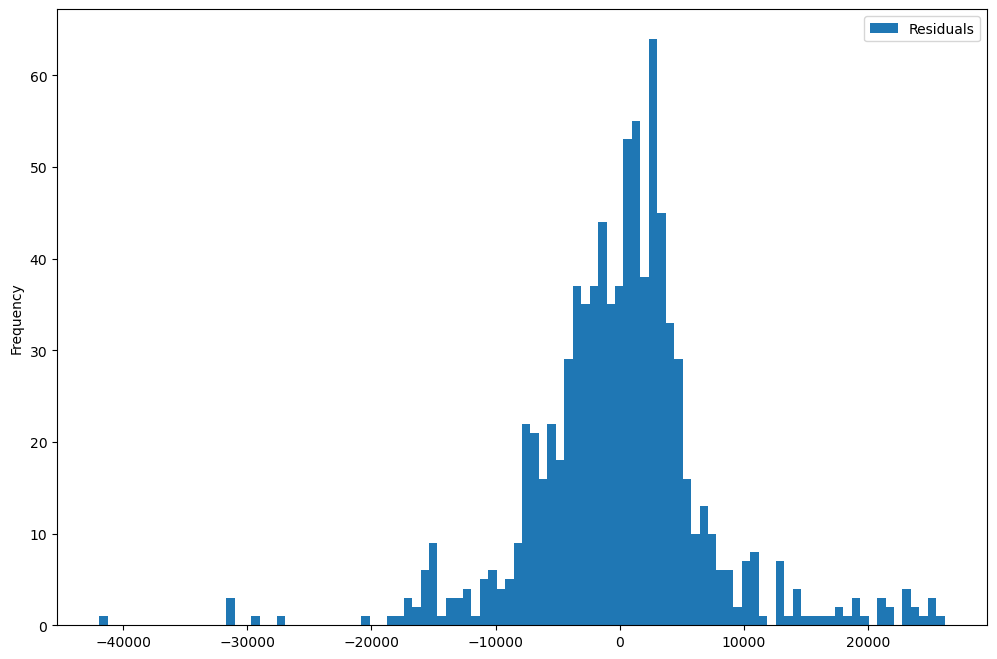

In [13]:
r_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

The shape of the residuals in my regression is distinct from the residuals plotted in the first regressions of the lesson because those were skewed to the left and mine is skewed to the right. This is likely due to the fact that we only used a subset of countries, rather than the full set. The OECD countries do not express the exact same thing that all of the countries would. 

# 3. Plot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Then plot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Do we observe bias in the residuals when controlling for each variable? Why does this matter?

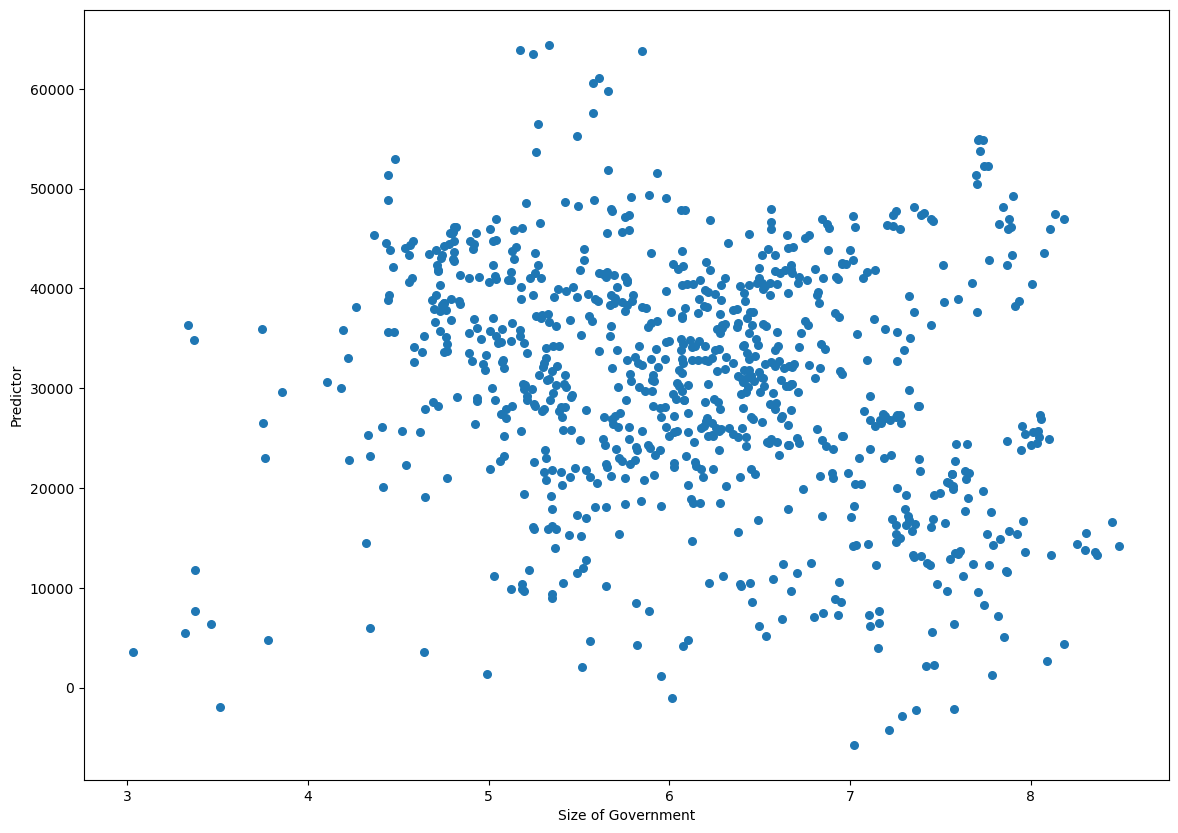

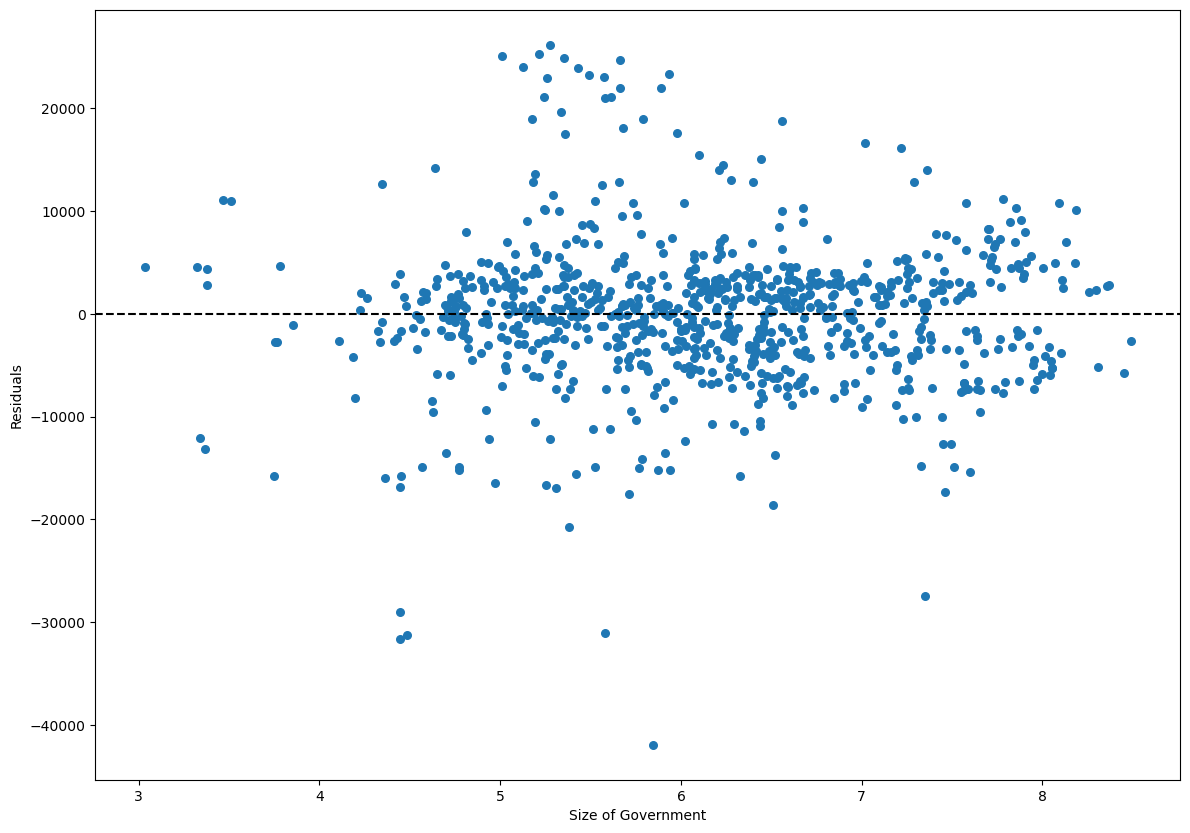

In [14]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Size of Government",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = 'Size of Government',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

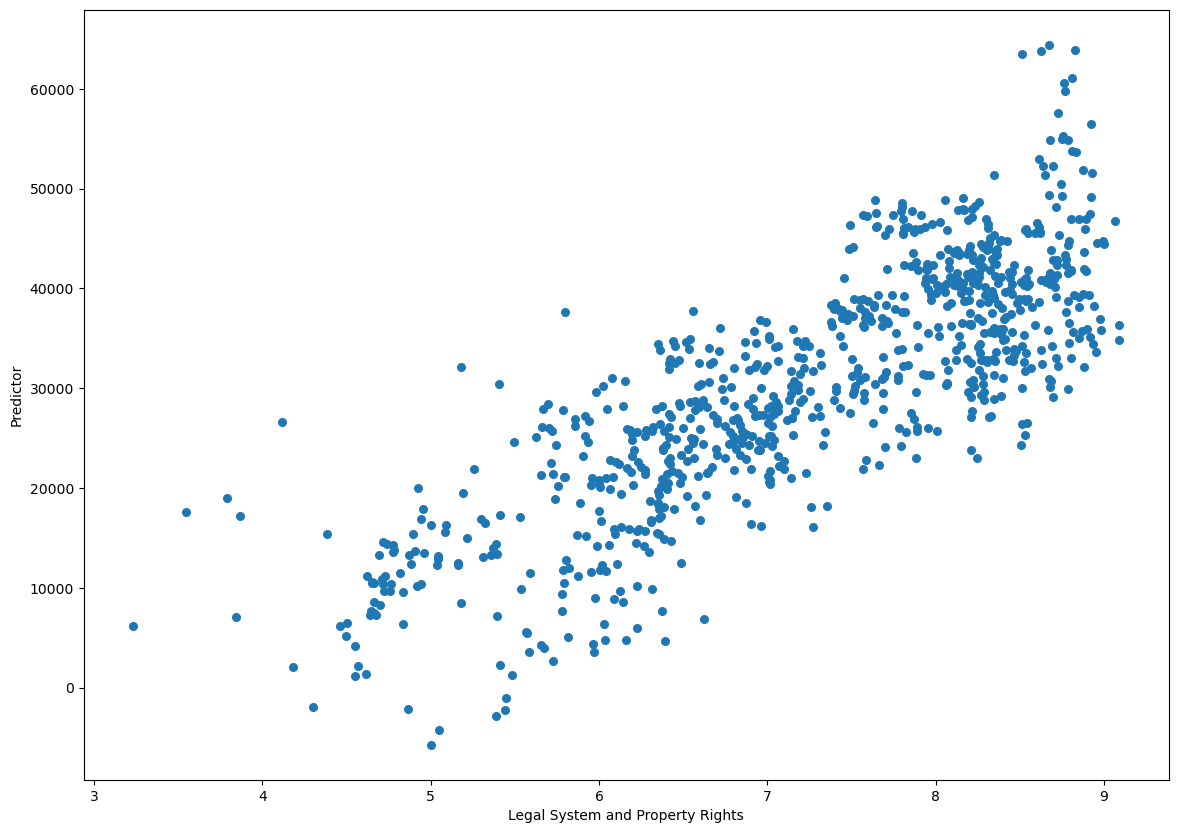

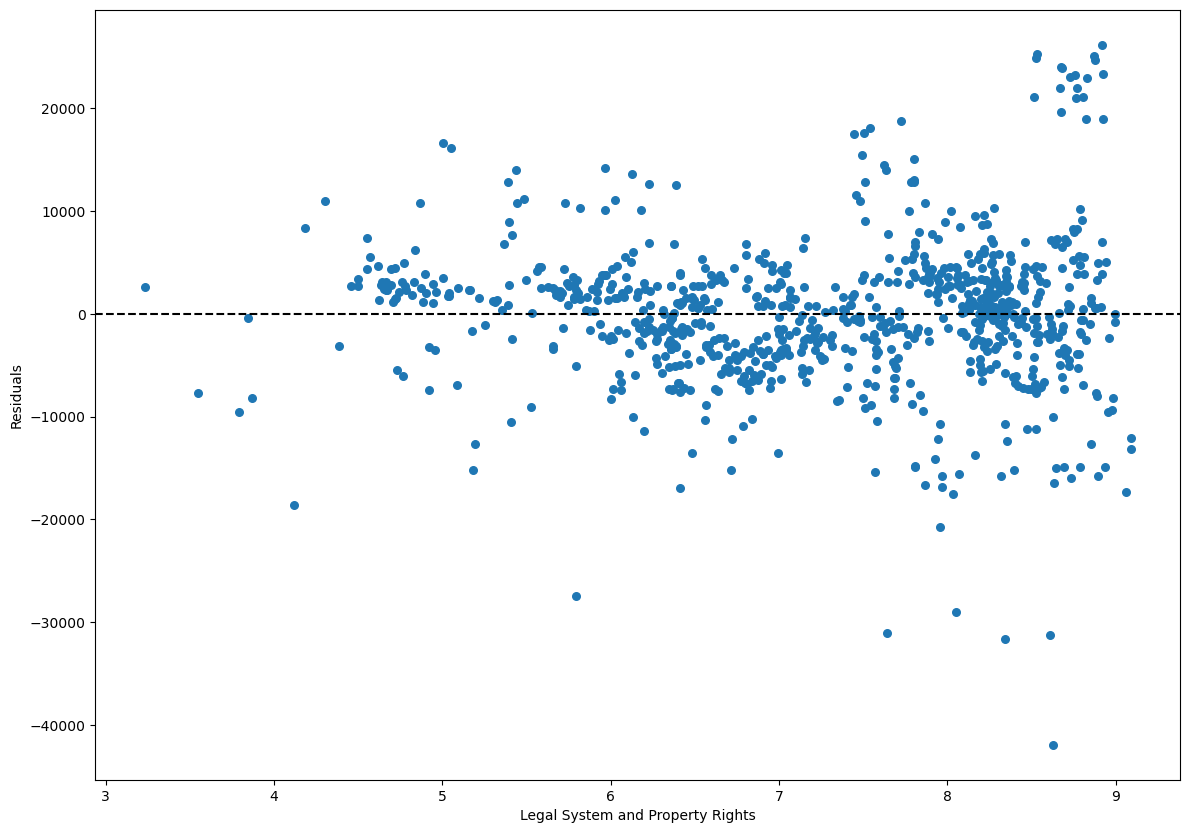

In [15]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Legal System and Property Rights",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = 'Legal System and Property Rights',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

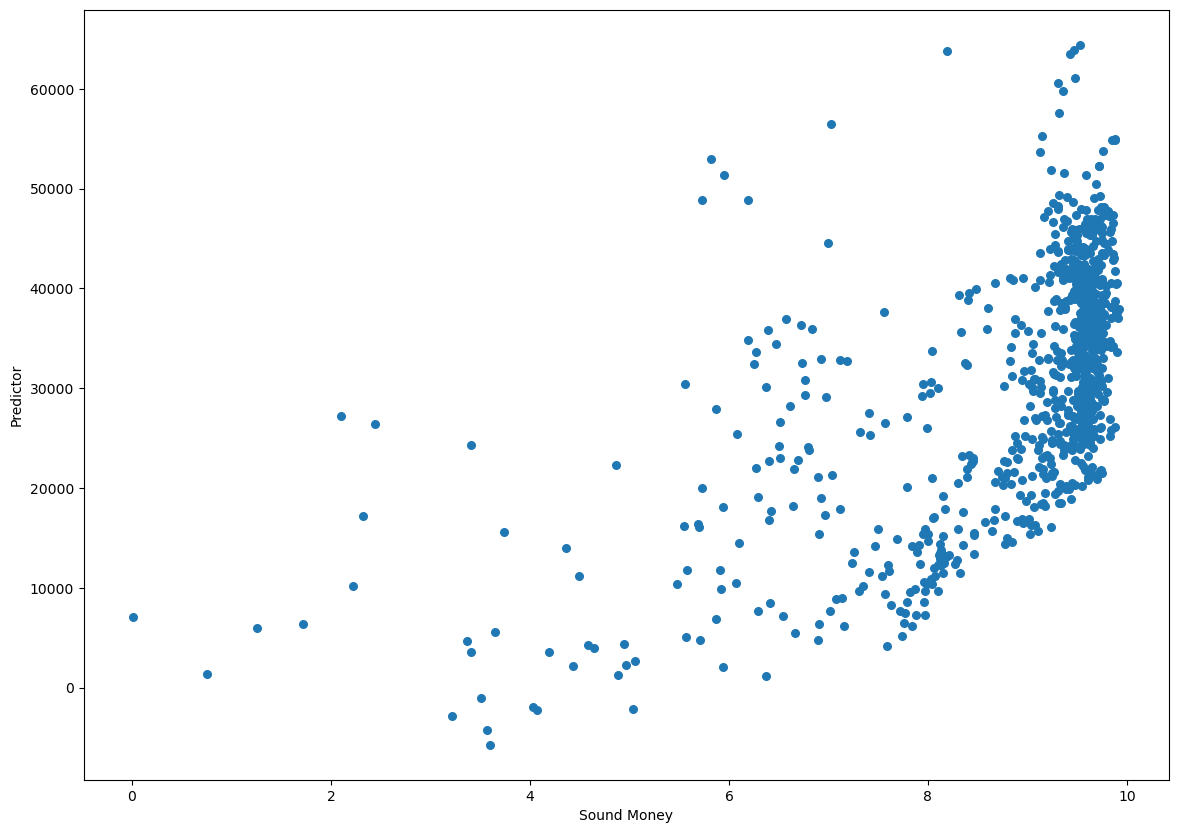

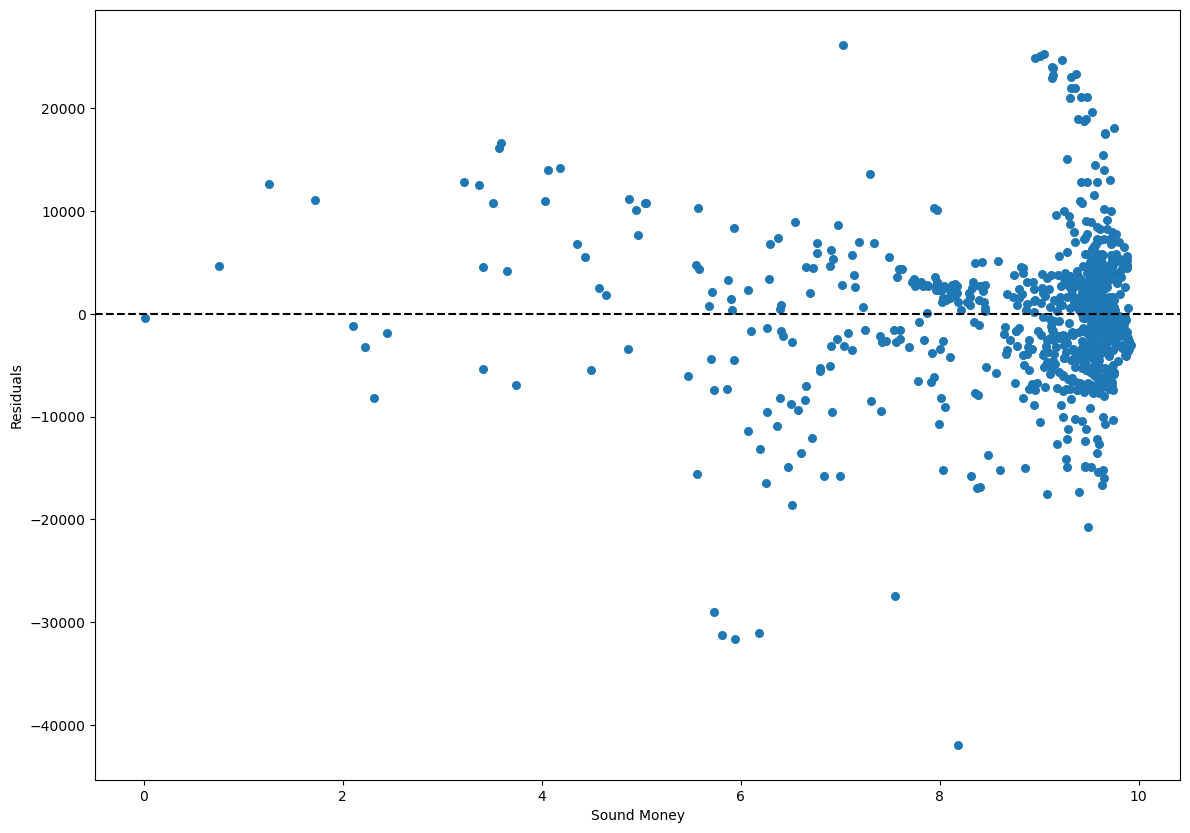

In [16]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Sound Money",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x =  'Sound Money',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()


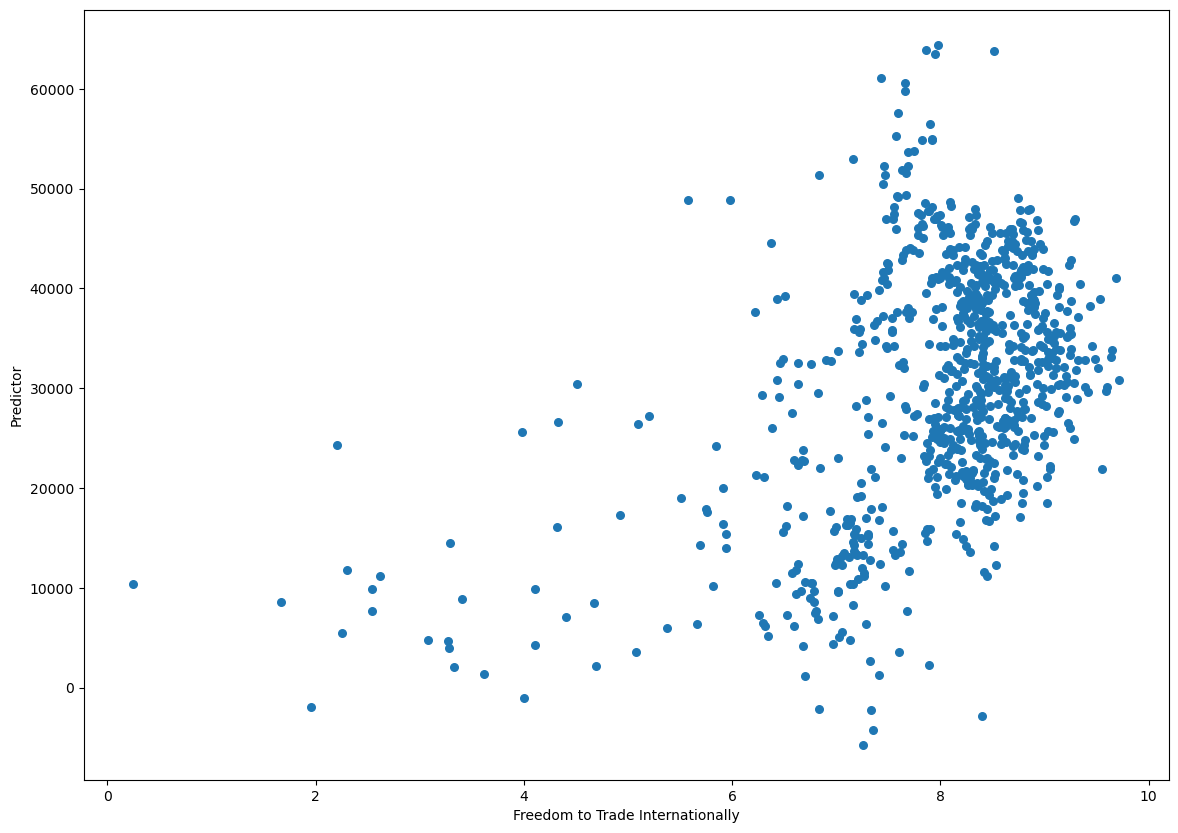

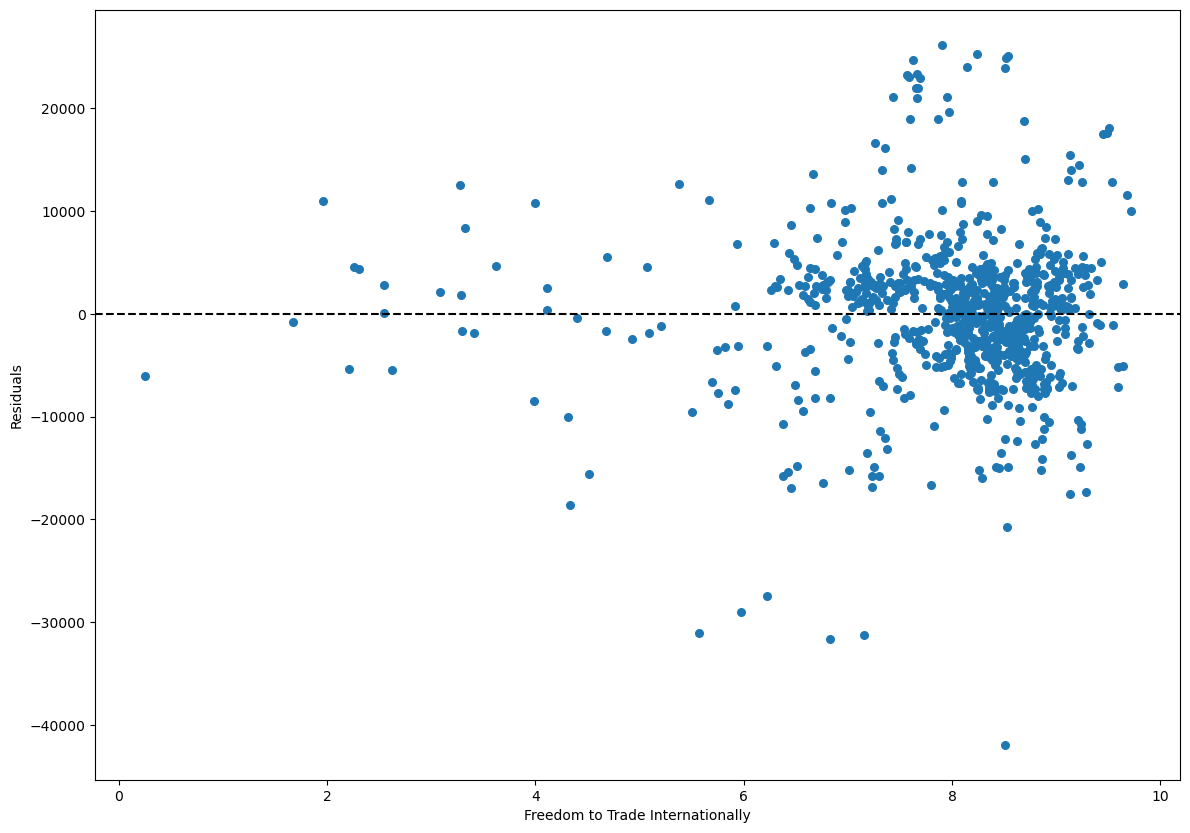

In [17]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Freedom to Trade Internationally",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = 'Freedom to Trade Internationally',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

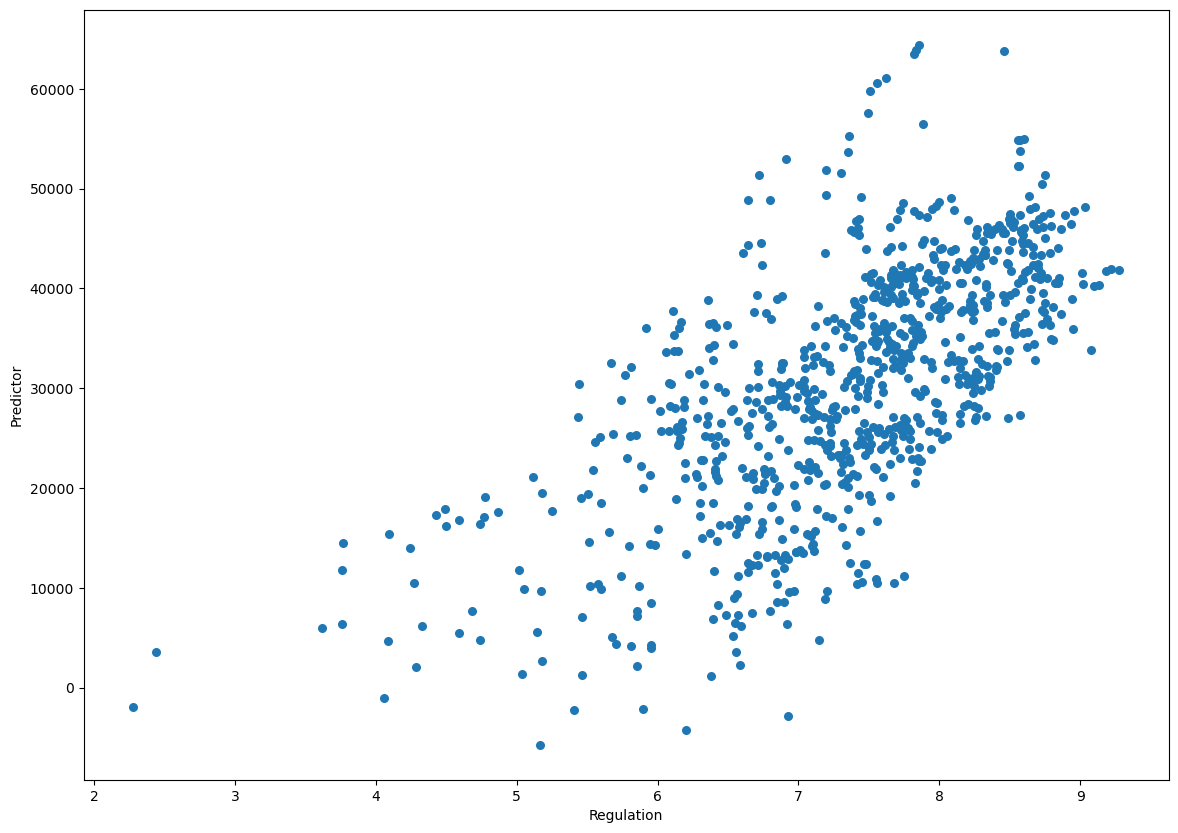

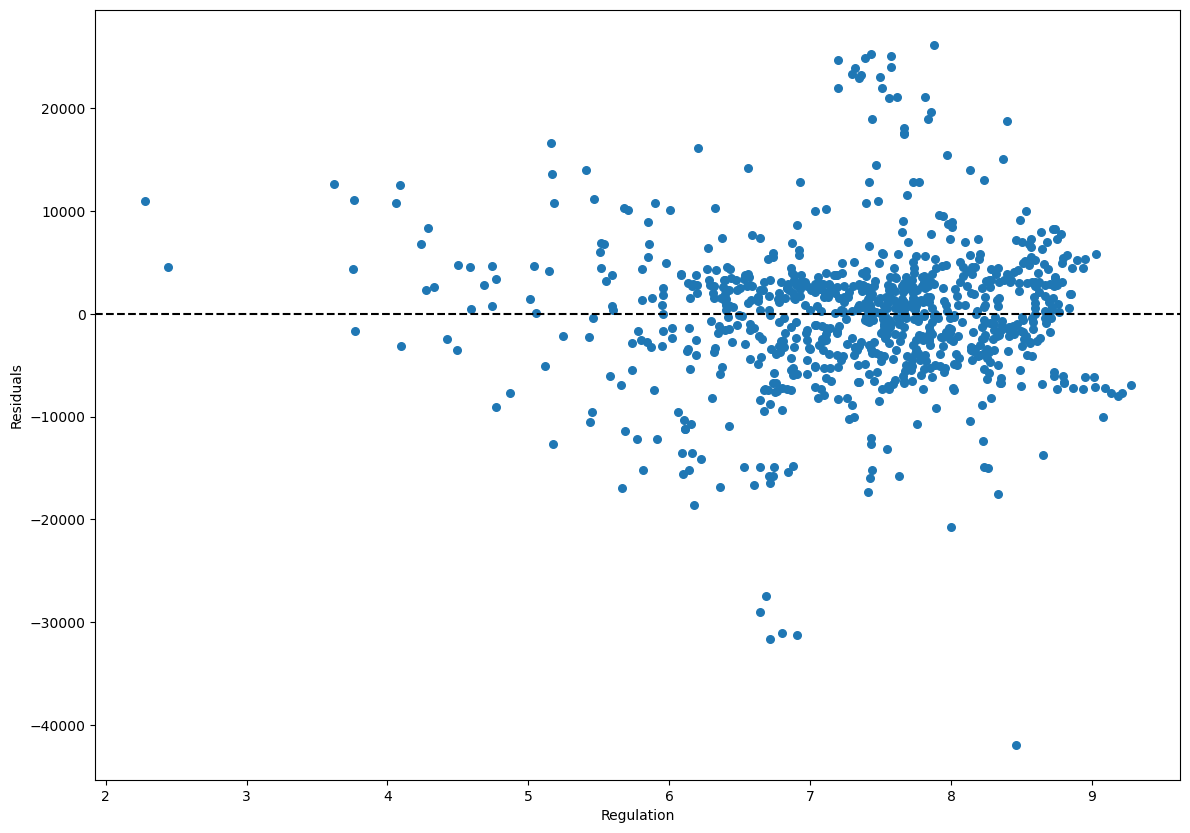

In [18]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Regulation",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()


fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = 'Regulation',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

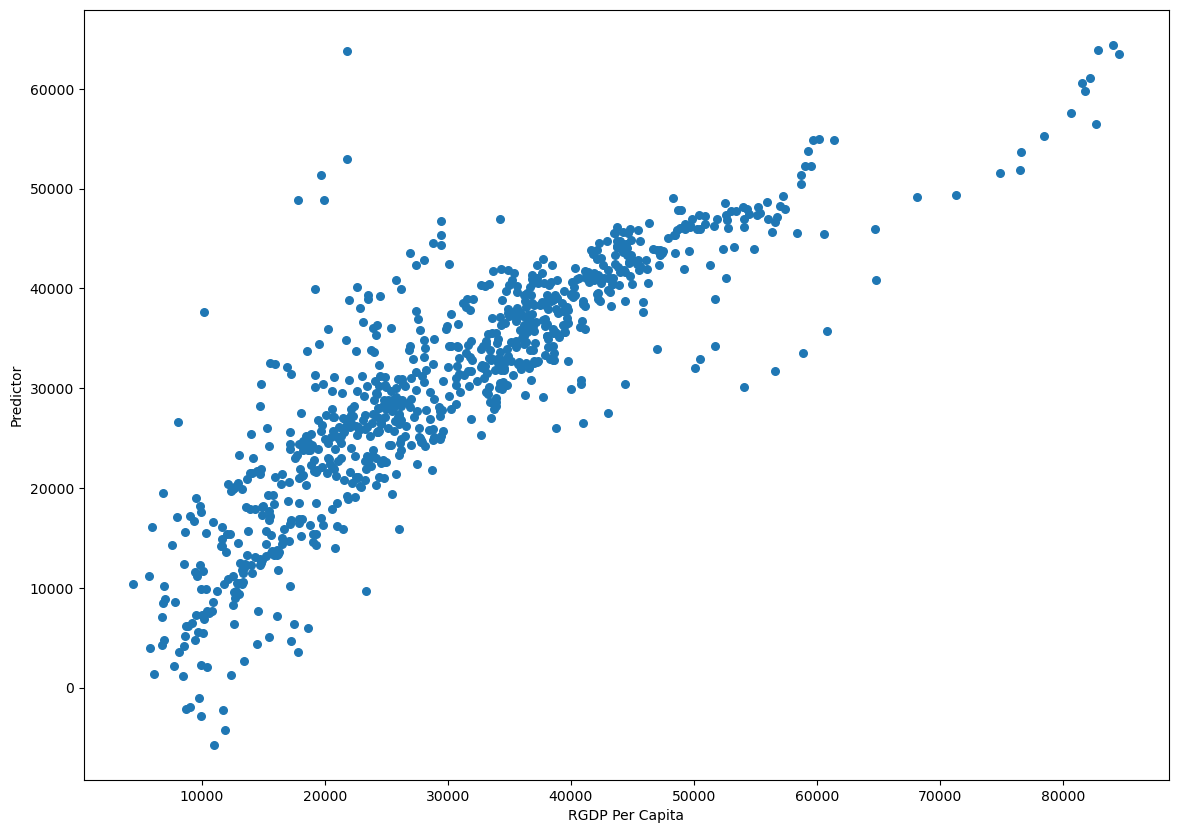

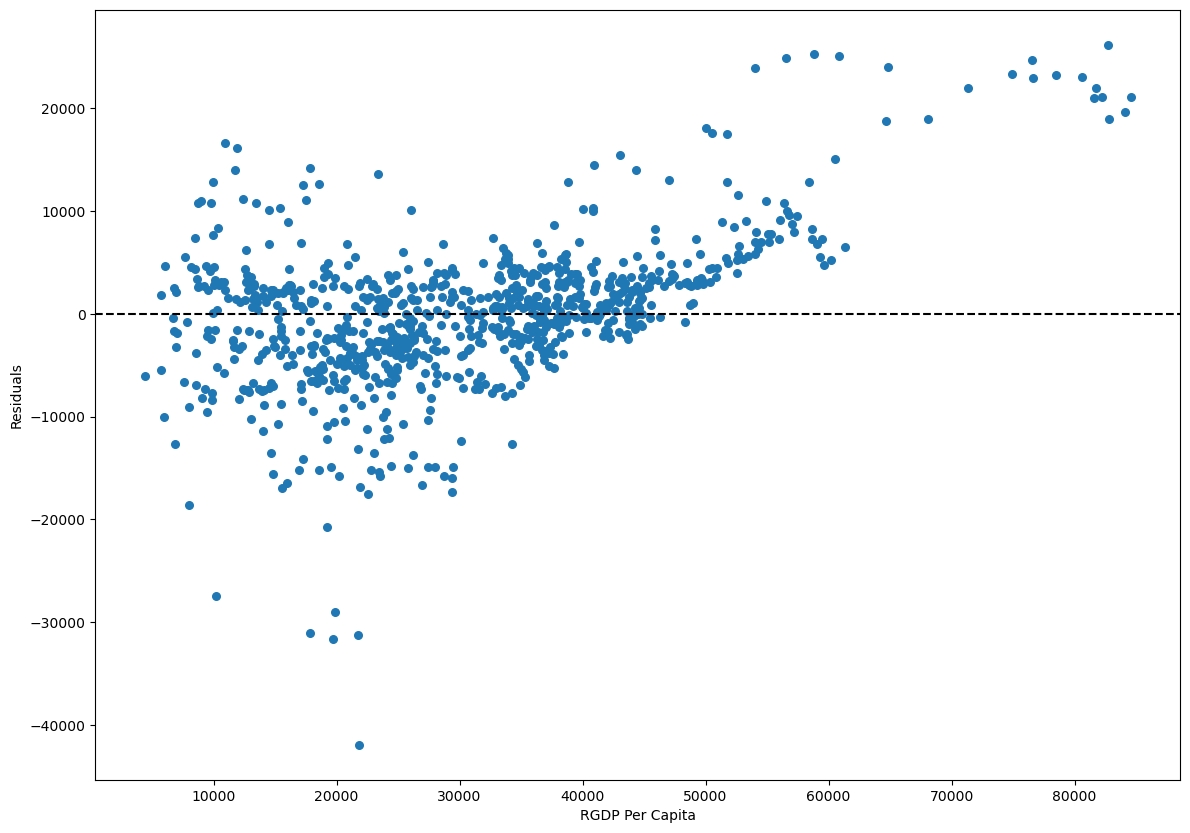

In [19]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "RGDP Per Capita",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = 'RGDP Per Capita',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

 #### Do we observe bias in the residuals when controlling for each variable? Why does this matter?

Yes, I believe that we do observe bias in the residuals when controlling for each variable. Since we are leaving out information, it can affect what we are seeing. This matters because it can cause us to view information incorrectly and come to the wrong conclusions. 

# 4. Plot the observed and predicted values of RGDP Per Capita for each individual country.

In [20]:
reg_vars1 = list(oecd_data.keys())
del reg_vars1[4:5]
del reg_vars1[0]
del reg_vars1[1]
del reg_vars1[1]
del reg_vars1[2]

reg_vars1

['Year',
 'Countries',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [21]:
y_var1 = [reg_vars1[-1]]
x_vars1 = reg_vars1[:-1]
reg_data1 = oecd_data[reg_vars1]
reg_data1.corr().round(2)
x_vars1

['Year',
 'Countries',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation']

In [22]:
reg_data2 = reg_data1.set_index(["Countries", "Year"])
reg_data2

Size of Government  \
Countries     Year                             
Australia     1970-01-01            6.863768   
              1975-01-01            6.255684   
              1980-01-01            6.339449   
              1985-01-01            6.259326   
              1990-01-01            6.708215   
...                                      ...   
United States 2014-01-01            7.239681   
              2015-01-01            7.237673   
              2016-01-01            7.252009   
              2017-01-01            7.354358   
              2018-01-01            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia     1970-01-01                          7.775615     9.581113   
              1975-01-01                          8.034445     8.346907   
              1980-01-01                          8.037057     9.085686   
              1985-01-01                          8.540345     9.089736   
              1990-01-01                          8.398730     9.018318   
...                                                    ...          ...   
United States 2014-01-01                          7.652463     9.737154   
              2015-01-01                          7.745733     9.855788   
              2016-01-01                          7.793107     9.814703   
              2017-01-01                          7.802657     9.772320   
              2018-01-01                          7.646530     9.772494   

                          Freedom to Trade Internationally  Regulation  \
Countries     Year                                                       
Australia     1970-01-01                          5.882101    6.335298   
              1975-01-01                          5.692162    6.761980   
              1980-01-01                          5.841104    7.389934   
              1985-01-01                          6.985368    7.469774   
              1990-01-01                          7.661409    7.750886   
...                                                    ...         ...   
United States 2014-01-01                          7.836022    8.792114   
              2015-01-01                          7.810632    8.891698   
              2016-01-01                          7.889129    8.952382   
              2017-01-01                          7.921225    9.031901   
              2018-01-01                          7.783384    8.784245   

                          RGDP Per Capita  
Countries     Year                         
Australia     1970-01-01       19166.0000  
              1975-01-01       20993.0000  
              1980-01-01       22972.0000  
              1985-01-01       24927.0000  
              1990-01-01       27373.0000  
...                                   ...  
United States 2014-01-01       51664.0000  
              2015-01-01       52591.0000  
              2016-01-01       53015.0000  
              2017-01-01       54007.7698  
              2018-01-01       55334.7394  

[900 rows x 6 columns]

In [23]:
r_df = reg_data1.dropna(axis = 0, how = "any")
y = r_df["RGDP Per Capita"]
X = r_df[x_vars[0:5]]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/2866303246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/2866303246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Predictor"] = results.predict()


In [24]:
r_df1 = r_df.set_index(["Countries", "Year"])
r_df1

Size of Government  \
Countries     Year                             
Australia     1970-01-01            6.863768   
              1975-01-01            6.255684   
              1980-01-01            6.339449   
              1985-01-01            6.259326   
              1990-01-01            6.708215   
...                                      ...   
United States 2014-01-01            7.239681   
              2015-01-01            7.237673   
              2016-01-01            7.252009   
              2017-01-01            7.354358   
              2018-01-01            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia     1970-01-01                          7.775615     9.581113   
              1975-01-01                          8.034445     8.346907   
              1980-01-01                          8.037057     9.085686   
              1985-01-01                          8.540345     9.089736   
              1990-01-01                          8.398730     9.018318   
...                                                    ...          ...   
United States 2014-01-01                          7.652463     9.737154   
              2015-01-01                          7.745733     9.855788   
              2016-01-01                          7.793107     9.814703   
              2017-01-01                          7.802657     9.772320   
              2018-01-01                          7.646530     9.772494   

                          Freedom to Trade Internationally  Regulation  \
Countries     Year                                                       
Australia     1970-01-01                          5.882101    6.335298   
              1975-01-01                          5.692162    6.761980   
              1980-01-01                          5.841104    7.389934   
              1985-01-01                          6.985368    7.469774   
              1990-01-01                          7.661409    7.750886   
...                                                    ...         ...   
United States 2014-01-01                          7.836022    8.792114   
              2015-01-01                          7.810632    8.891698   
              2016-01-01                          7.889129    8.952382   
              2017-01-01                          7.921225    9.031901   
              2018-01-01                          7.783384    8.784245   

                          RGDP Per Capita     Predictor  
Countries     Year                                       
Australia     1970-01-01       19166.0000  33944.825400  
              1975-01-01       20993.0000  34376.323308  
              1980-01-01       22972.0000  37311.653449  
              1985-01-01       24927.0000  39734.632681  
              1990-01-01       27373.0000  38452.056695  
...                                   ...           ...  
United States 2014-01-01       51664.0000  37335.064068  
              2015-01-01       52591.0000  38421.861297  
              2016-01-01       53015.0000  38683.999293  
              2017-01-01       54007.7698  38720.254260  
              2018-01-01       55334.7394  37263.031399  

[869 rows x 7 columns]

In [25]:
countries = r_df1.groupby("Countries").mean().index
plot_data1 = r_df1[y_var1 + ["Predictor"]]
for key in plot_data1:
    plot_data1[key] = plot_data1[key] + 1

plot_data1

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/3142539715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data1[key] = plot_data1[key] + 1


RGDP Per Capita     Predictor
Countries     Year                                     
Australia     1970-01-01       19167.0000  33945.825400
              1975-01-01       20994.0000  34377.323308
              1980-01-01       22973.0000  37312.653449
              1985-01-01       24928.0000  39735.632681
              1990-01-01       27374.0000  38453.056695
...                                   ...           ...
United States 2014-01-01       51665.0000  37336.064068
              2015-01-01       52592.0000  38422.861297
              2016-01-01       53016.0000  38684.999293
              2017-01-01       54008.7698  38721.254260
              2018-01-01       55335.7394  37264.031399

[869 rows x 2 columns]

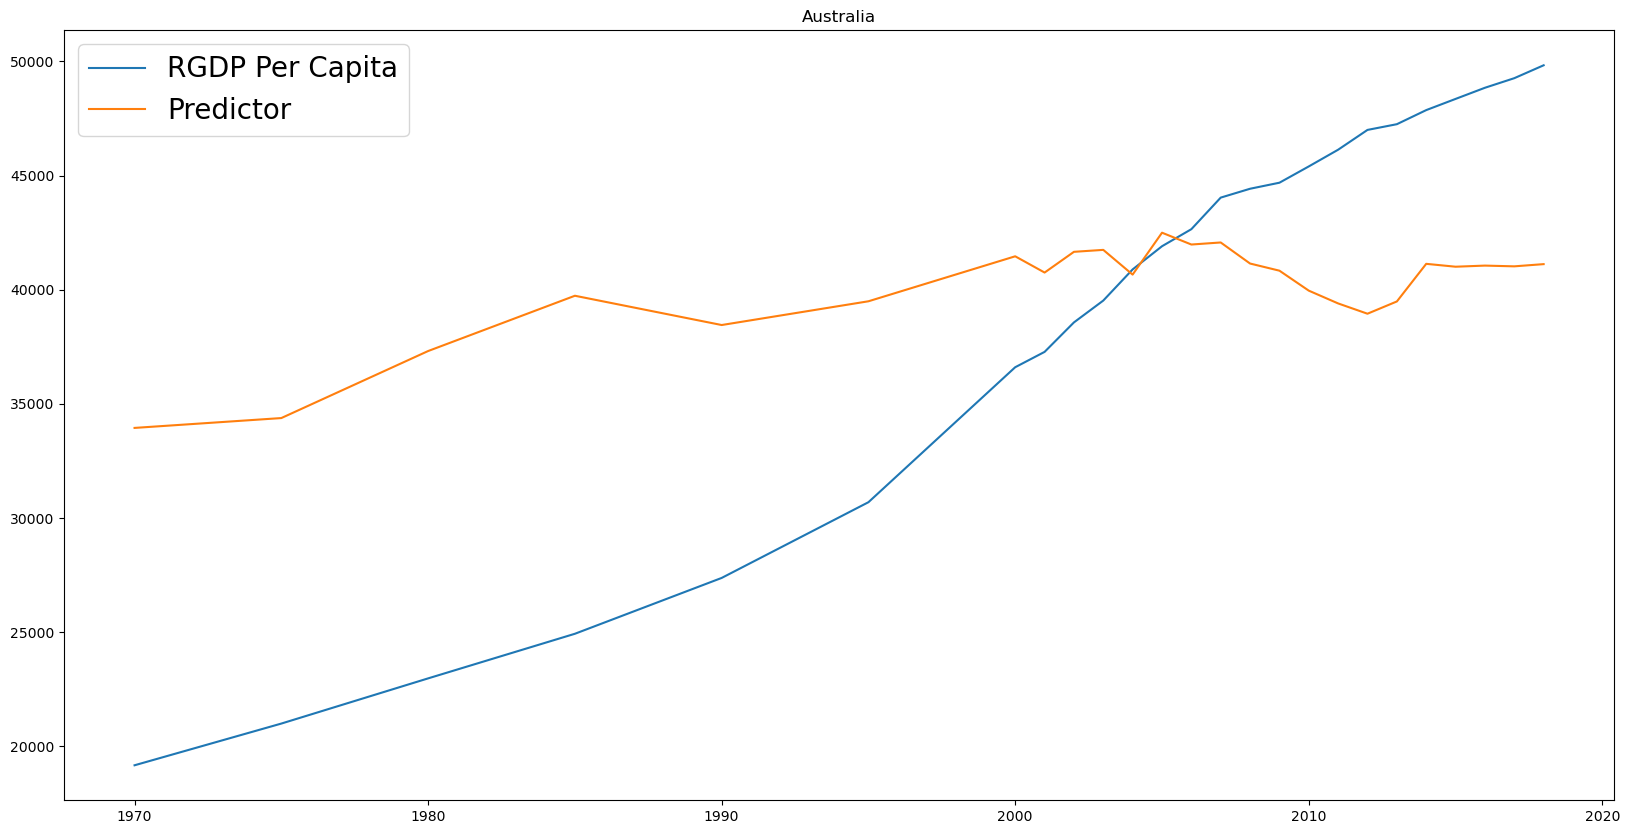

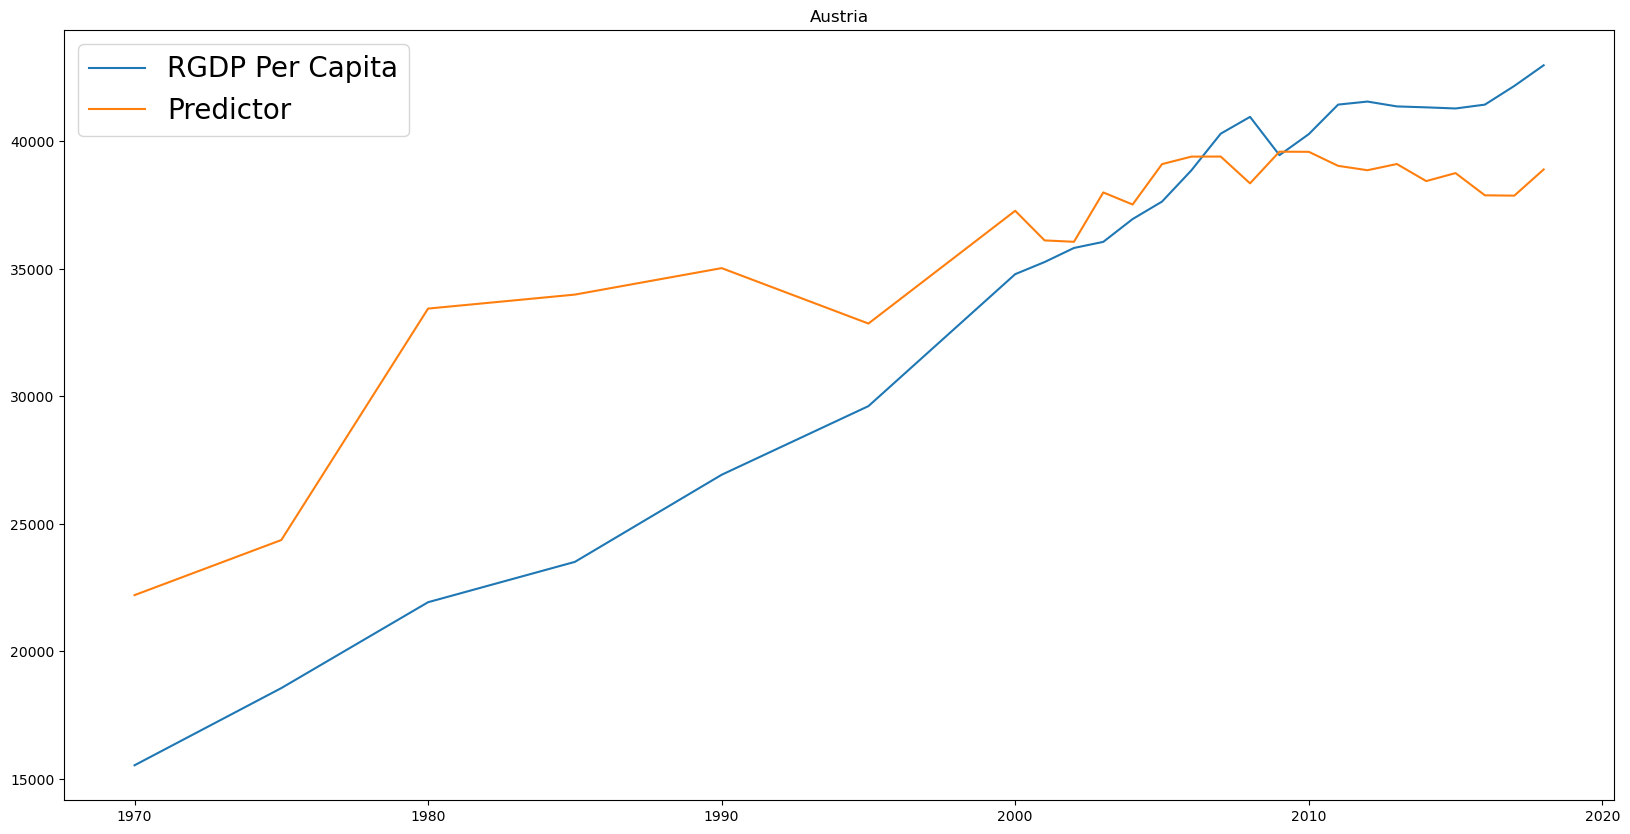

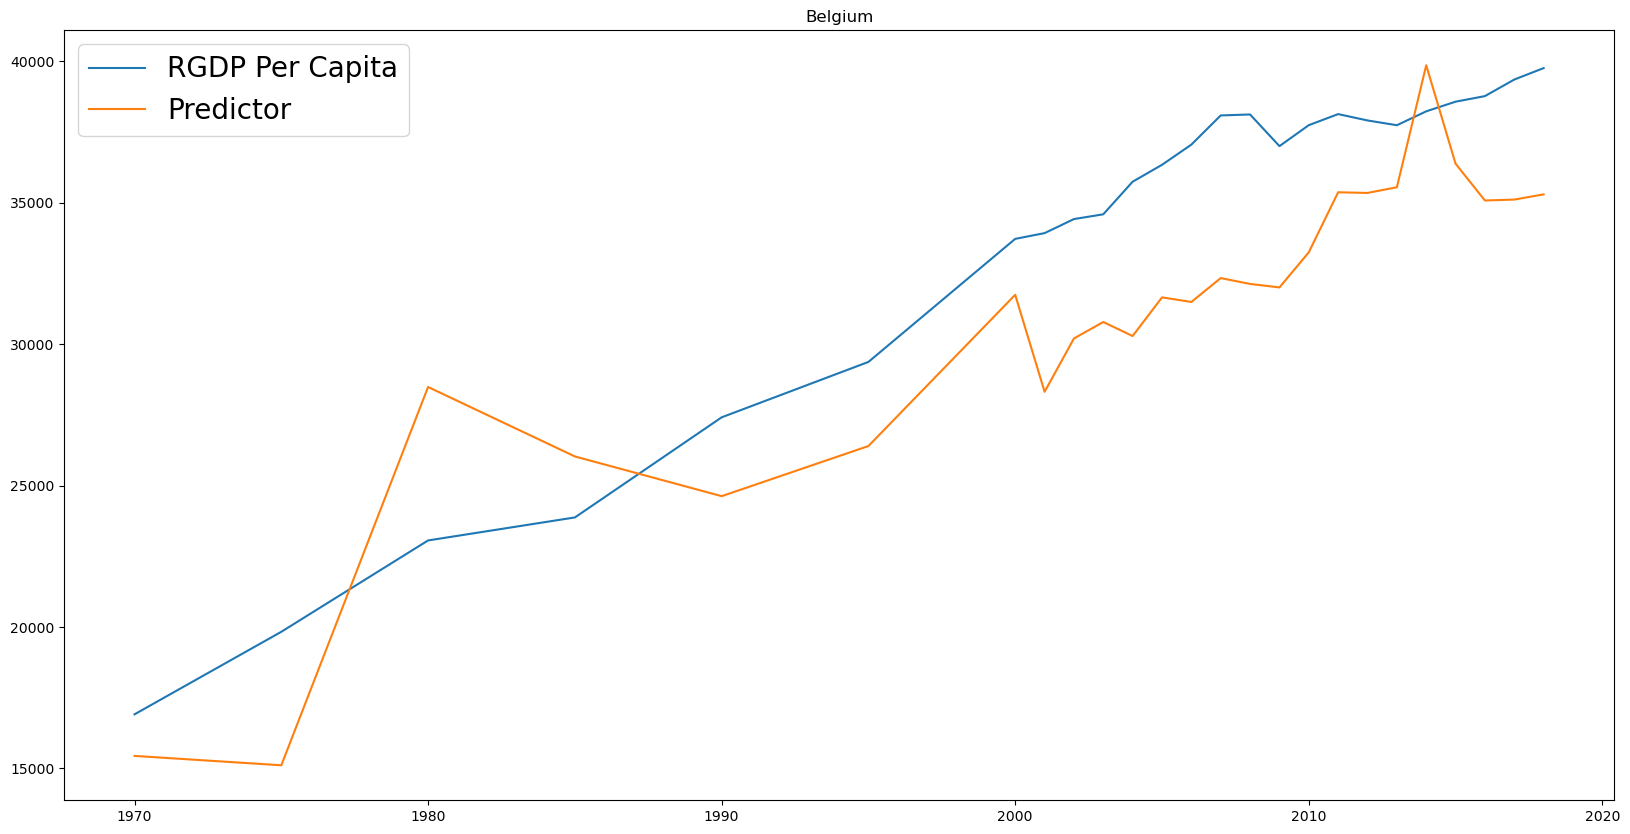

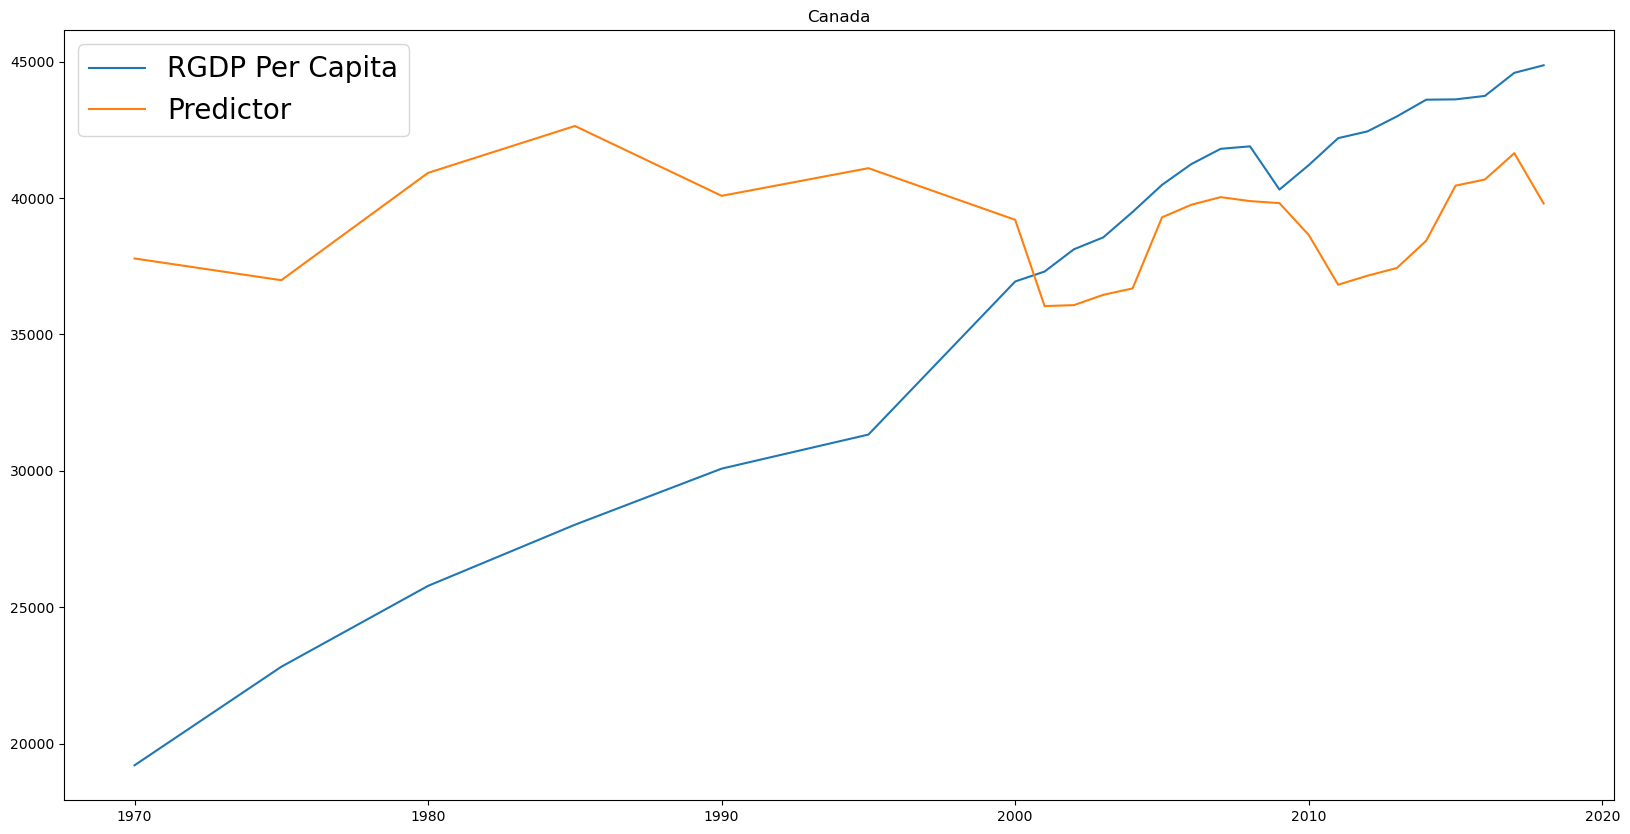

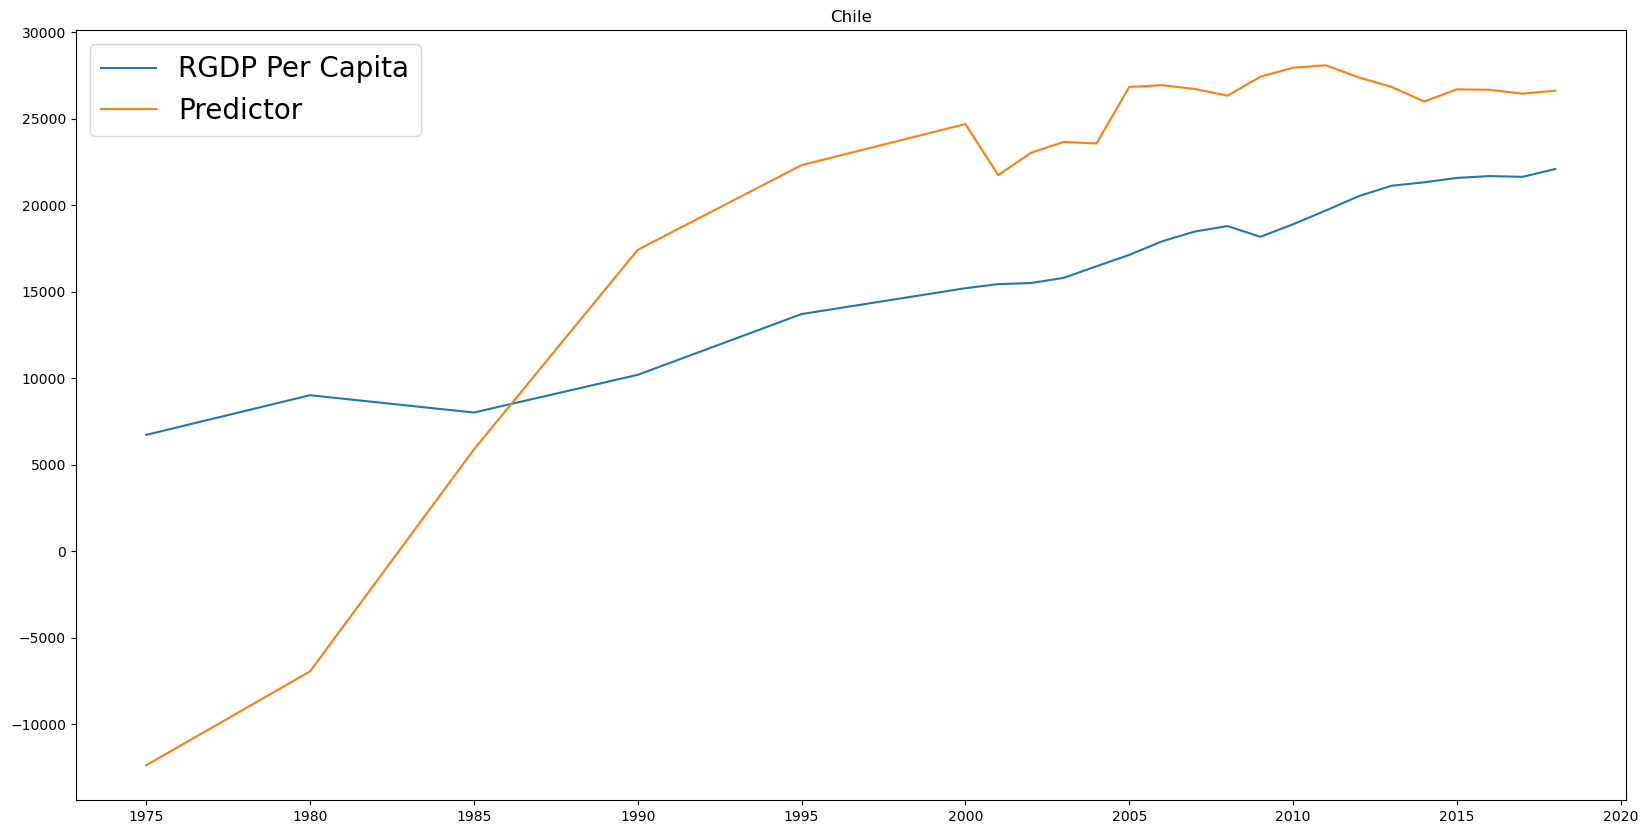

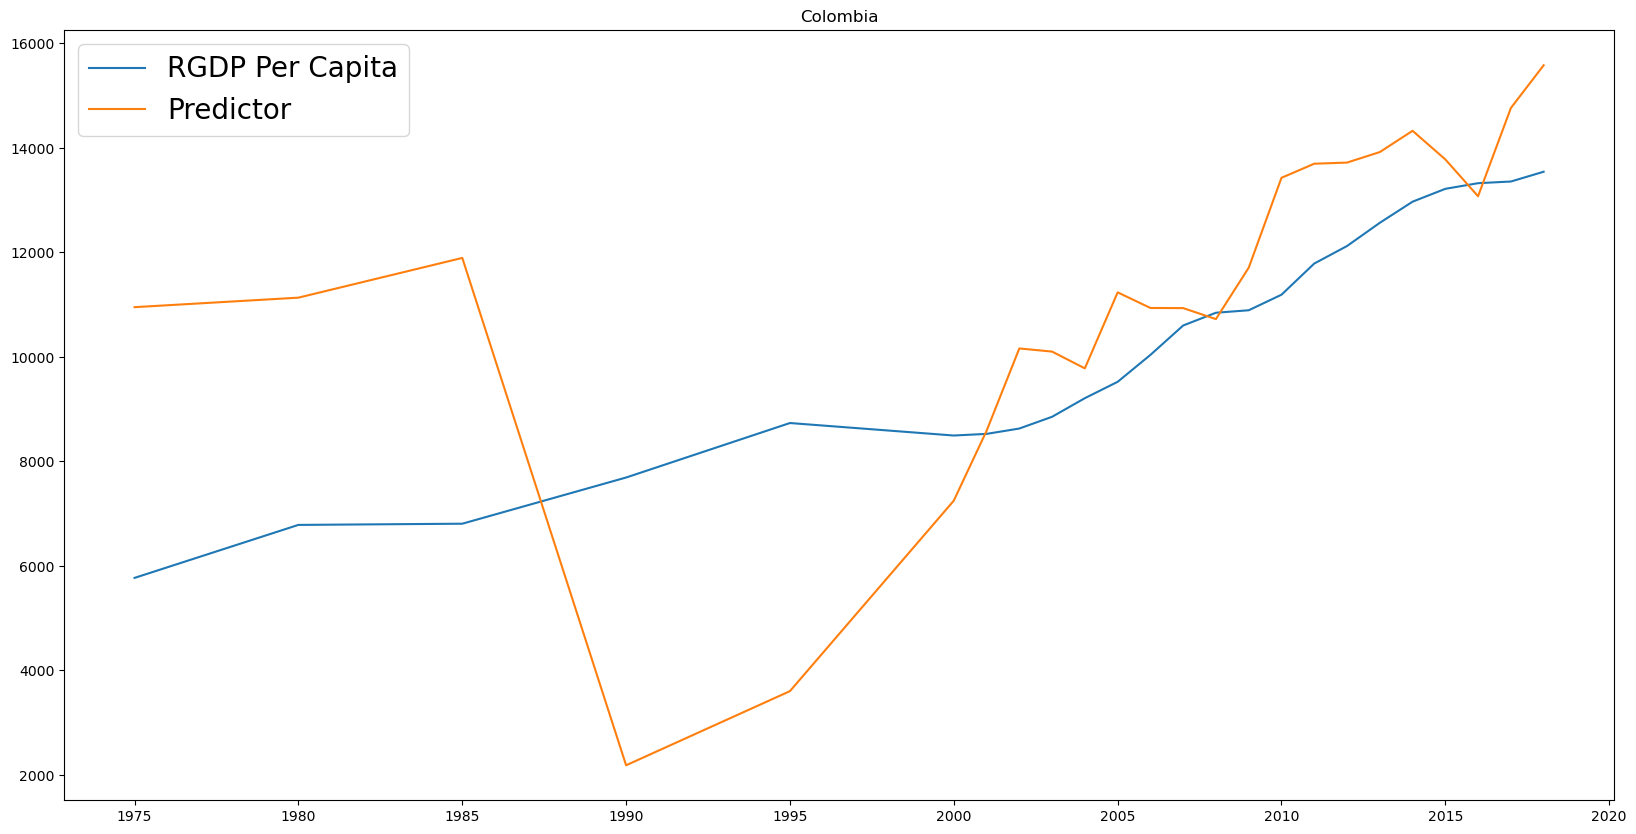

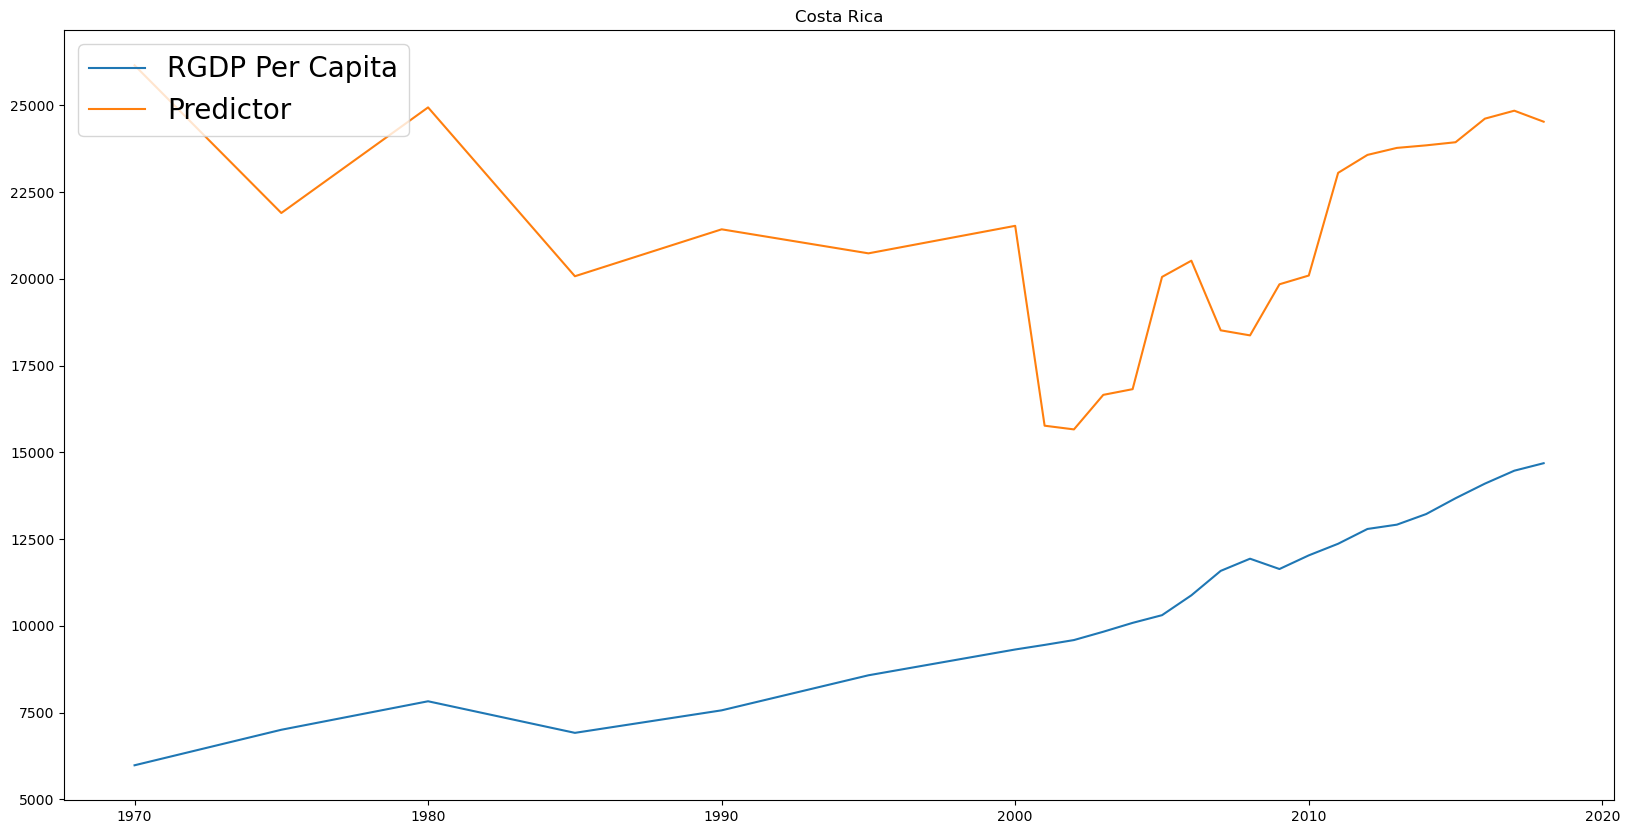

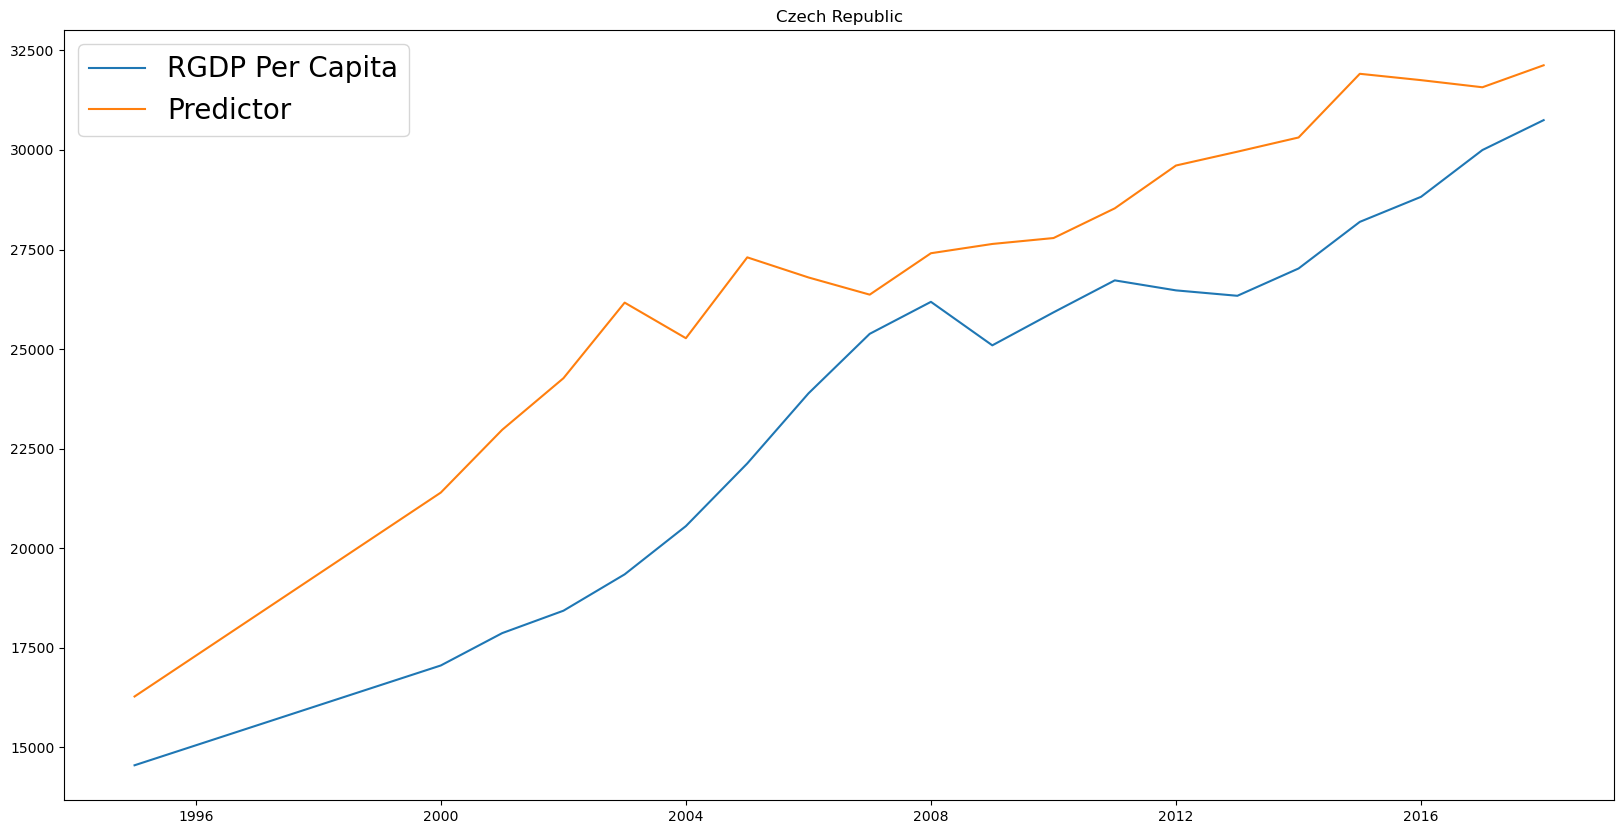

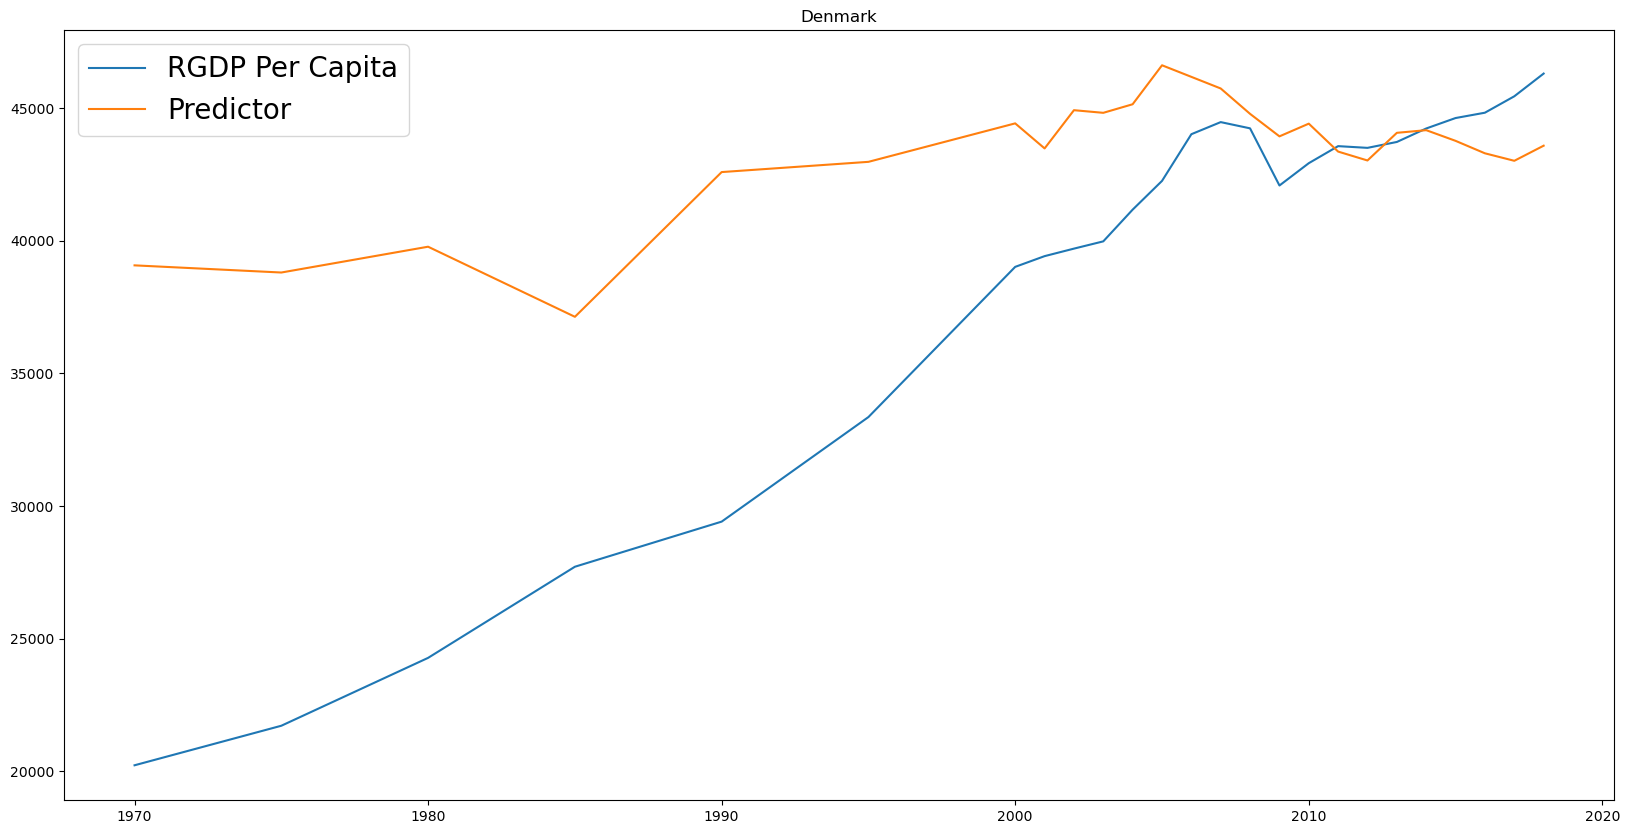

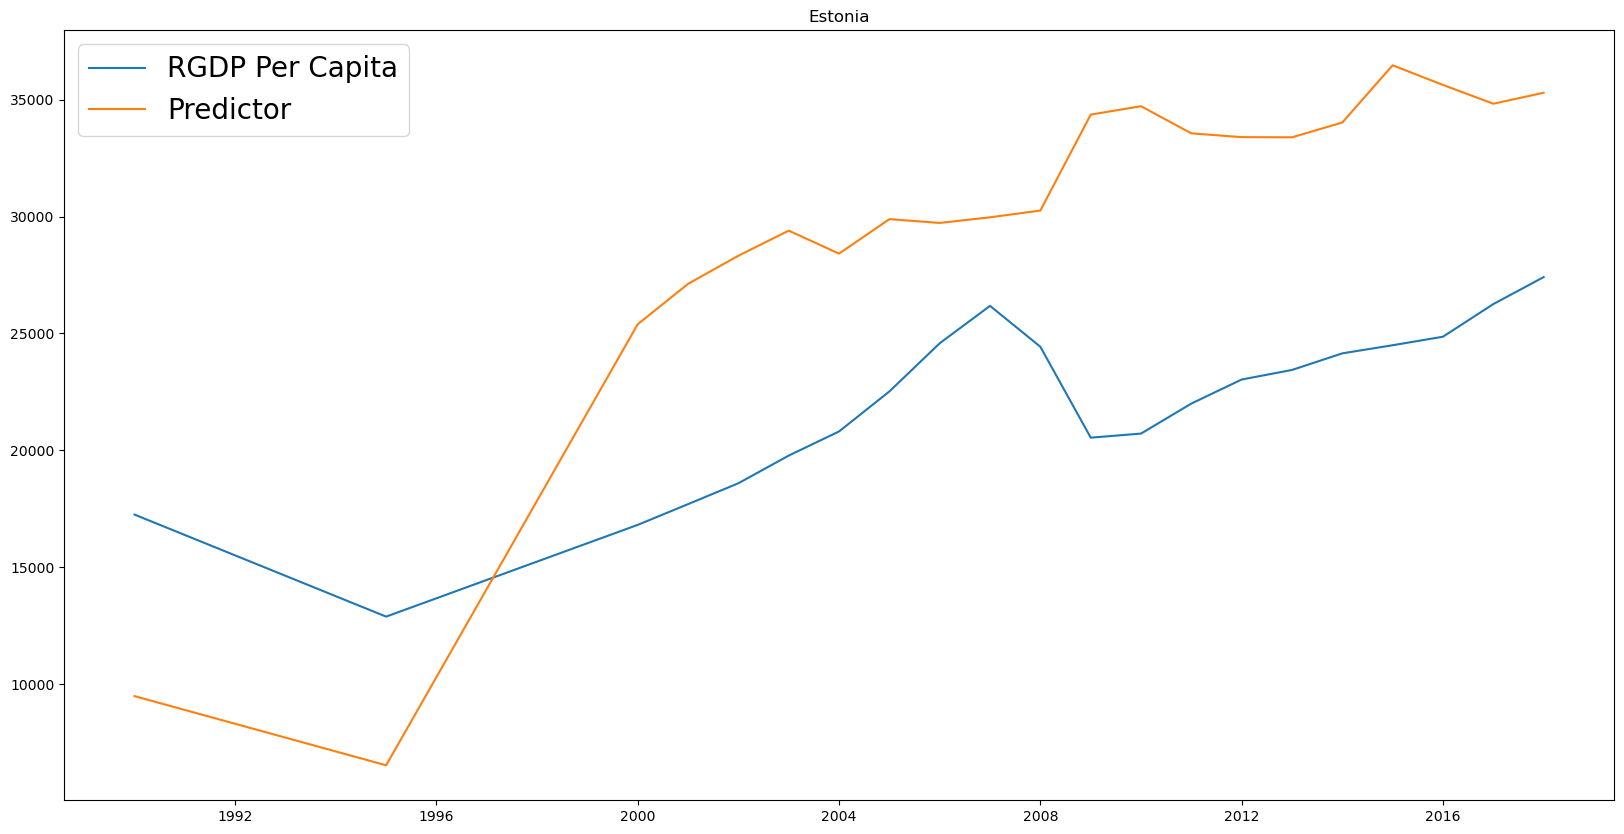

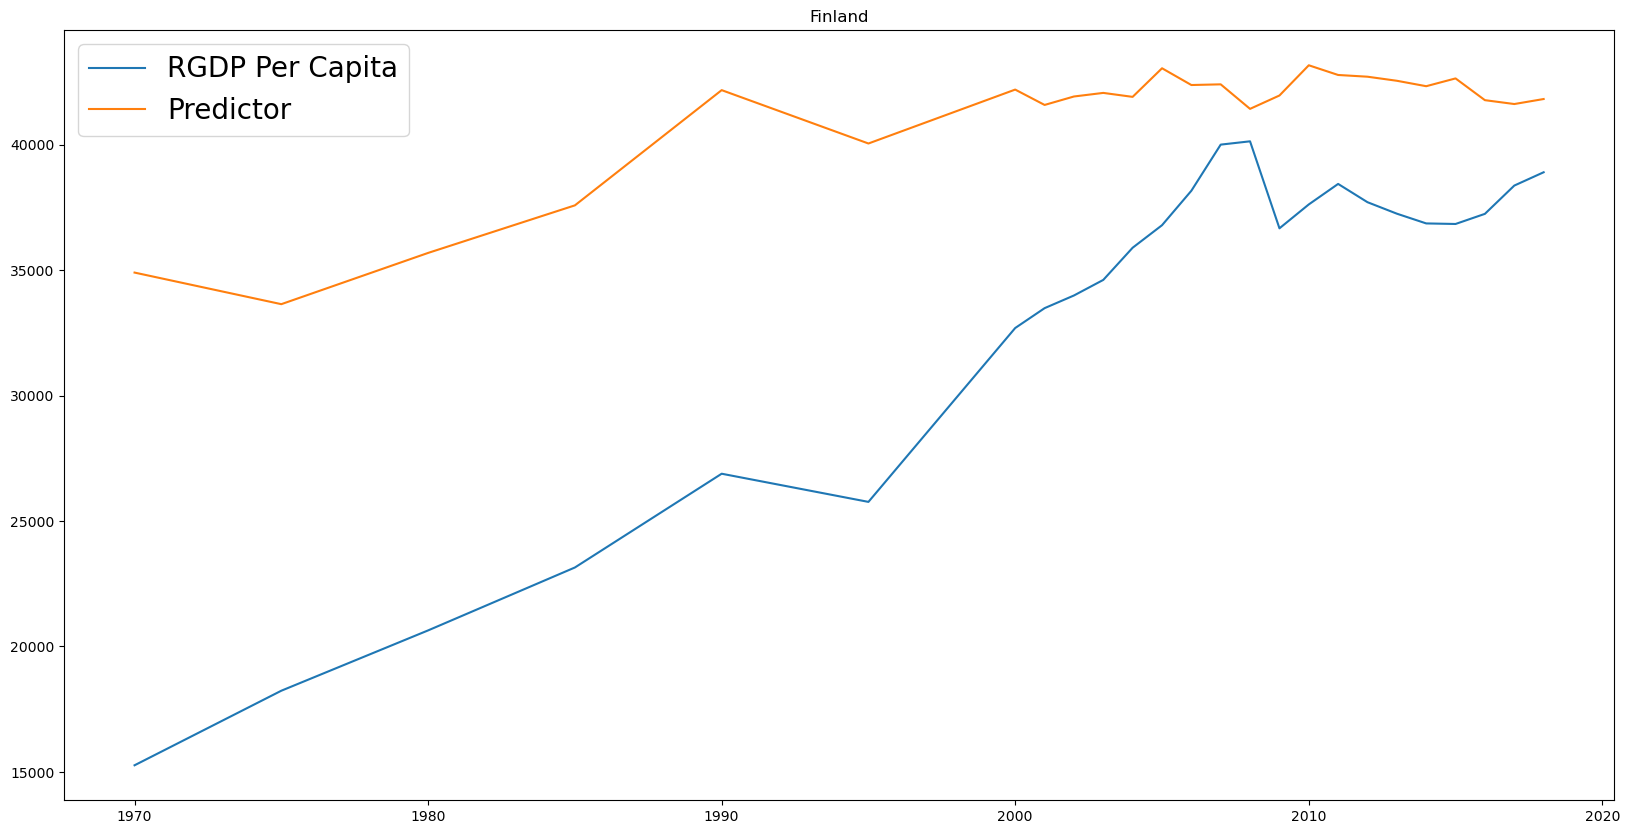

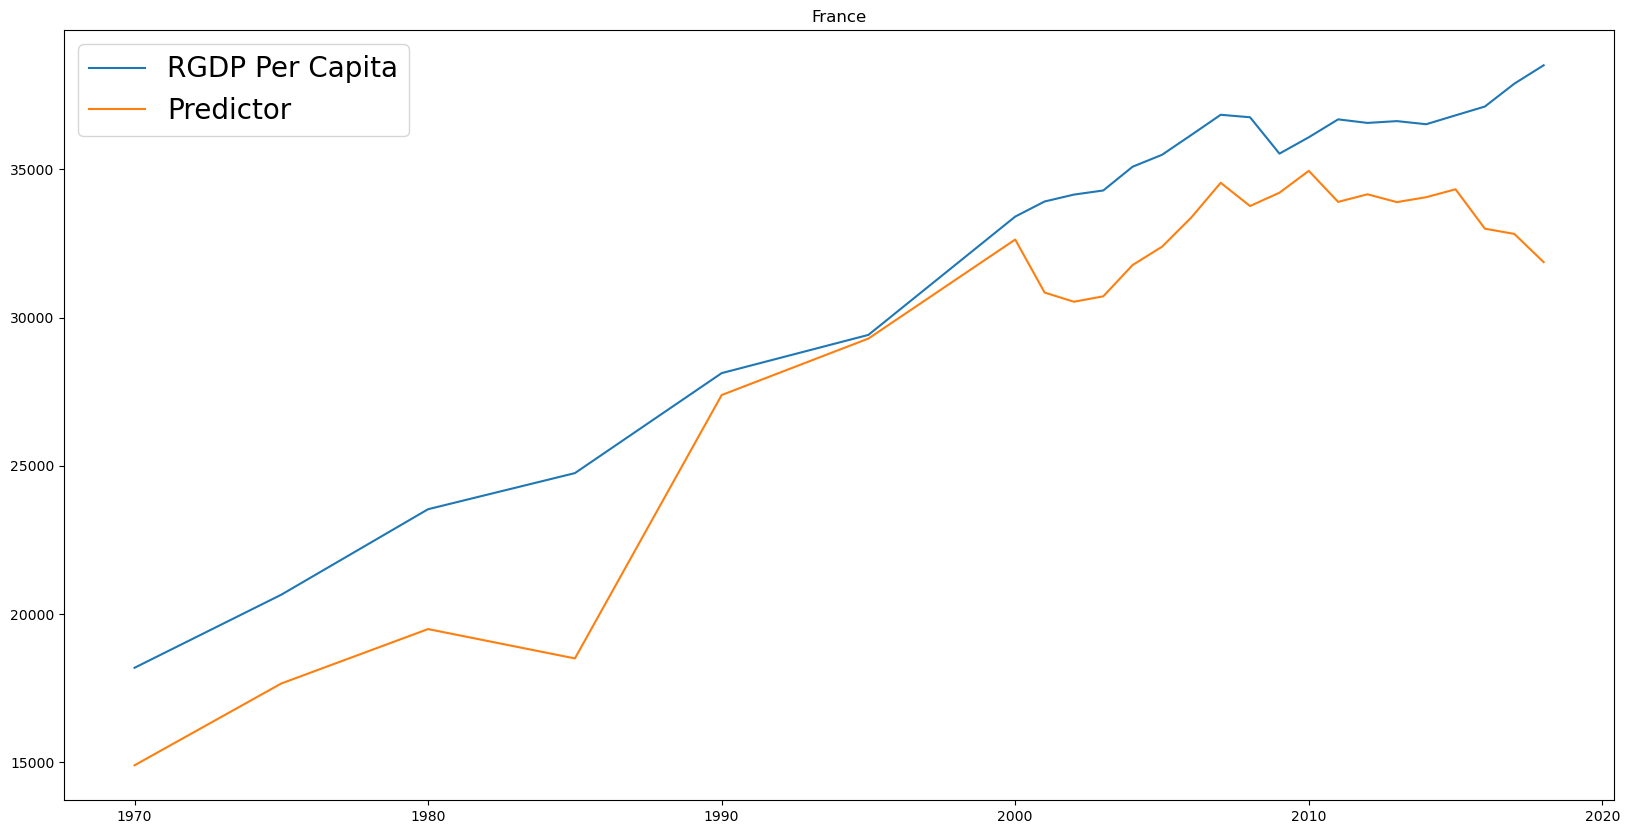

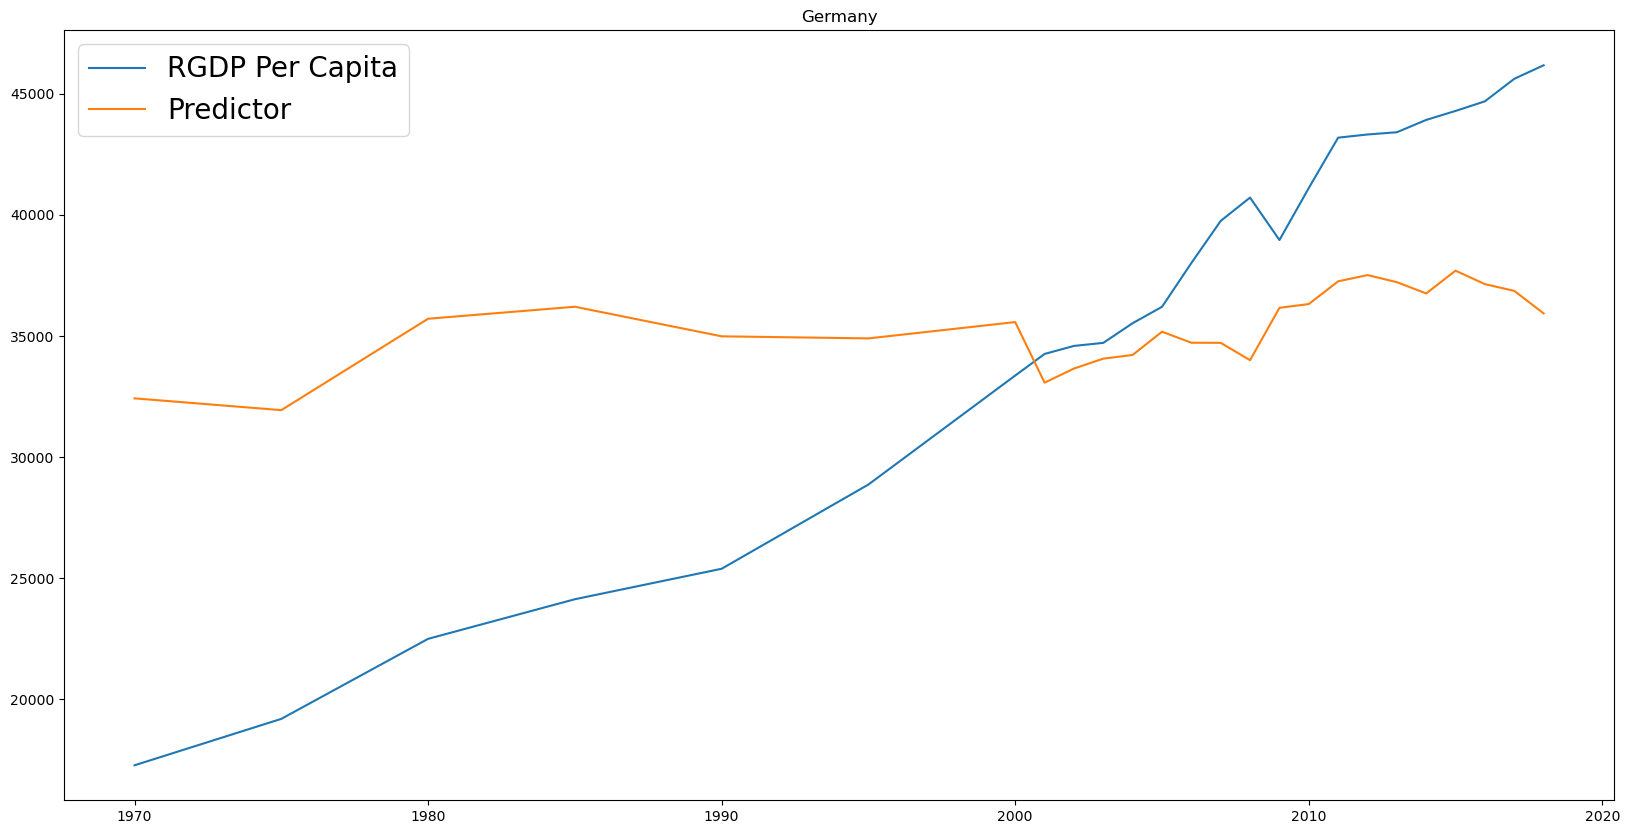

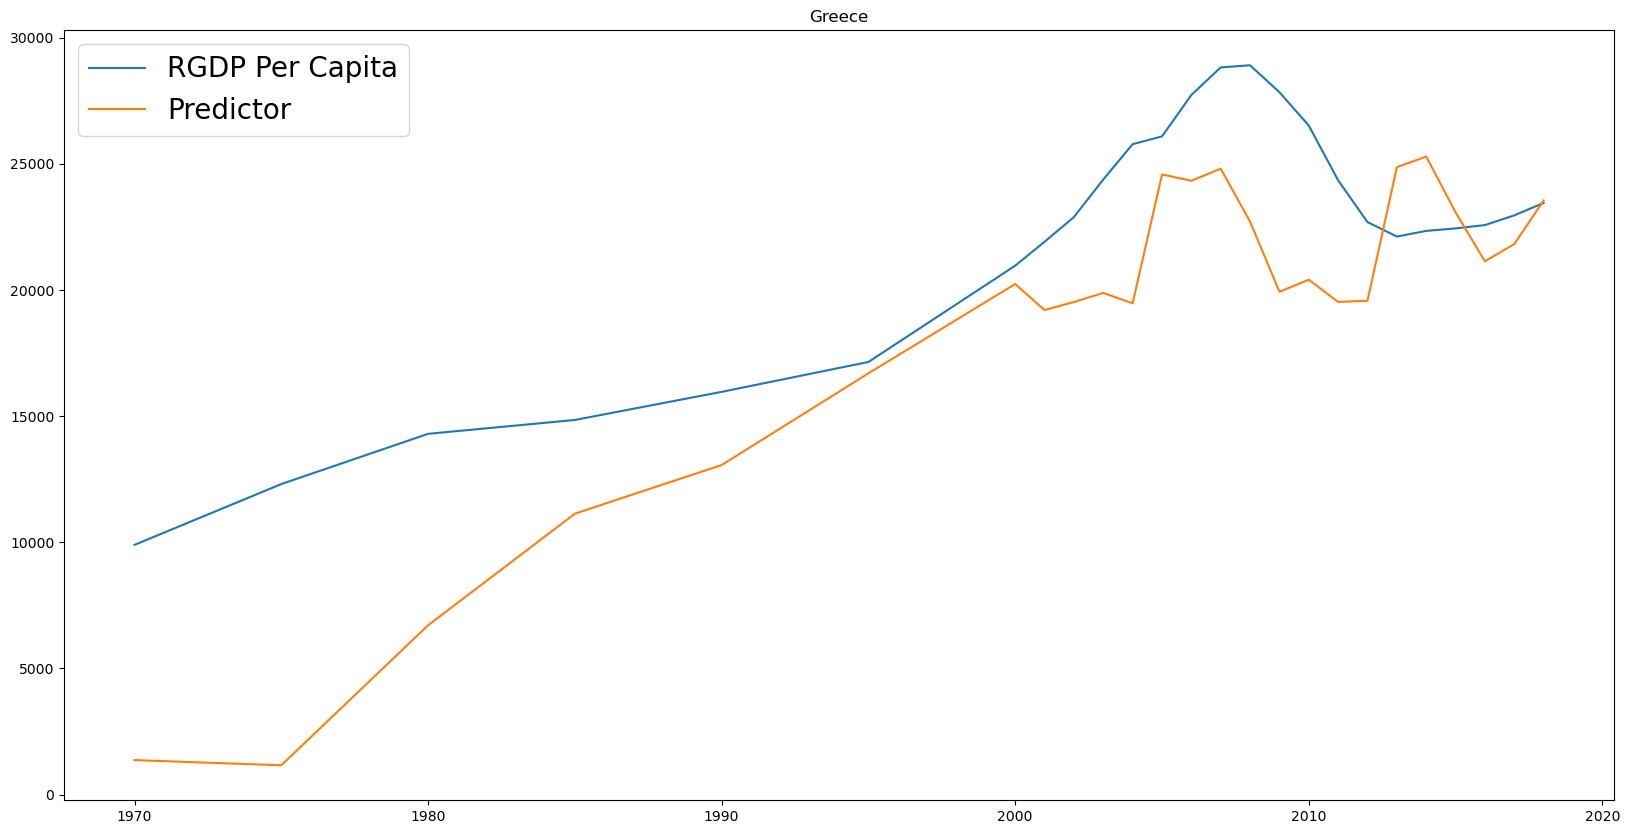

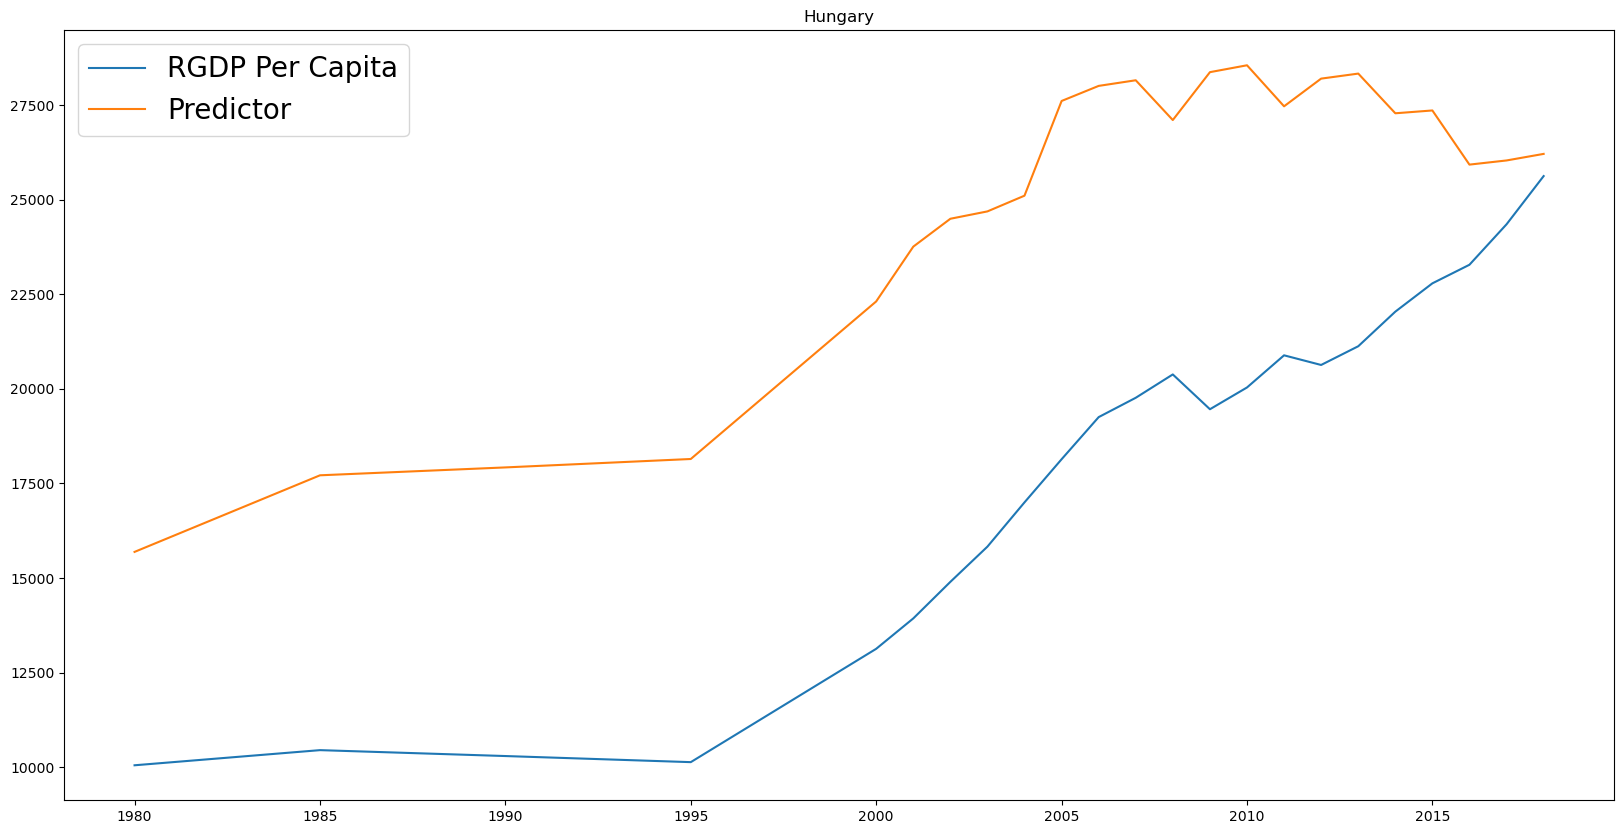

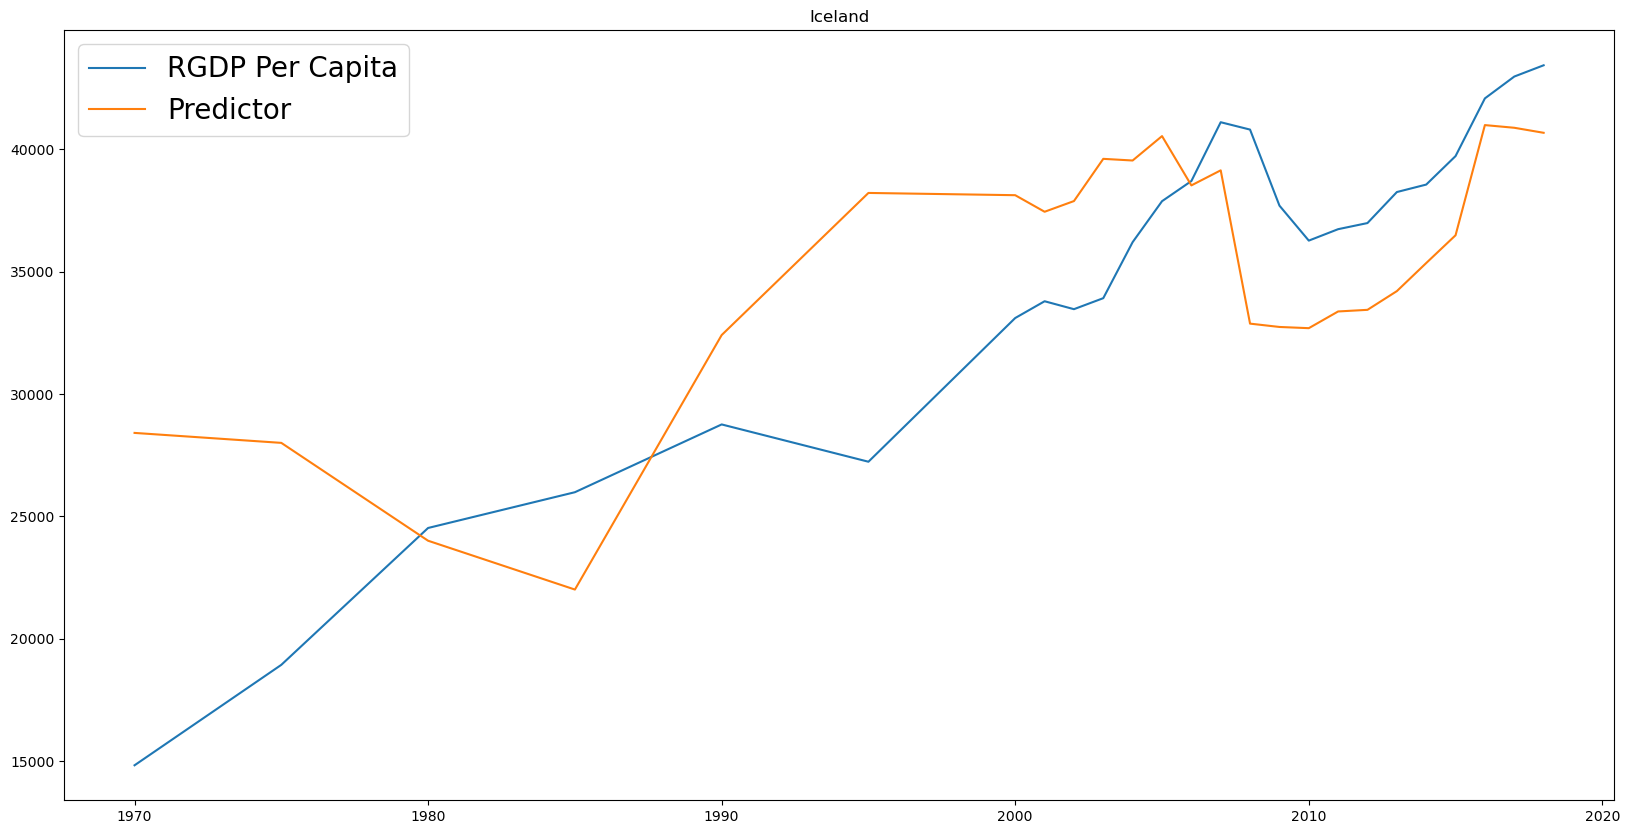

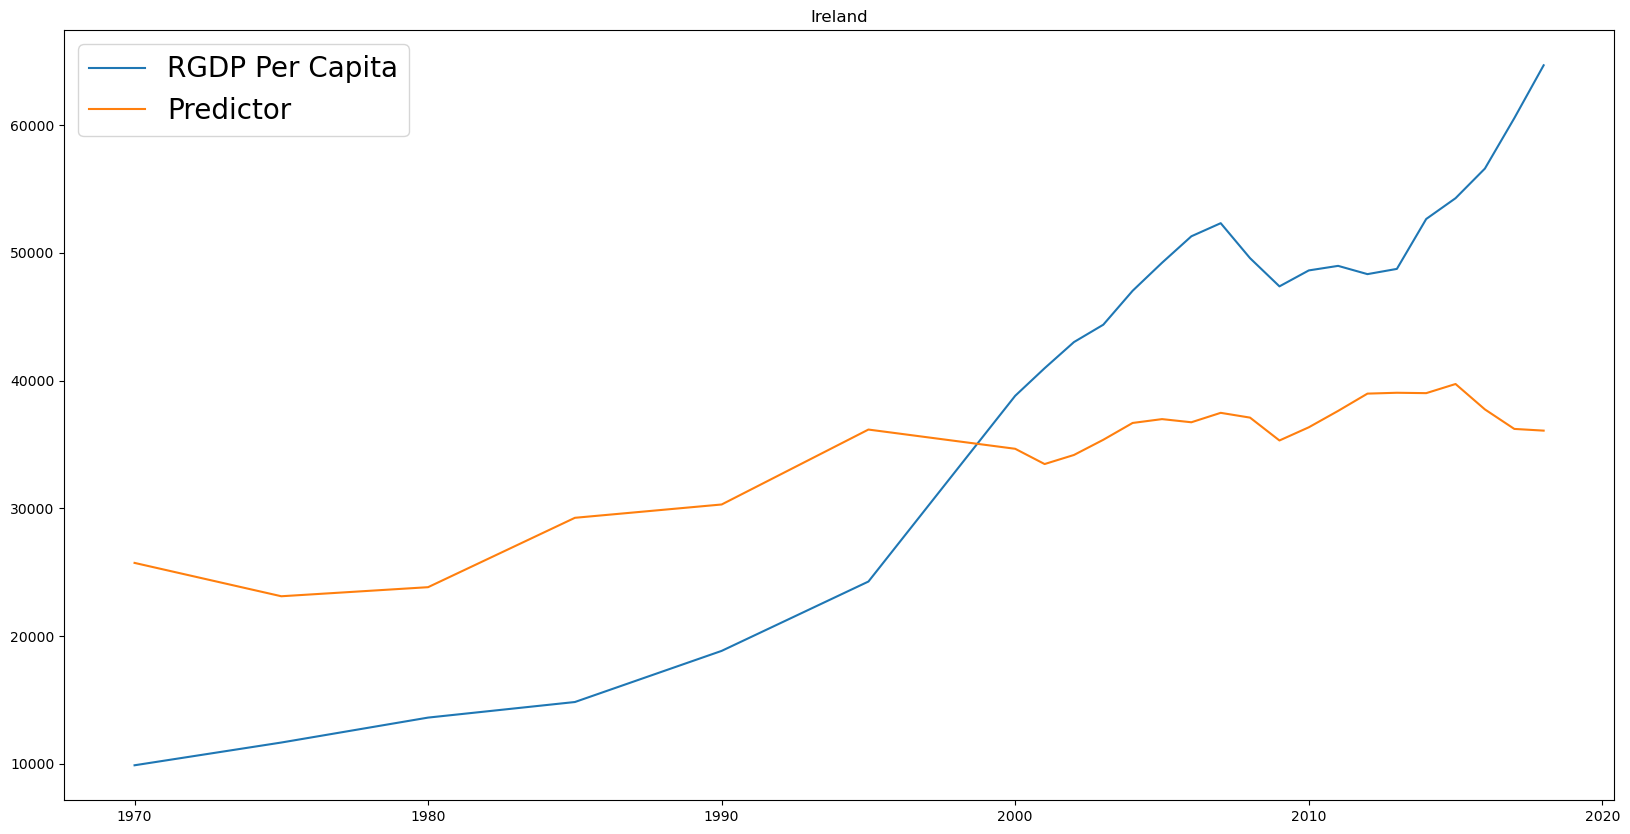

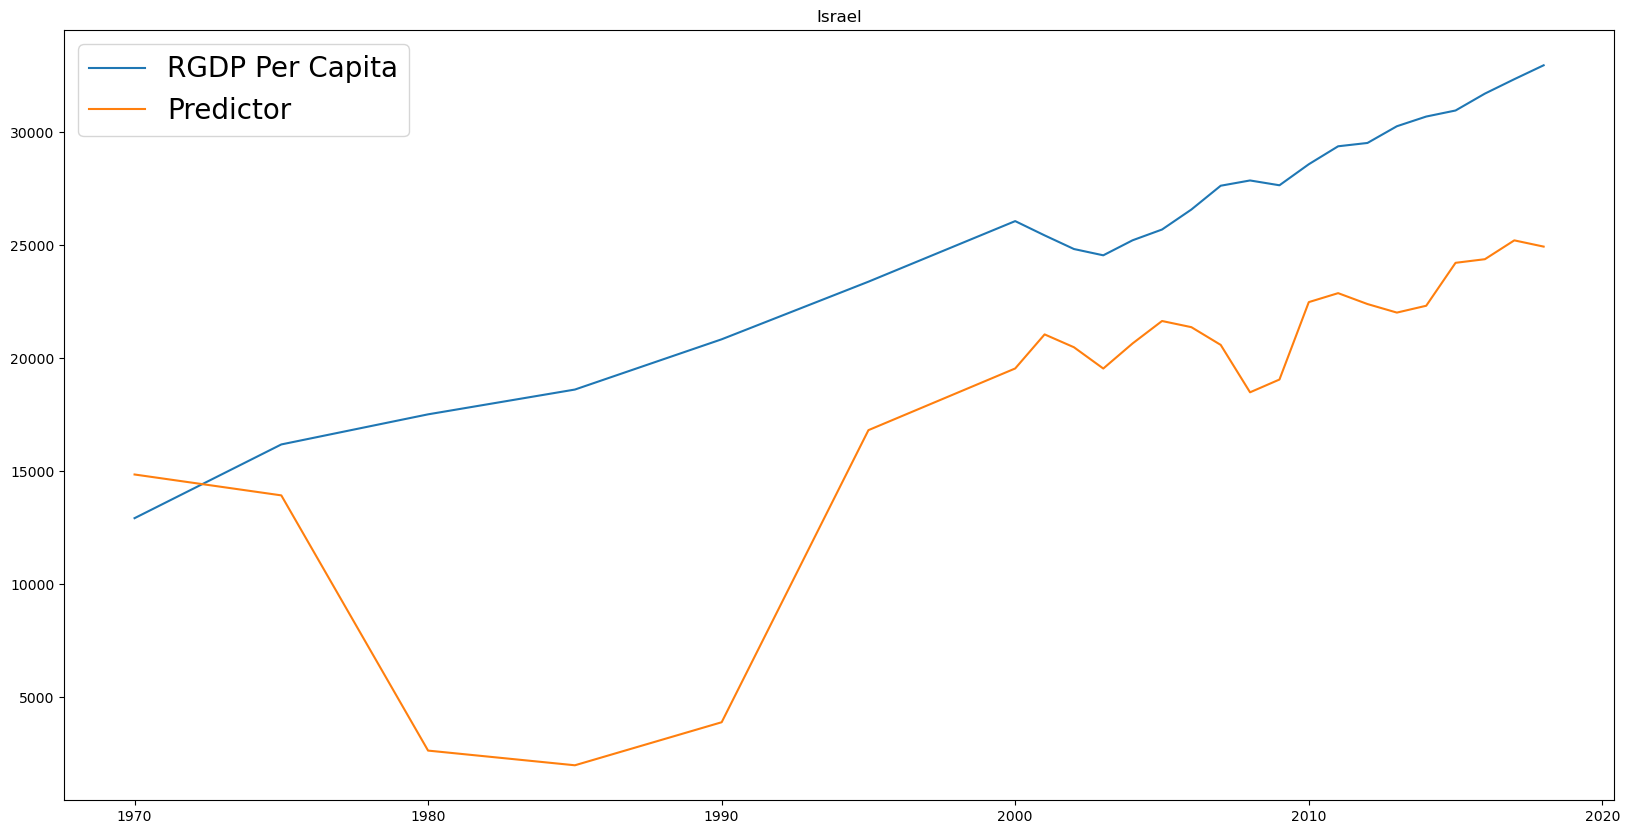

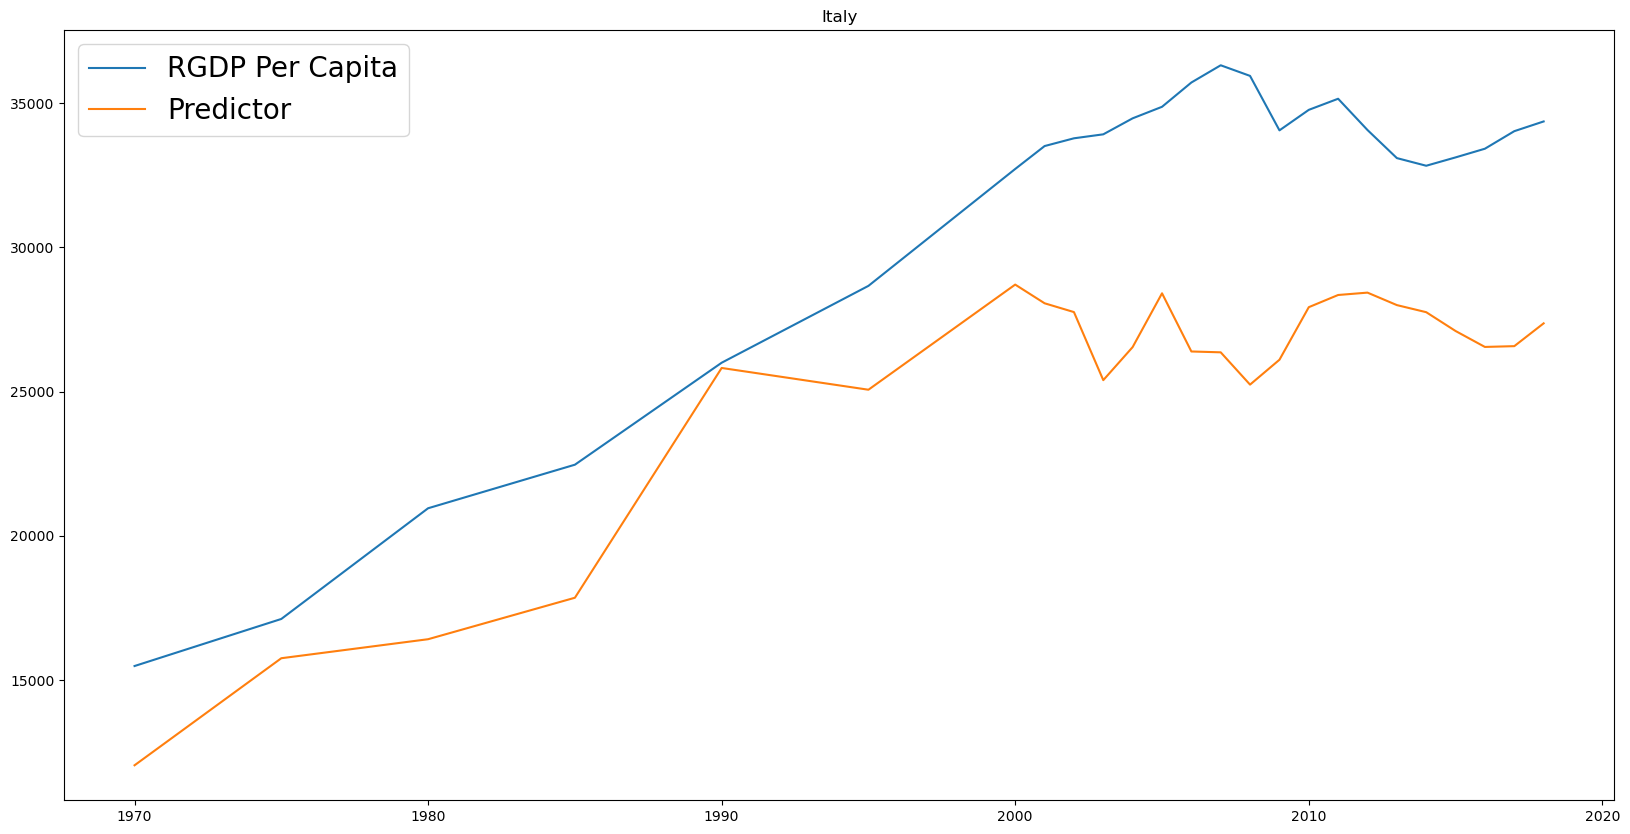

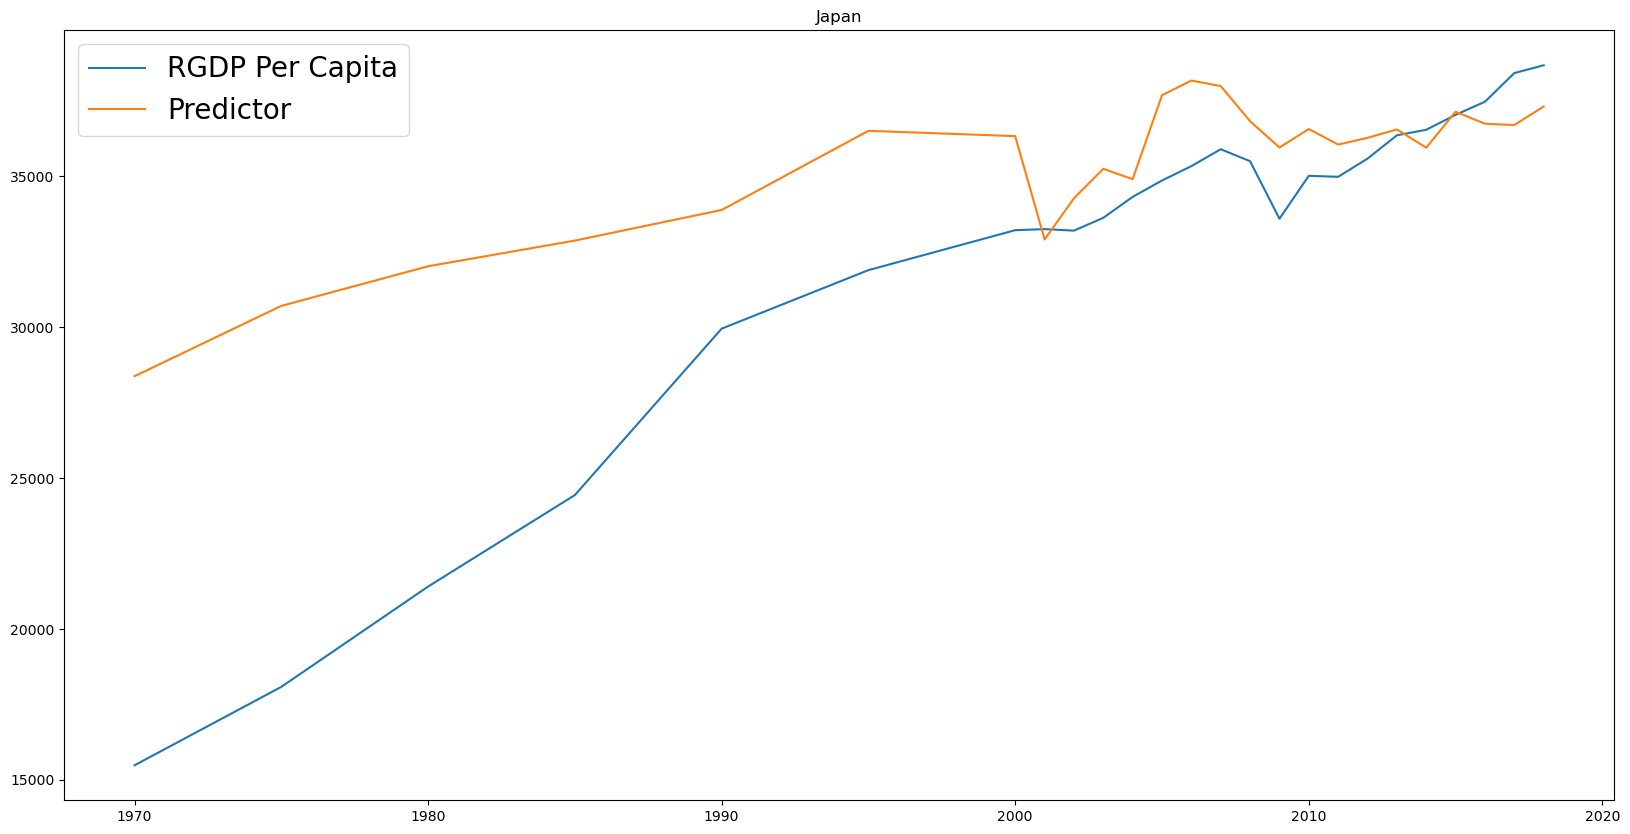

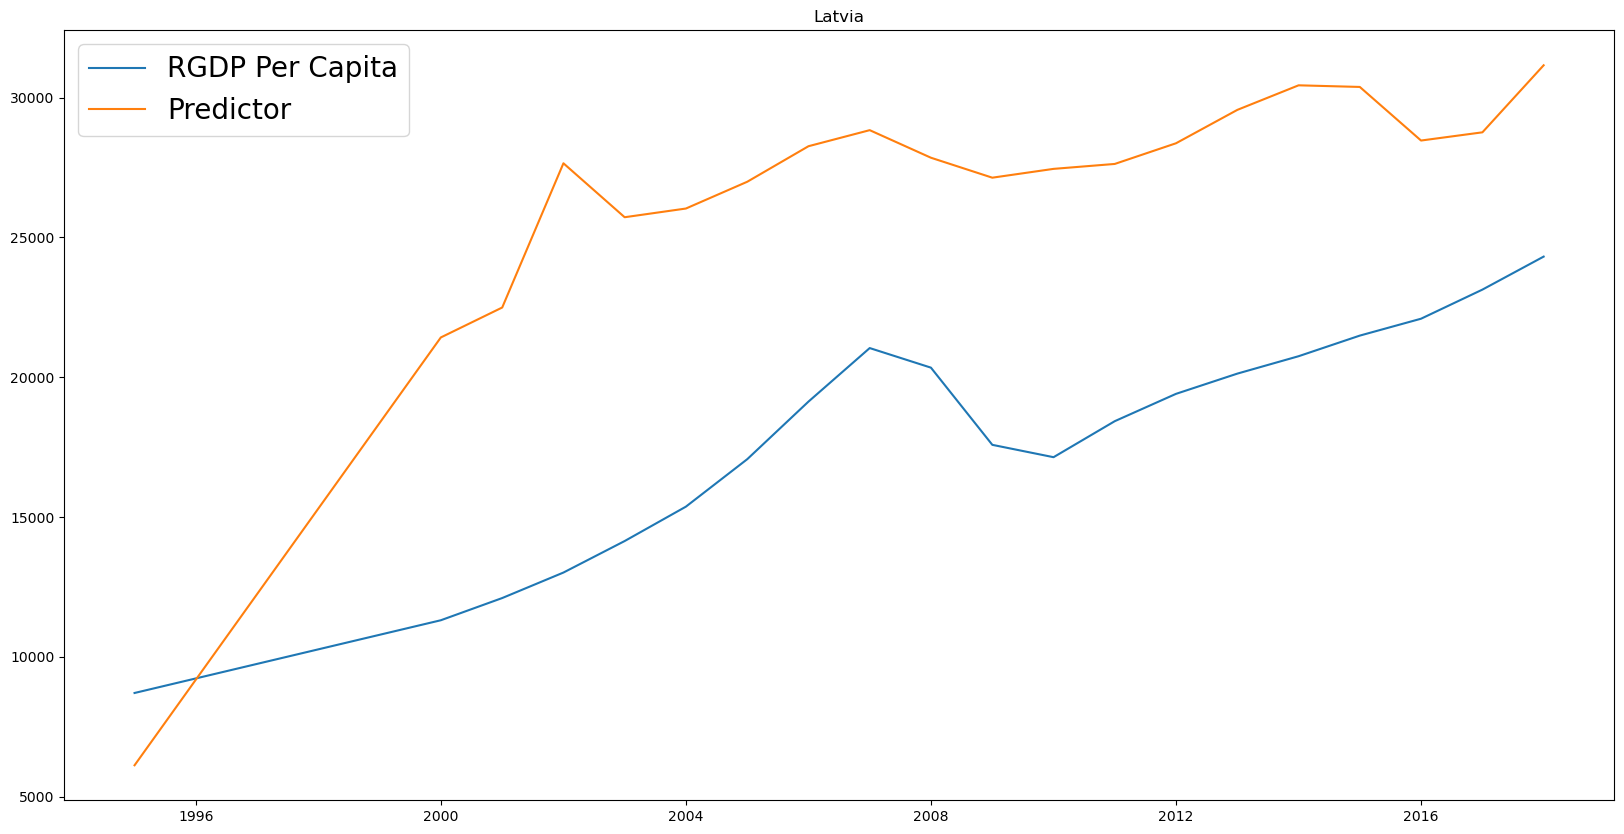

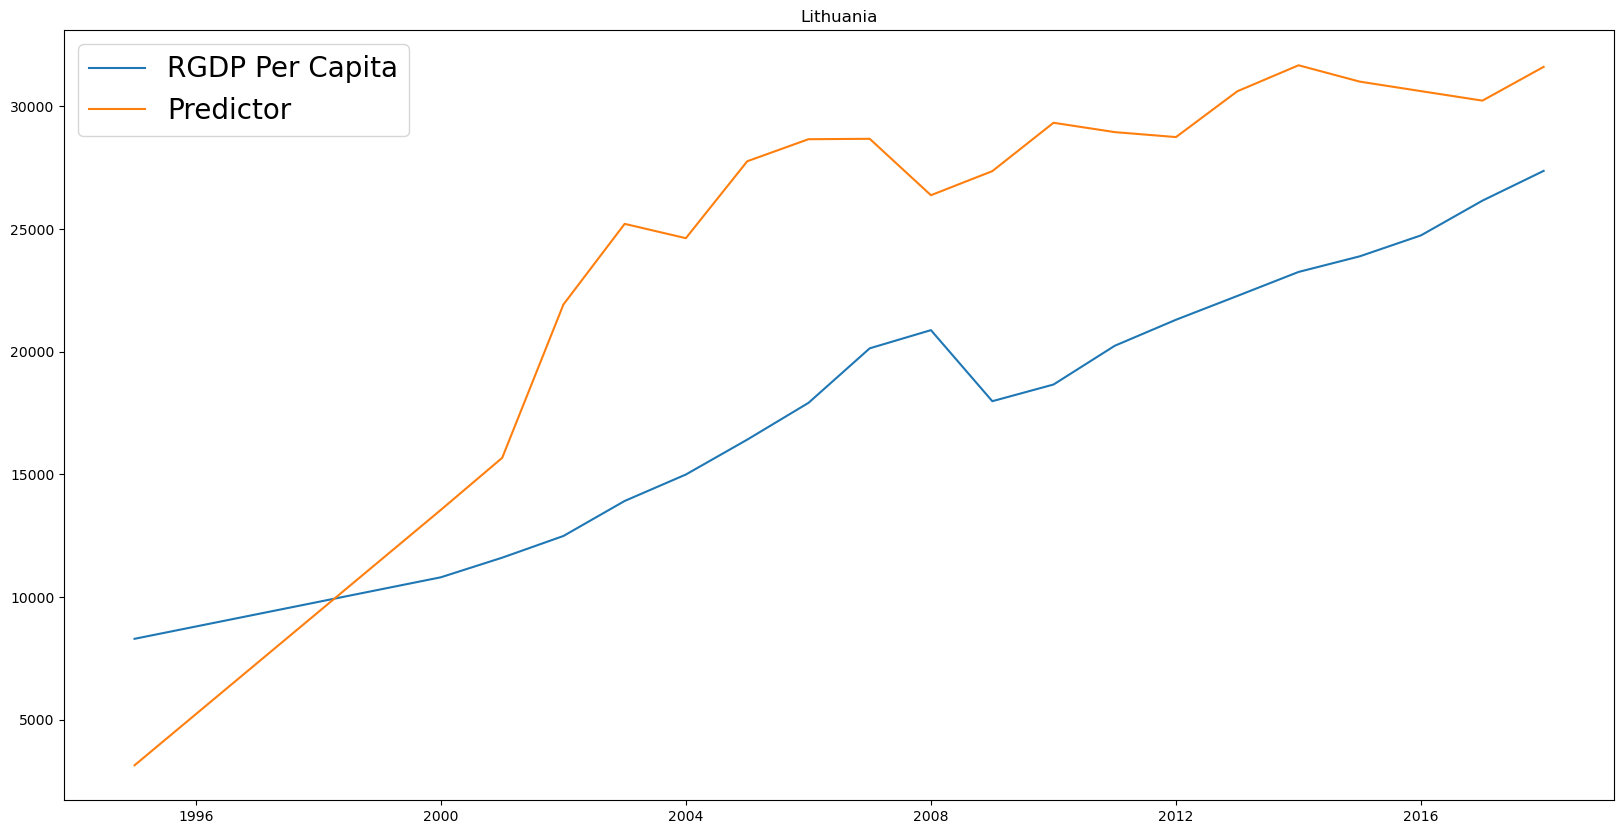

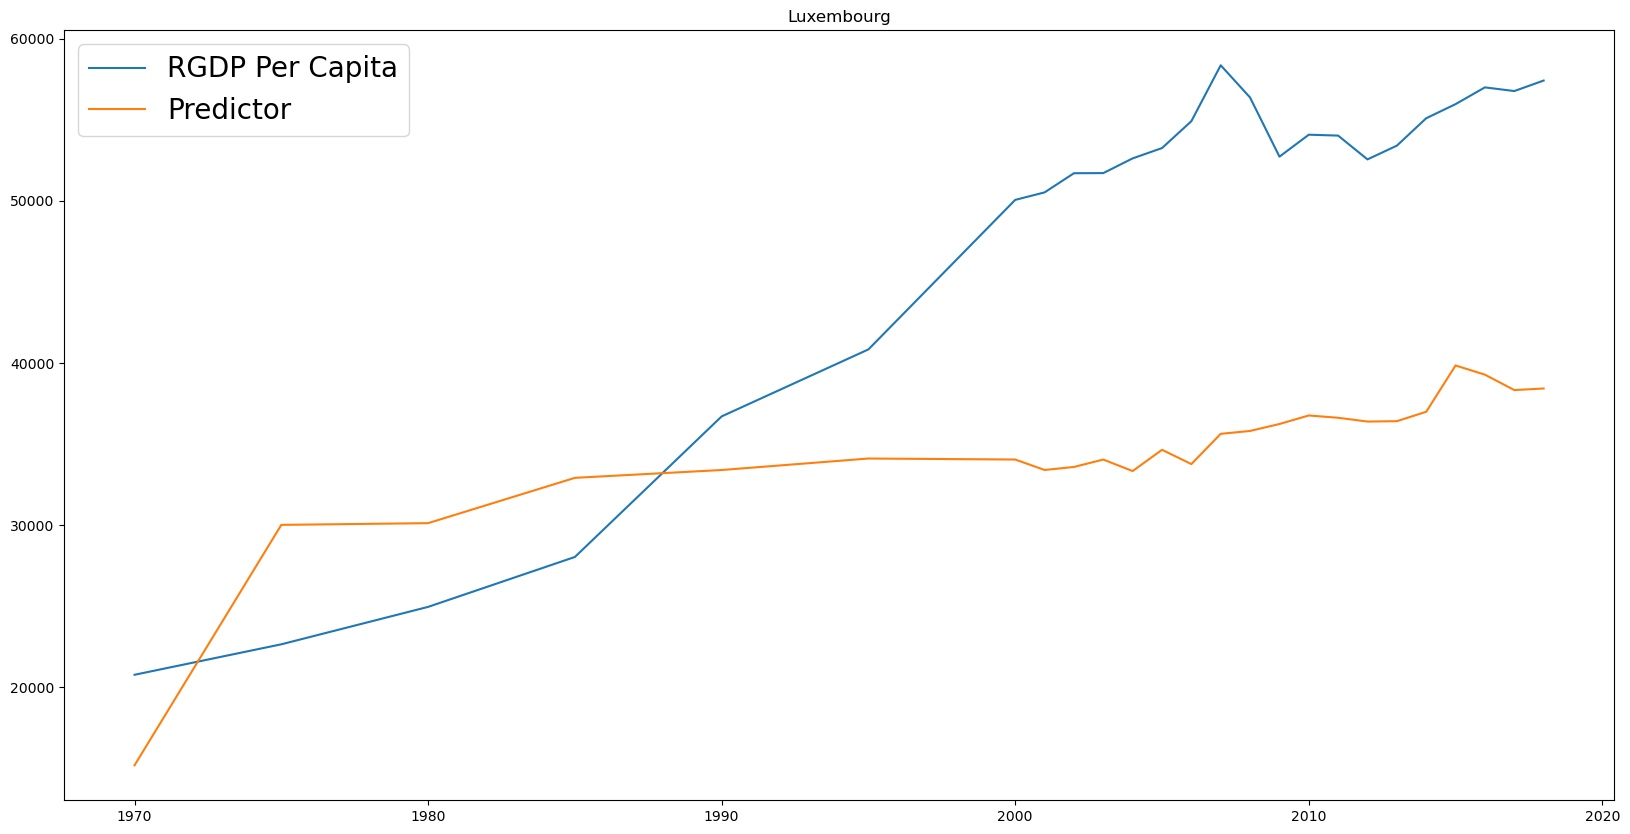

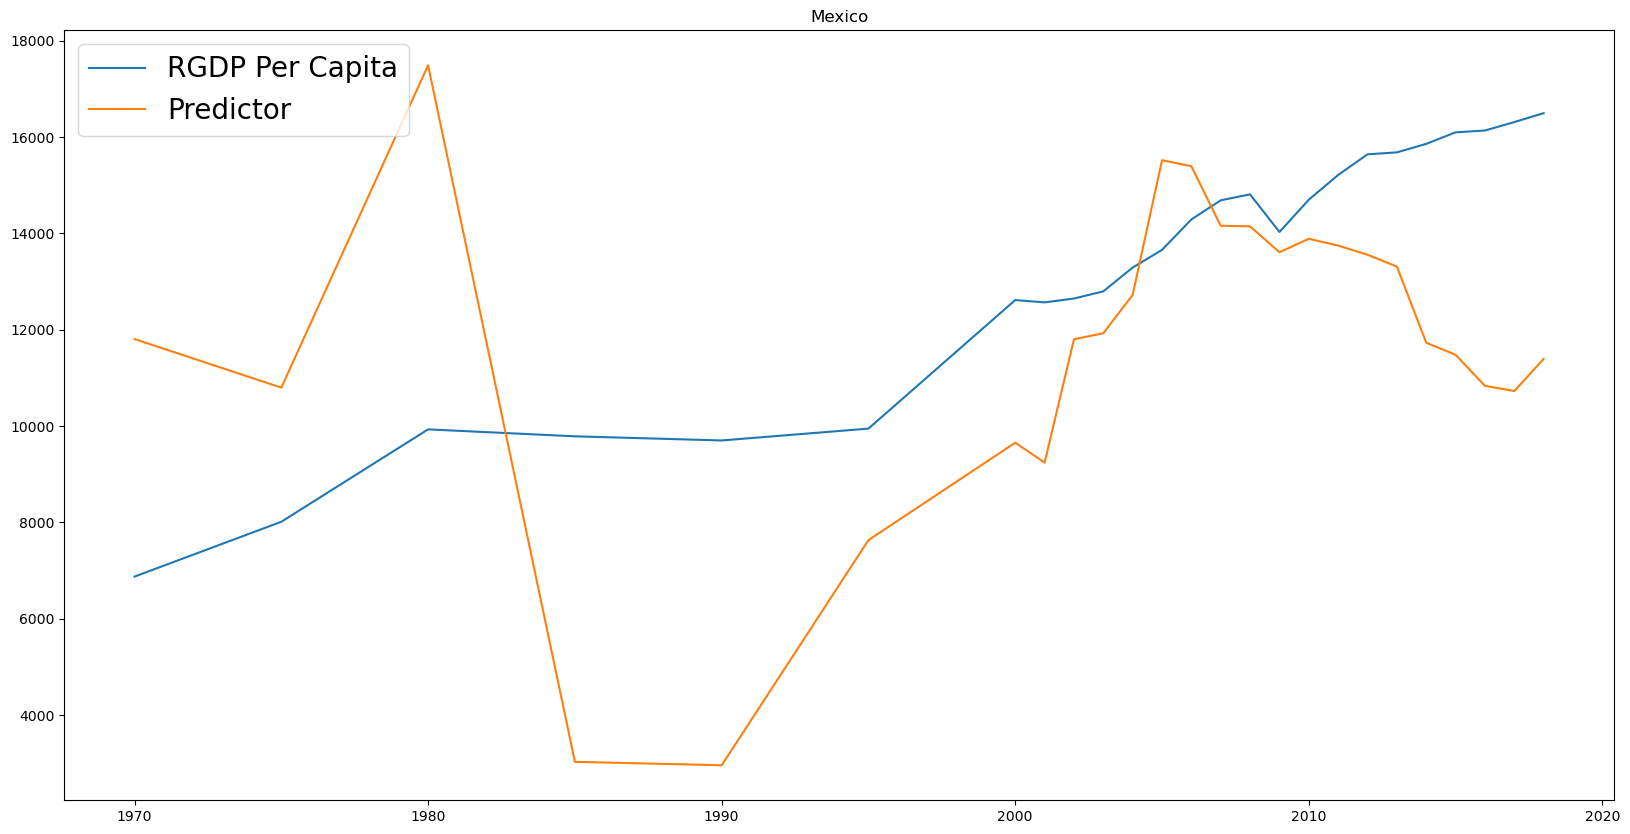

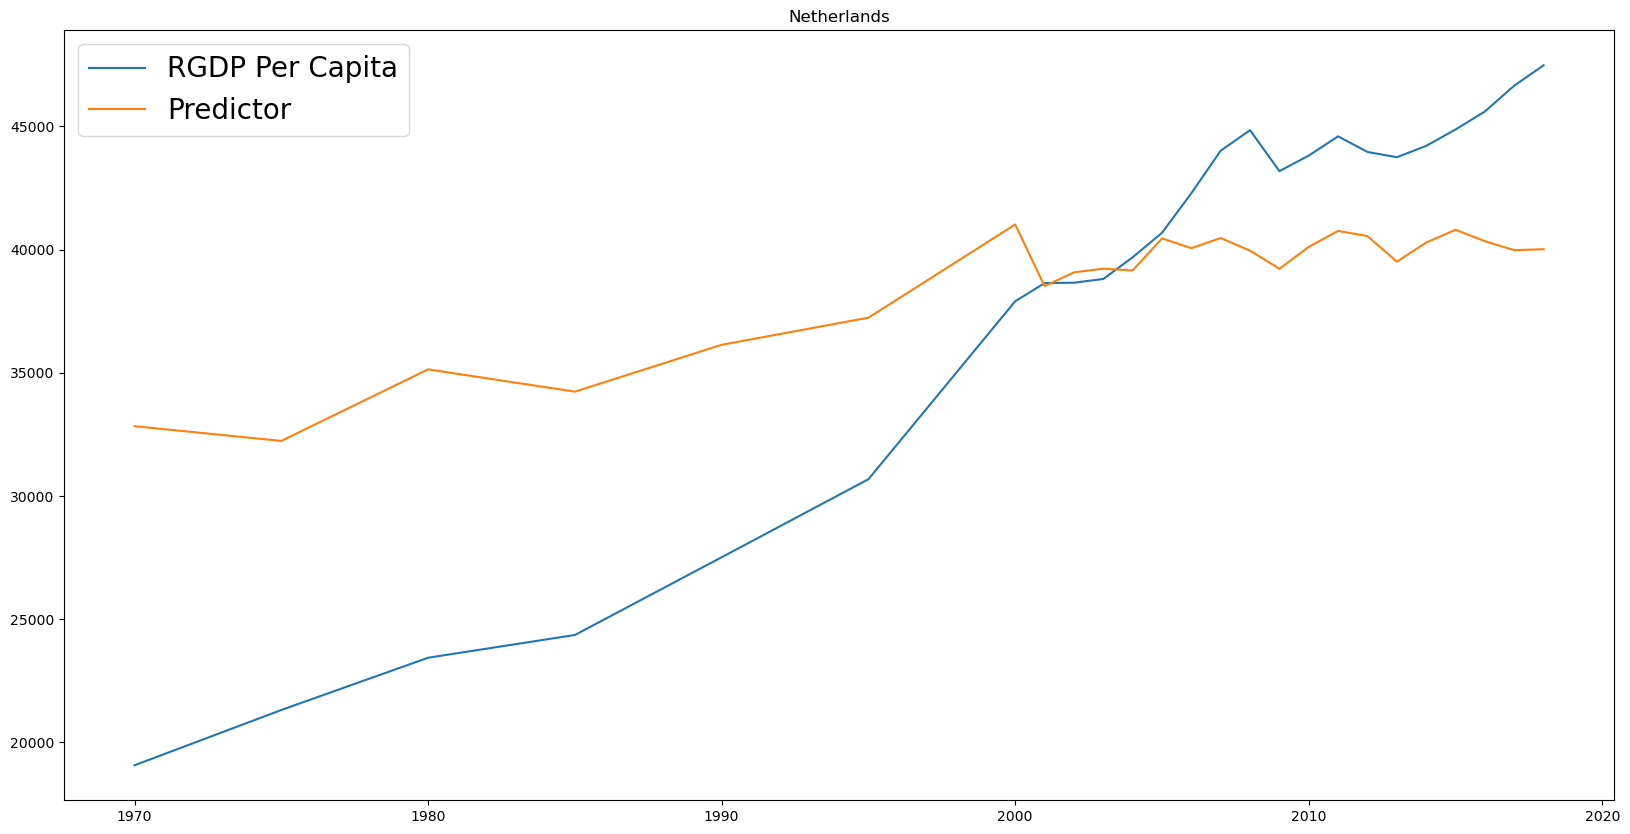

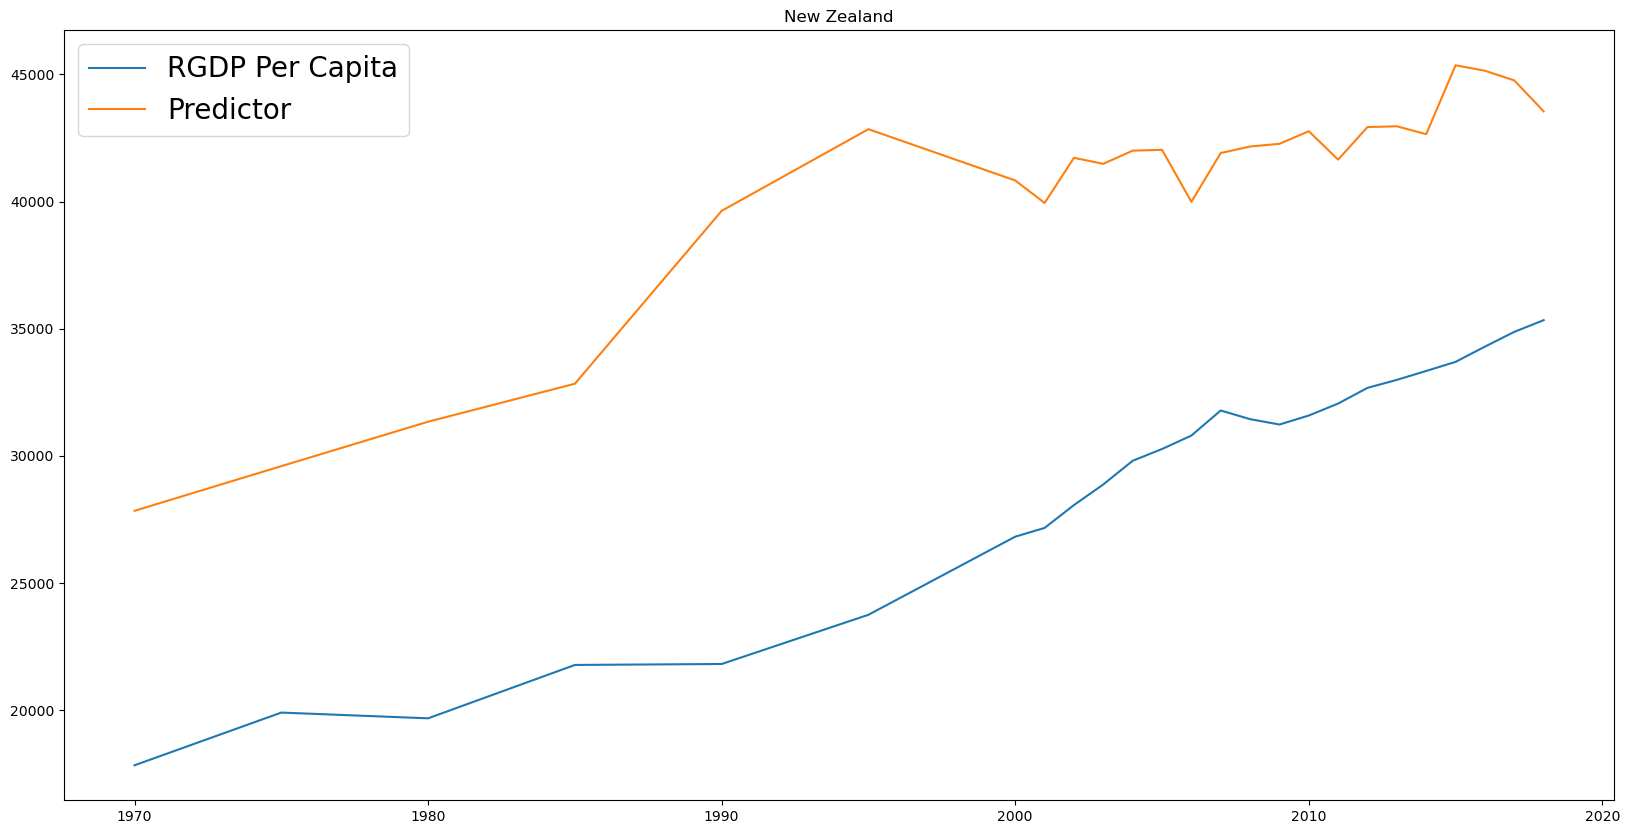

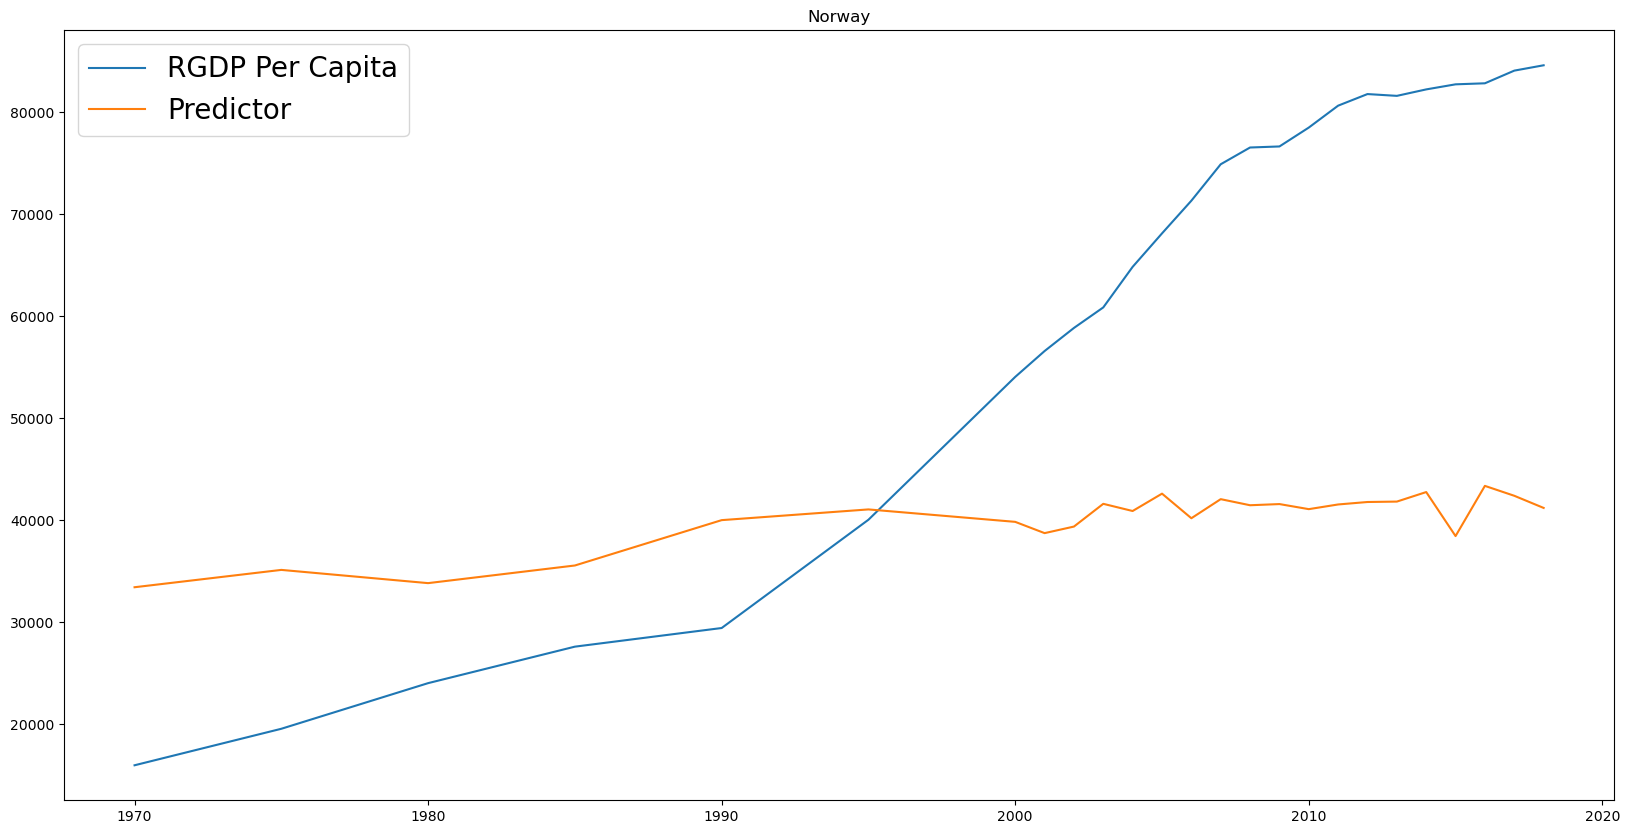

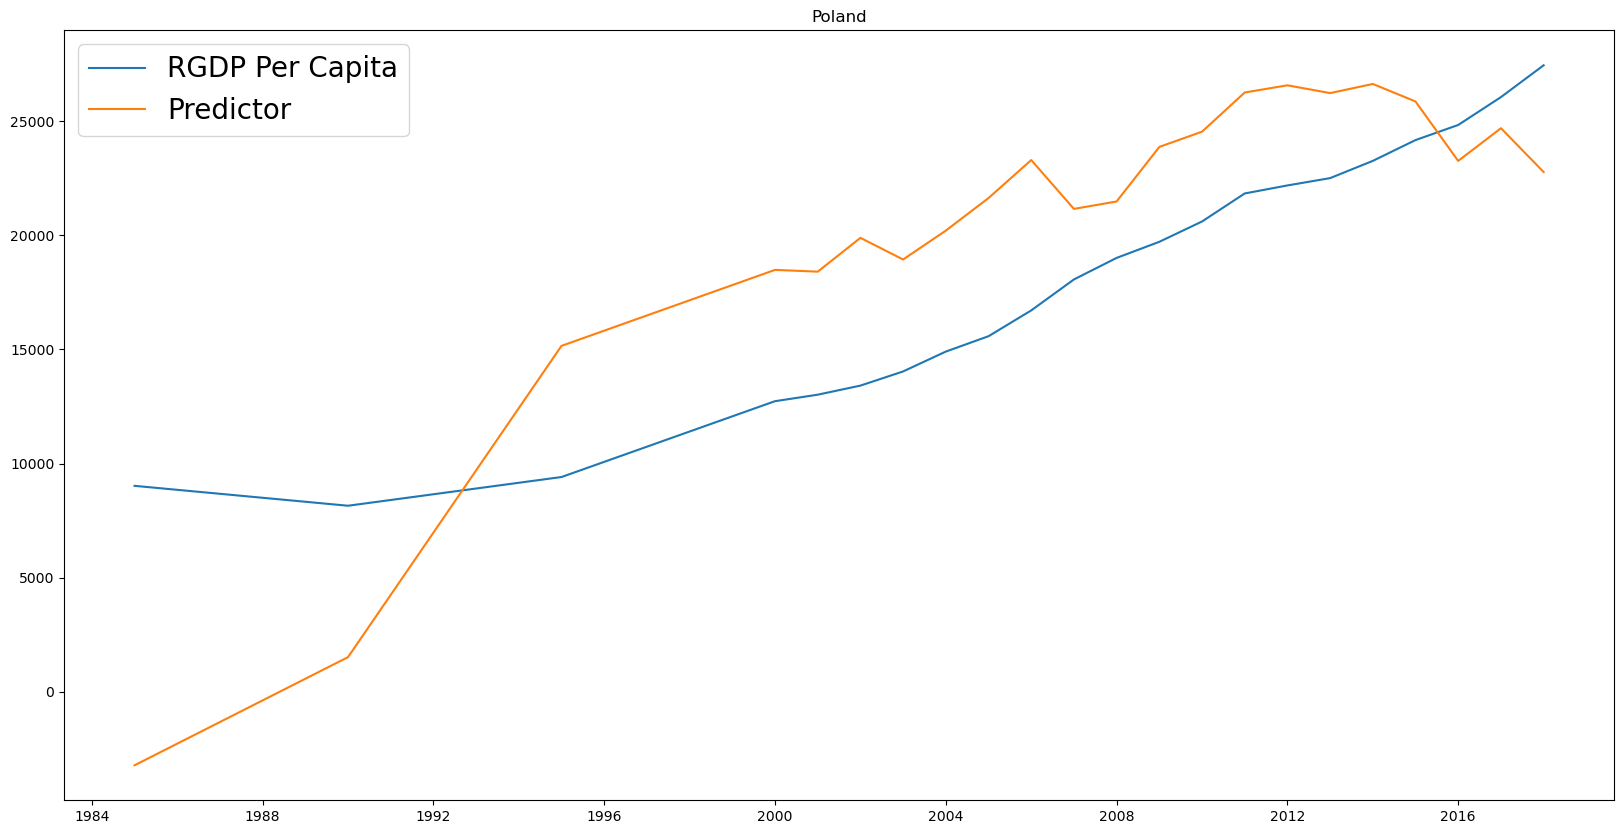

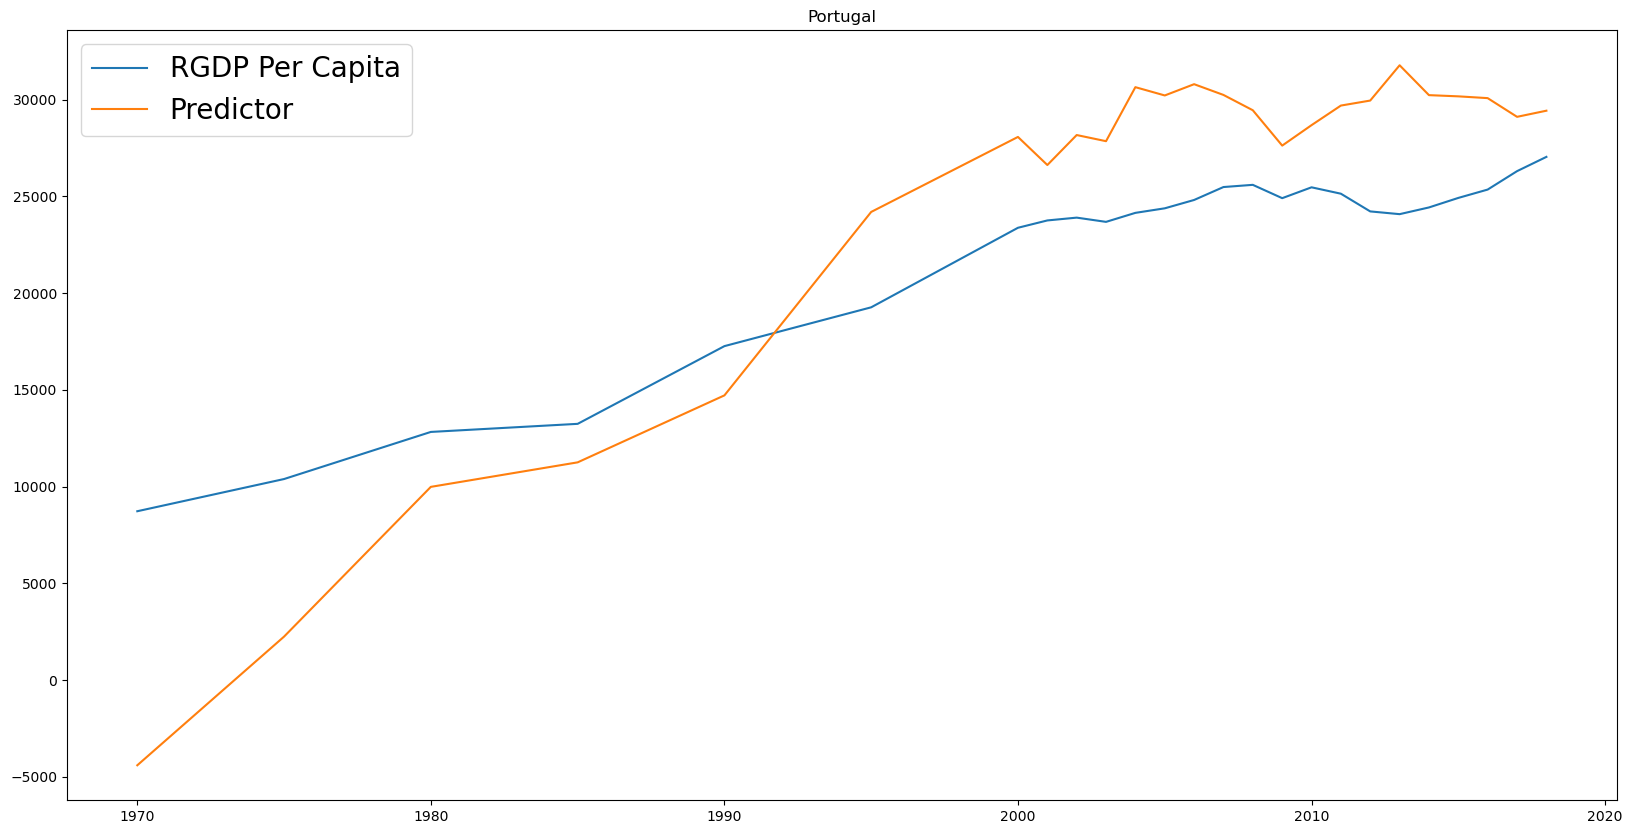

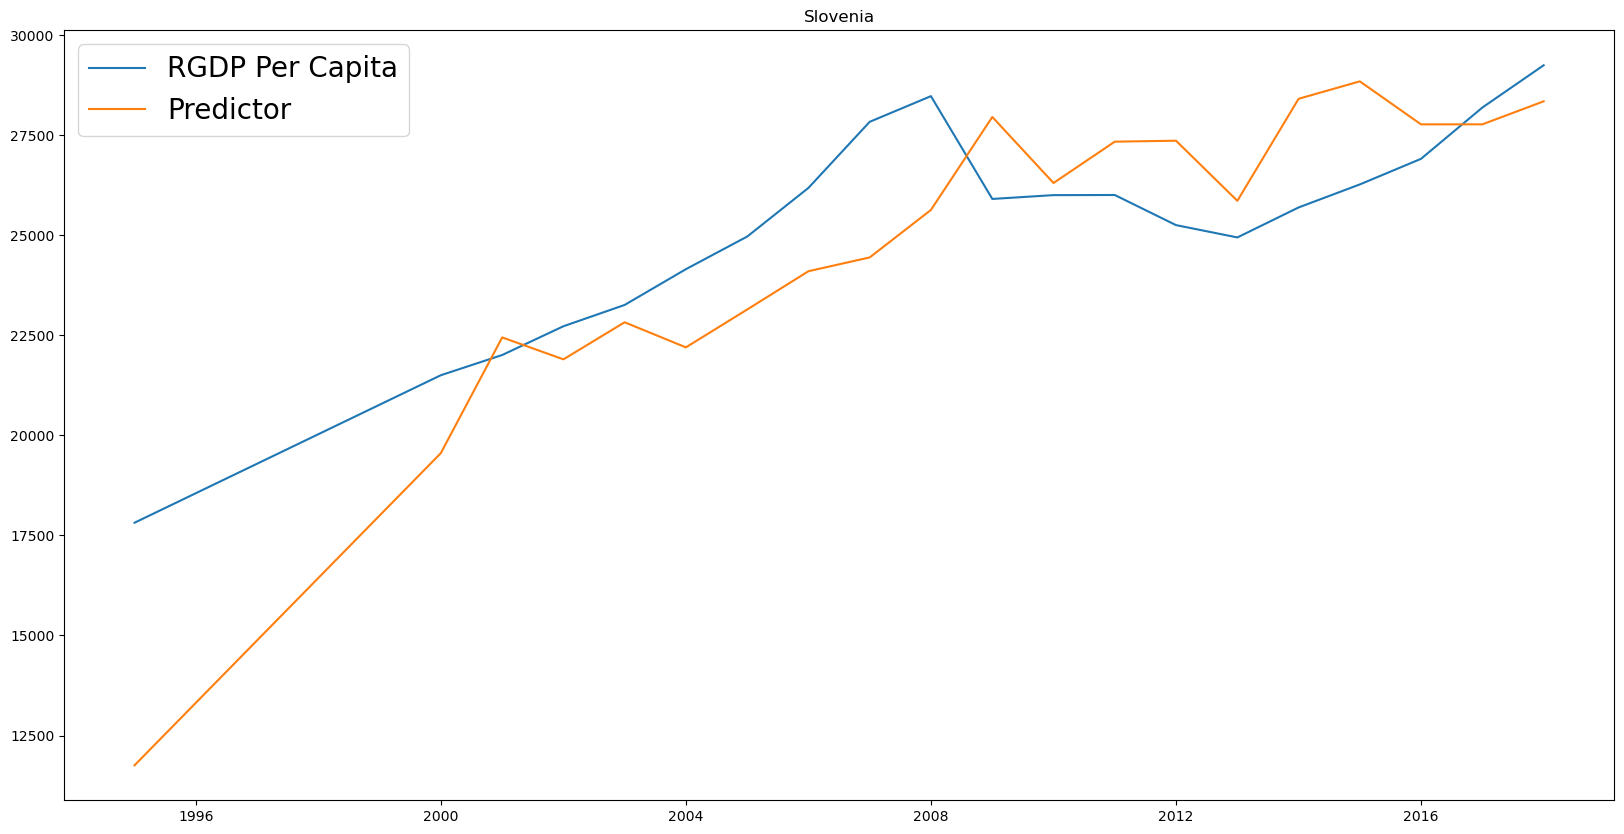

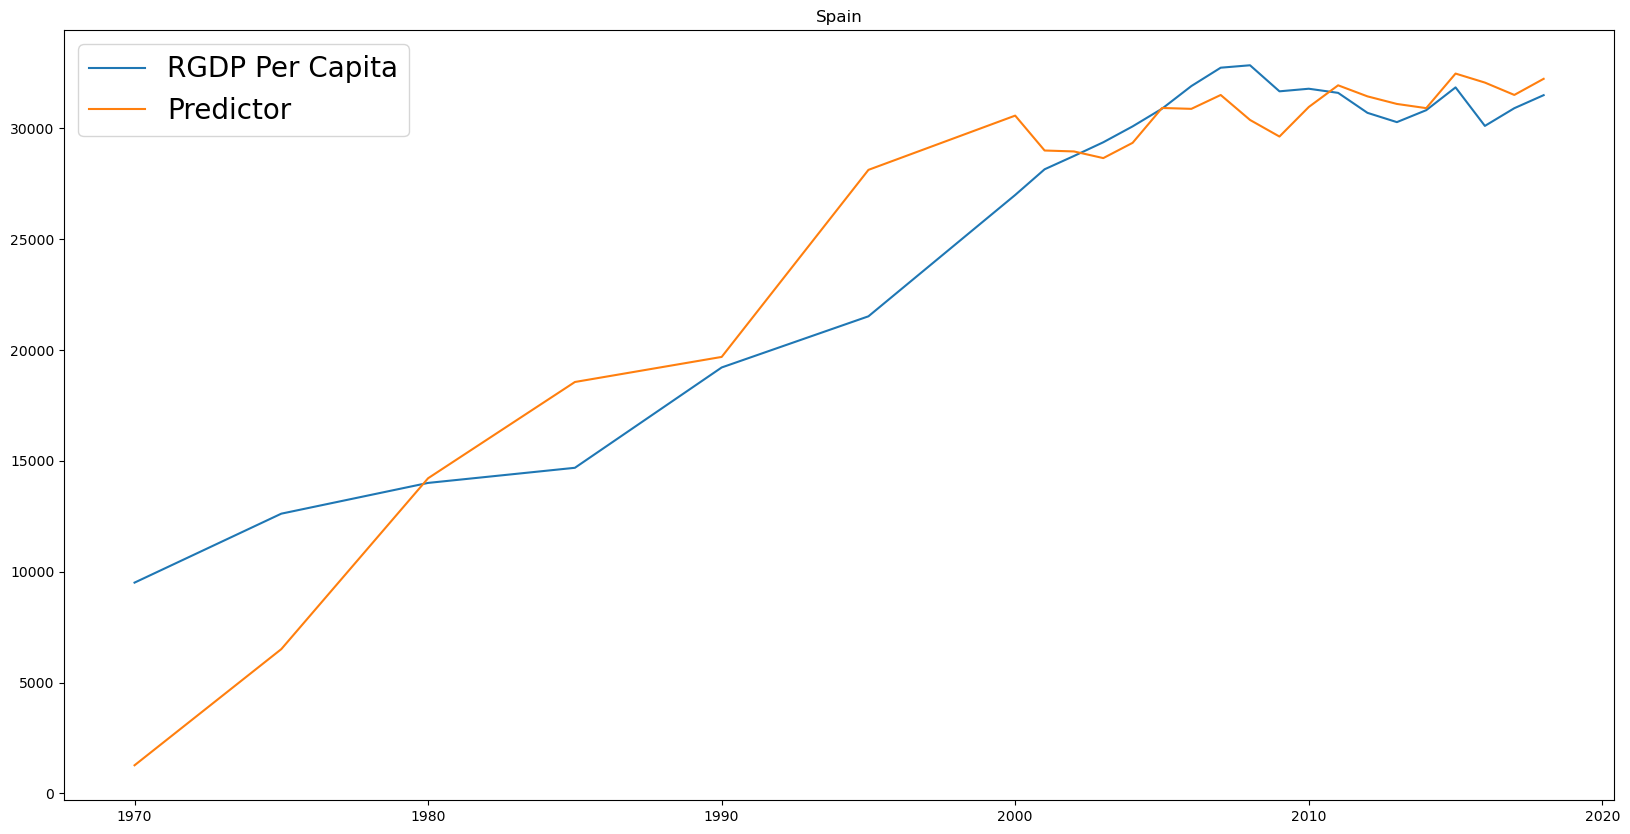

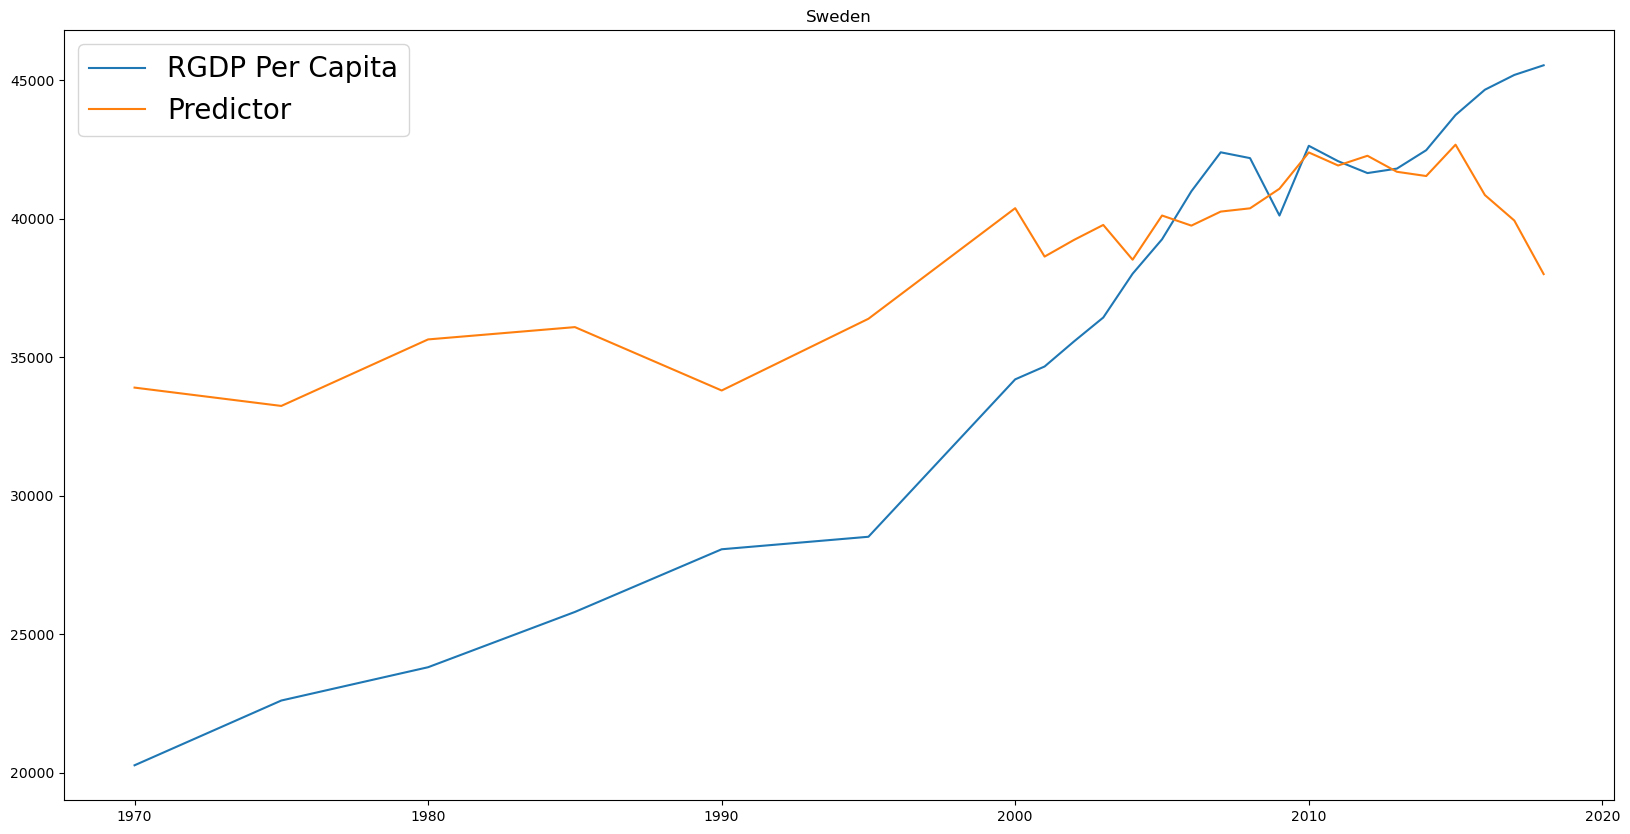

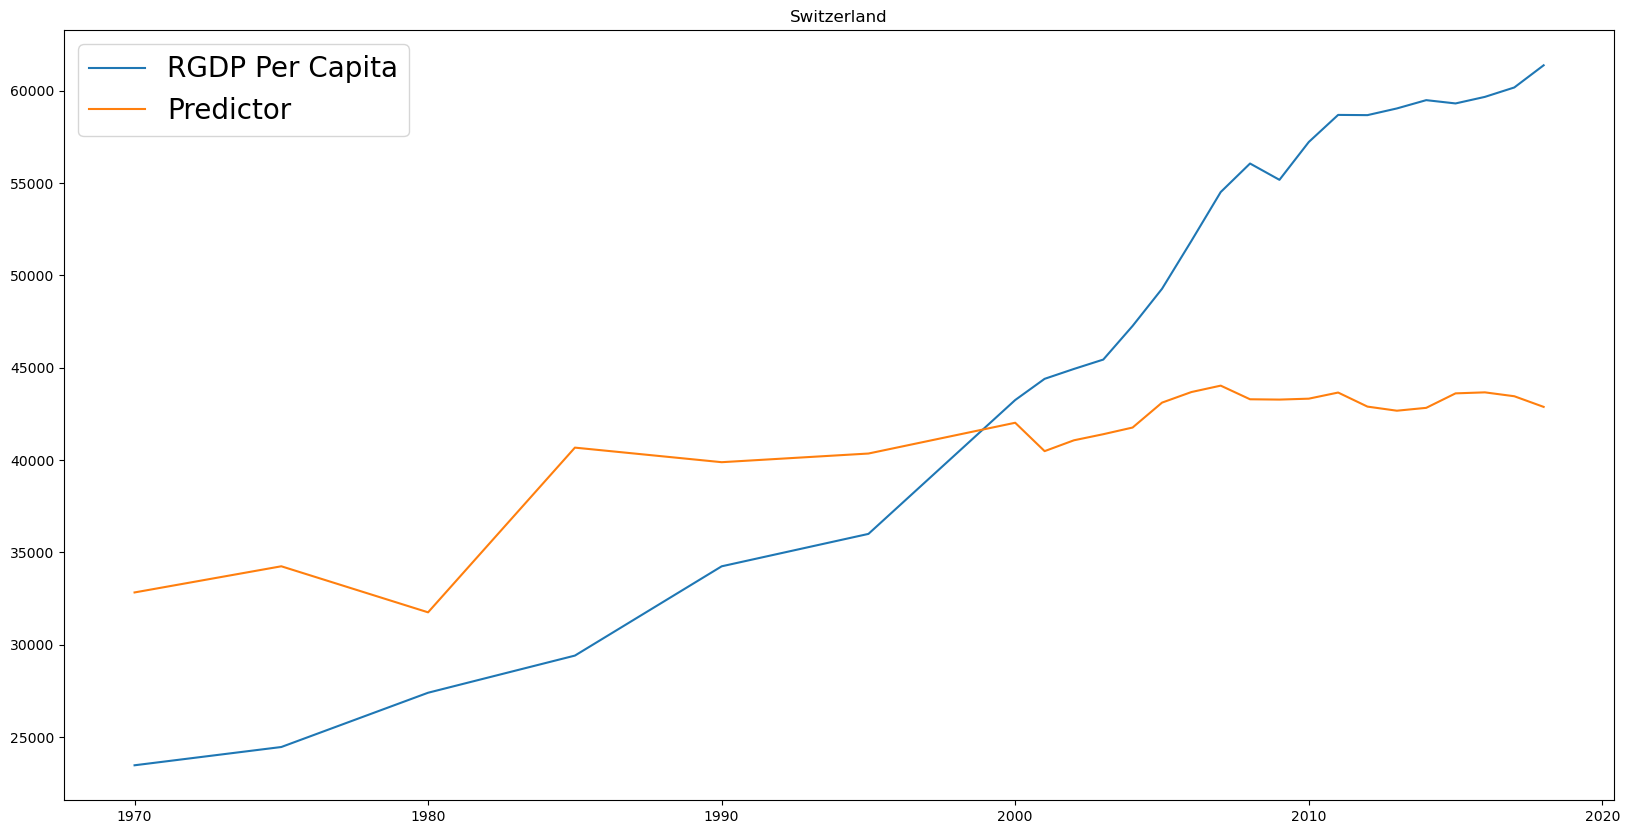

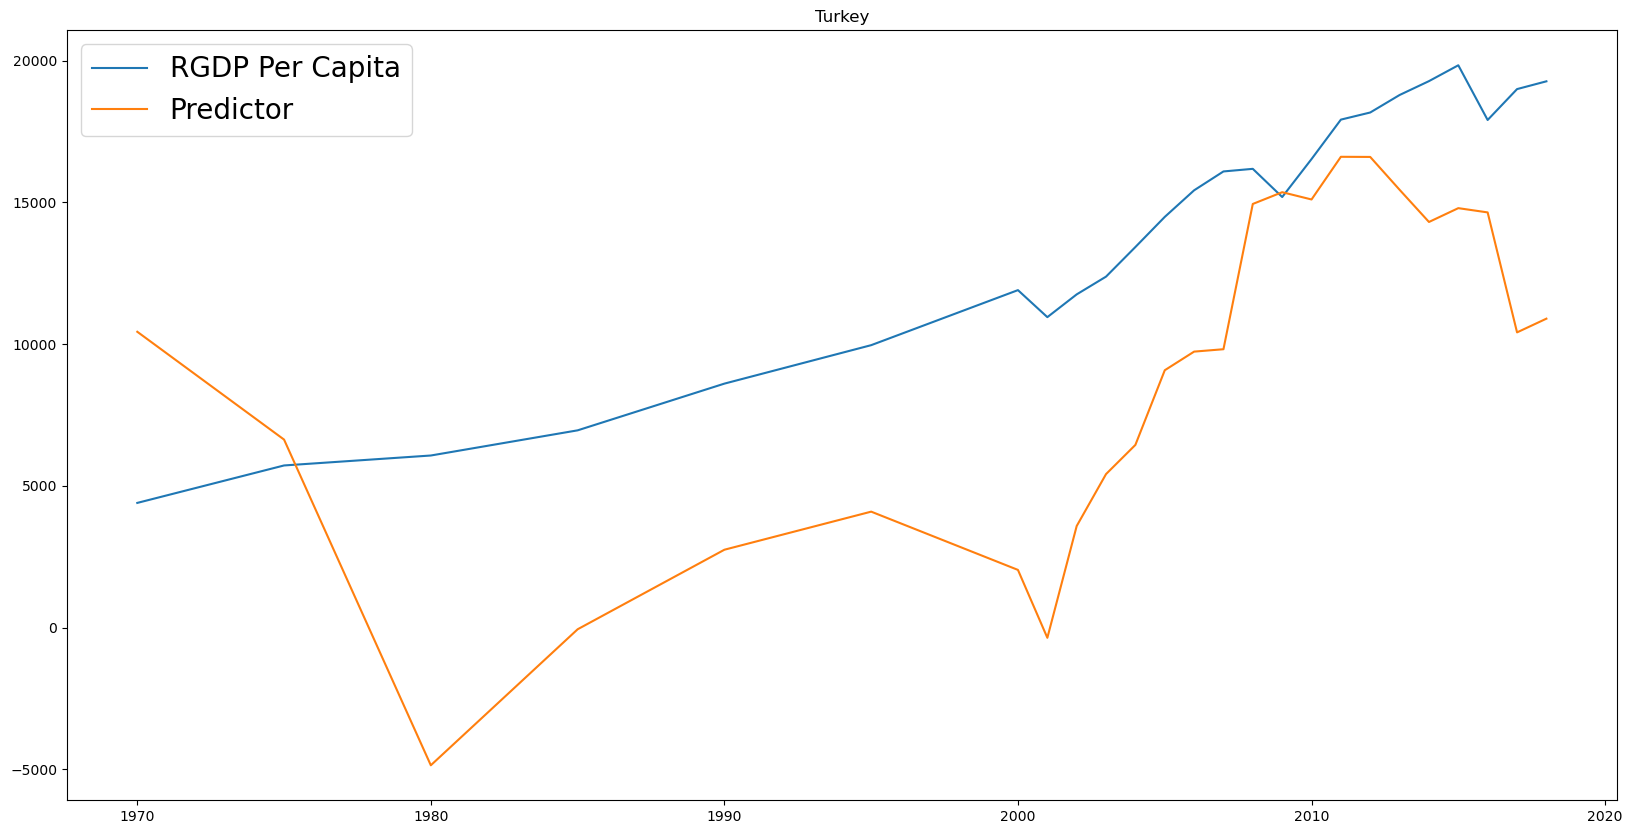

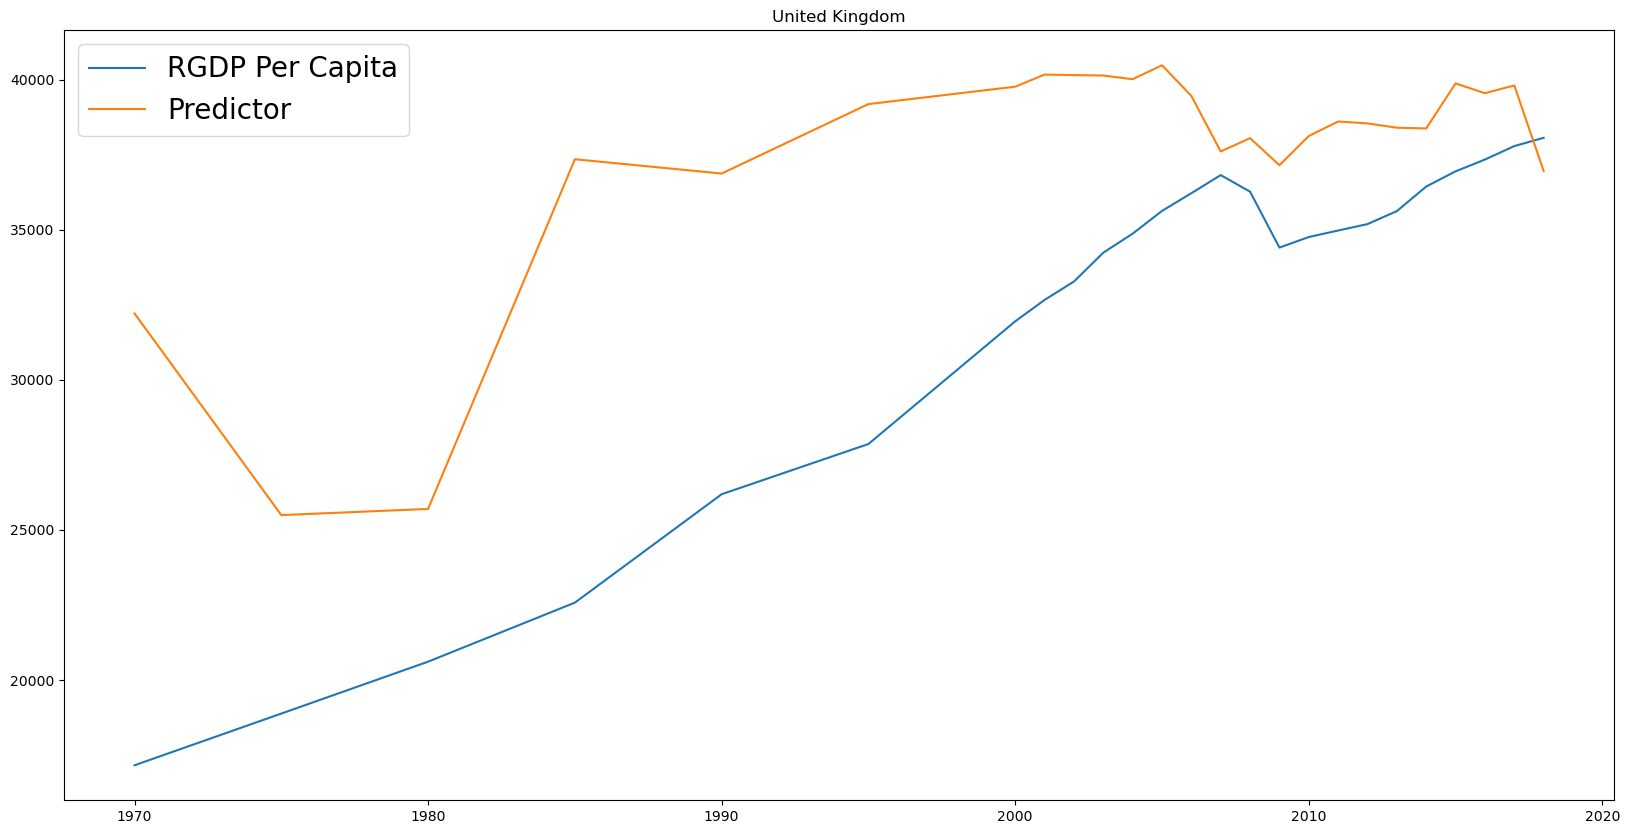

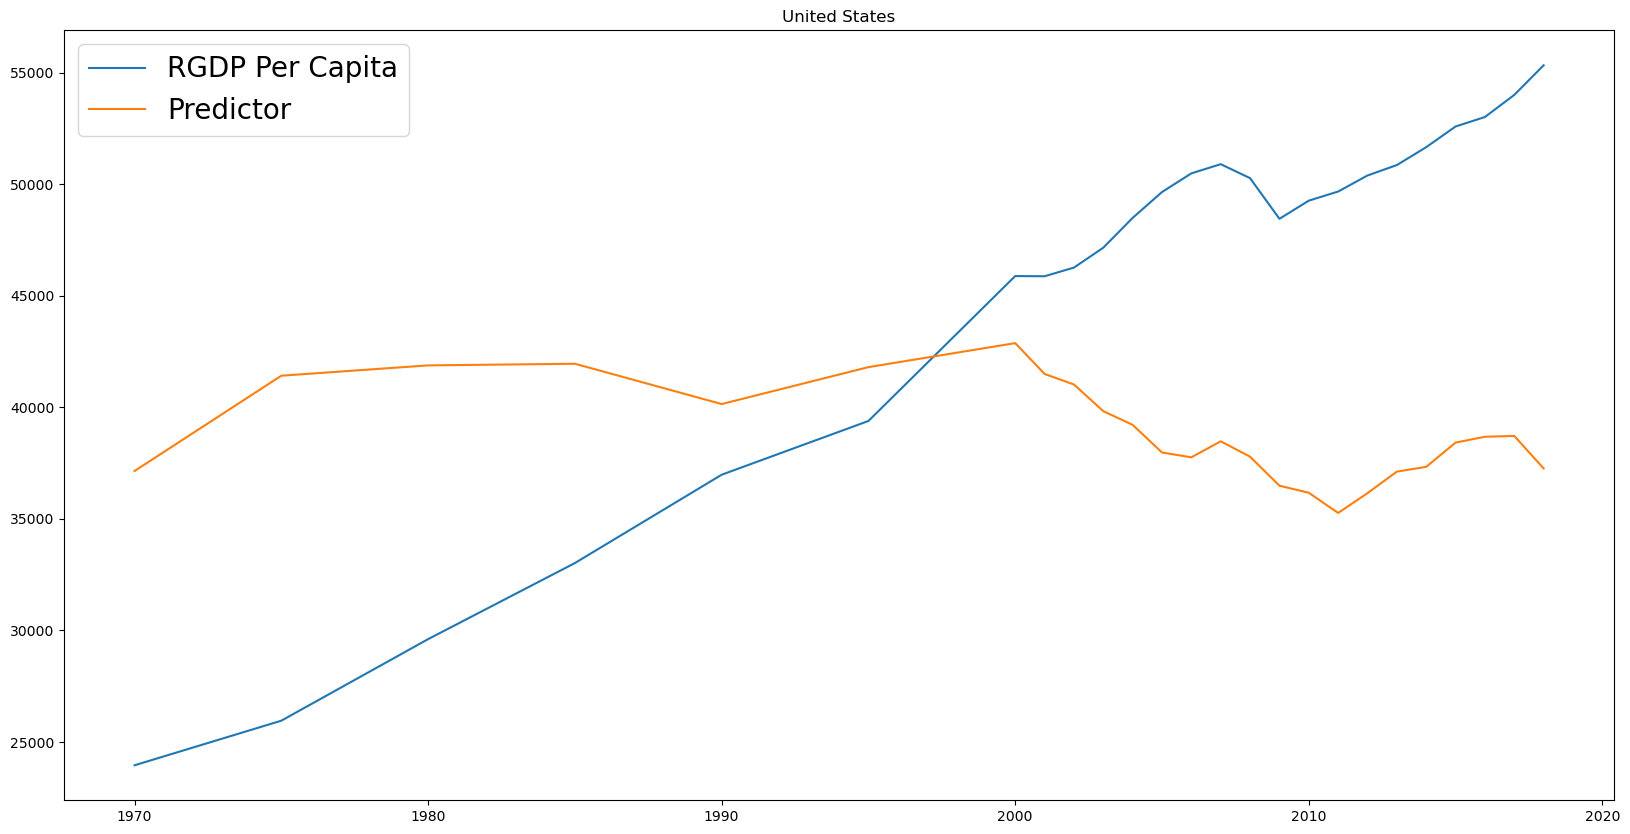

In [26]:
for country in countries:
    plot_data2 = r_df1.loc[country]
    fig, ax = plt.subplots(figsize = (20,10))
    y1 = plot_data2["RGDP Per Capita"]
    y2 = plot_data2["Predictor"]
    ax.plot(y1, label = "RGDP Per Capita")
    ax.plot(y2, label = "Predictor")
    ax.set_title(country)
    ax.legend(loc='upper left', fontsize = 20)
    plt.show()

# 5. Repeat questions 1 through 4 using 2 year lags and differences instead of 5 year lags and differences.

#### 1. Rerun the last regression where, only including oecd countries in the subset. A list of OECD countries is provided. You will need to find the 3 letter ISO code associated with each country. (Hint: Reimport the dataframe we saved early in the lesson)

In [27]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

In [28]:
oecd_data1 = hw_data[hw_data["Countries"].isin(oecd_countries)]
oecd_data1

ISO_Code_3       Year ISO_Code_2    World Bank Region  \
245         AUS 1970-01-01         AU  East Asia & Pacific   
250         NaN 1975-01-01         AU  East Asia & Pacific   
255         NaN 1980-01-01         AU  East Asia & Pacific   
260         NaN 1985-01-01         AU  East Asia & Pacific   
265         NaN 1990-01-01         AU  East Asia & Pacific   
...         ...        ...        ...                  ...   
7786        NaN 2014-01-01         US        North America   
7787        NaN 2015-01-01         US        North America   
7788        NaN 2016-01-01         US        North America   
7789        NaN 2017-01-01         US        North America   
7790        NaN 2018-01-01         US        North America   

     World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
245                                                 NaN                                                                                     
250                                                 NaN                                                                                     
255                                                 NaN                                                                                     
260                                                 NaN                                                                                     
265                                                   H                                                                                     
...                                                 ...                                                                                     
7786                                                  H                                                                                     
7787                                                  H                                                                                     
7788                                                  H                                                                                     
7789                                                  H                                                                                     
7790                                                  H                                                                                     

          Countries   Summary  Size of Government  \
245       Australia  7.291154            6.863768   
250       Australia  7.002204            6.255684   
255       Australia  7.316469            6.339449   
260       Australia  7.670016            6.259326   
265       Australia  7.927001            6.708215   
...             ...       ...                 ...   
7786  United States  8.249649            7.239681   
7787  United States  8.309574            7.237673   
7788  United States  8.339536            7.252009   
7789  United States  8.379486            7.354358   
7790  United States  8.279612            7.409095   

      Legal System and Property Rights  Sound Money  \
245                           7.775615     9.581113   
250                           8.034445     8.346907   
255                           8.037057     9.085686   
260                           8.540345     9.089736   
265                           8.398730     9.018318   
...                                ...          ...   
7786                          7.652463     9.737154   
7787                          7.745733     9.855788   
7788                          7.793107     9.814703   
7789                          7.802657     9.772320   
7790                          7.646530     9.772494   

      Freedom to Trade Internationally  Regulation  RGDP Per Capita  
245                           5.882101    6.335298       19166.0000  
250                           5.692162    6.761980       20993.0000  
255                           5.841104    7.389934       22

In [29]:
reg_vars3 = list(oecd_data1.keys())
del reg_vars3[:7]
reg_vars3

['Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [30]:
y_var3 = [reg_vars3[-1]]
x_vars3 = reg_vars3[:-1]
reg_data3 = oecd_data1[reg_vars3]
reg_data3.corr().round(2)

Size of Government  \
Size of Government                              1.00   
Legal System and Property Rights               -0.23   
Sound Money                                     0.06   
Freedom to Trade Internationally                0.02   
Regulation                                      0.17   
RGDP Per Capita                                -0.14   

                                  Legal System and Property Rights  \
Size of Government                                           -0.23   
Legal System and Property Rights                              1.00   
Sound Money                                                   0.43   
Freedom to Trade Internationally                              0.42   
Regulation                                                    0.60   
RGDP Per Capita                                               0.71   

                                  Sound Money  \
Size of Government                       0.06   
Legal System and Property Rights         0.43   
Sound Money                              1.00   
Freedom to Trade Internationally         0.66   
Regulation                               0.59   
RGDP Per Capita                          0.51   

                                  Freedom to Trade Internationally  \
Size of Government                                            0.02   
Legal System and Property Rights                              0.42   
Sound Money                                                   0.66   
Freedom to Trade Internationally                              1.00   
Regulation                                                    0.49   
RGDP Per Capita                                               0.39   

                                  Regulation  RGDP Per Capita  
Size of Government                      0.17            -0.14  
Legal System and Property Rights        0.60             0.71  
Sound Money                             0.59             0.51  
Freedom to Trade Internationally        0.49             0.39  
Regulation                              1.00             0.58  
RGDP Per Capita                         0.58             1.00

In [31]:
y = reg_data3.dropna()[y_var3]
X = reg_data3.dropna()[x_vars3]
X["Constant"] = 1
results2 = sm.OLS(y, X).fit()

In [32]:
predictor = results2.predict(reg_data3)
reg_data3[y_var3[0] + " Predictor"] = predictor
reg_data3

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/4180595107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data3[y_var3[0] + " Predictor"] = predictor


Size of Government  Legal System and Property Rights  Sound Money  \
245             6.863768                          7.775615     9.581113   
250             6.255684                          8.034445     8.346907   
255             6.339449                          8.037057     9.085686   
260             6.259326                          8.540345     9.089736   
265             6.708215                          8.398730     9.018318   
...                  ...                               ...          ...   
7786            7.239681                          7.652463     9.737154   
7787            7.237673                          7.745733     9.855788   
7788            7.252009                          7.793107     9.814703   
7789            7.354358                          7.802657     9.772320   
7790            7.409095                          7.646530     9.772494   

      Freedom to Trade Internationally  Regulation  RGDP Per Capita  \
245                           5.882101    6.335298       19166.0000   
250                           5.692162    6.761980       20993.0000   
255                           5.841104    7.389934       22972.0000   
260                           6.985368    7.469774       24927.0000   
265                           7.661409    7.750886       27373.0000   
...                                ...         ...              ...   
7786                          7.836022    8.792114       51664.0000   
7787                          7.810632    8.891698       52591.0000   
7788                          7.889129    8.952382       53015.0000   
7789                          7.921225    9.031901       54007.7698   
7790                          7.783384    8.784245       55334.7394   

      RGDP Per Capita Predictor  
245               -7.538674e+08  
250               -8.257364e+08  
255               -9.035822e+08  
260               -9.804844e+08  
265               -1.076705e+09  
...                         ...  
7786              -2.032251e+09  
7787              -2.068716e+09  
7788              -2.085394e+09  
7789              -2.124447e+09  
7790              -2.176648e+09  

[900 rows x 7 columns]

In [33]:
years_diff3 = 2

In [34]:
reg_data3["RGDP Per Capita Lag"] = reg_data3[
    "RGDP Per Capita"].shift(years_diff3) 
x_vars3.append("RGDP Per Capita Lag")
r_data3 = reg_data3.dropna()
y = r_data3.dropna(axis = 0, how = "any")[y_var3]
X = r_data3.dropna(axis = 0, how = "any")[x_vars3]
X["Constant"] = 1
results2 = sm.OLS(y, X).fit()
r_data3["Predictor"] = results2.predict()

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/2391470661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data3["RGDP Per Capita Lag"] = reg_data3[
/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/2391470661.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data3["Predictor"] = results2.predict()


In [35]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     743.3
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:10:00   Log-Likelihood:                -8724.4
No. Observations:                 867   AIC:                         1.746e+04
Df Residuals:                     860   BIC:                         1.750e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                  -4.4852    215.068     -0.021      0.983    -426.604     417.634
Legal System and Property Rights  2016.6447    250.215      8.060      0.000    1525.541    2507.749
Sound Money                        968.4877    195.013      4.966      0.000     585.730    1351.245
Freedom to Trade Internationally  1304.1545    235.726      5.532      0.000     841.489    1766.820
Regulation                         743.8074    288.983      2.574      0.010     176.613    1311.002
RGDP Per Capita Lag                  0.6851      0.018     38.019      0.000       0.650       0.720
Constant                         -2.913e+04   2083.061    -13.982      0.000   -3.32e+04    -2.5e+04
==============================================================================
Omnibus:                      405.881   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5257.145
Skew:                          -1.782   Prob(JB):                         0.00
Kurtosis:                      14.525   Cond. No.                     3.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2. Plot the residuals in a histogram. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regressions from this lesson.

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/296743725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data3["Residuals"] = results2.resid


<AxesSubplot:ylabel='Frequency'>

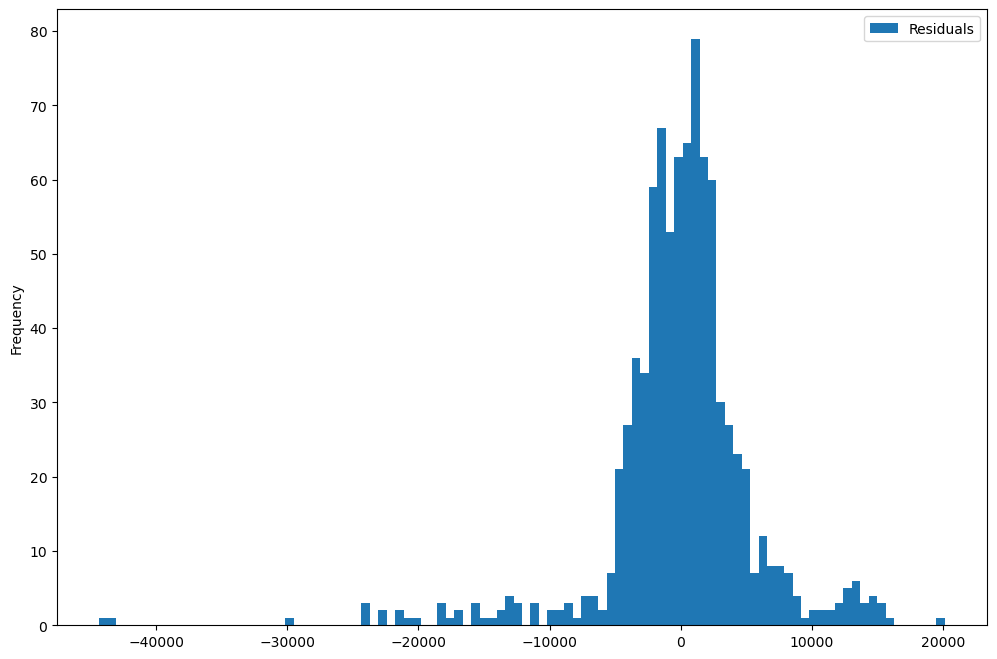

In [36]:
r_data3["Residuals"] = results2.resid
fig, ax = plt.subplots(figsize = (12,8))

r_data3[["Residuals"]].plot.hist(bins = 100, ax = ax)

#### 3. Plot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Then plot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Do we observe bias in the residuals when controlling for each variable? Why does this matter?

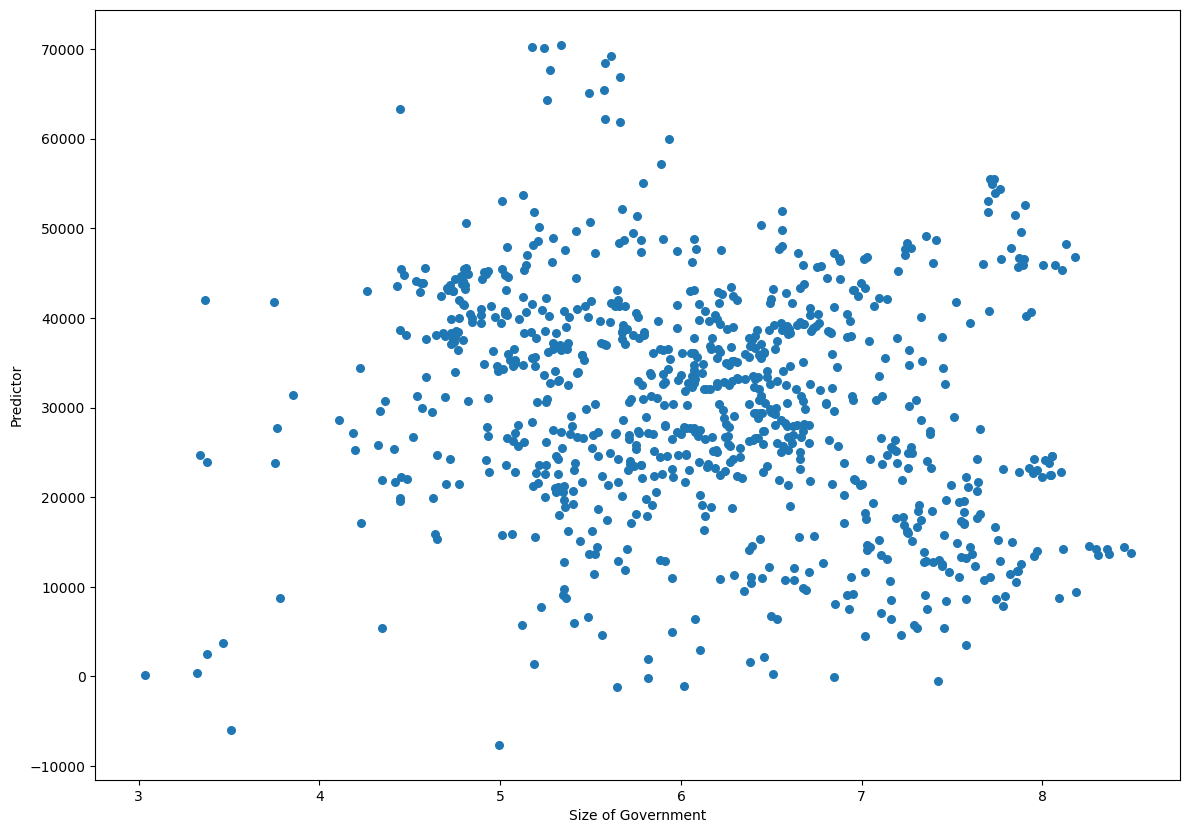

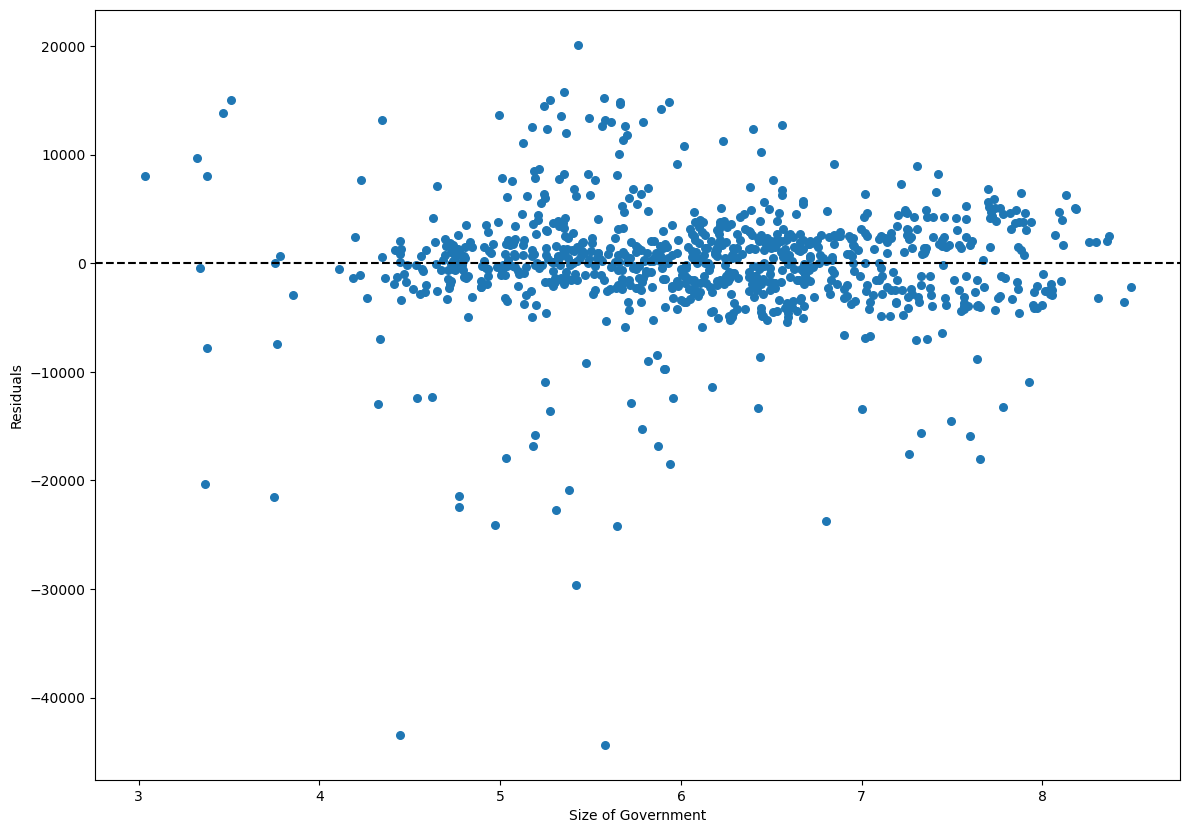

In [37]:
fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = "Size of Government",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = 'Size of Government',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

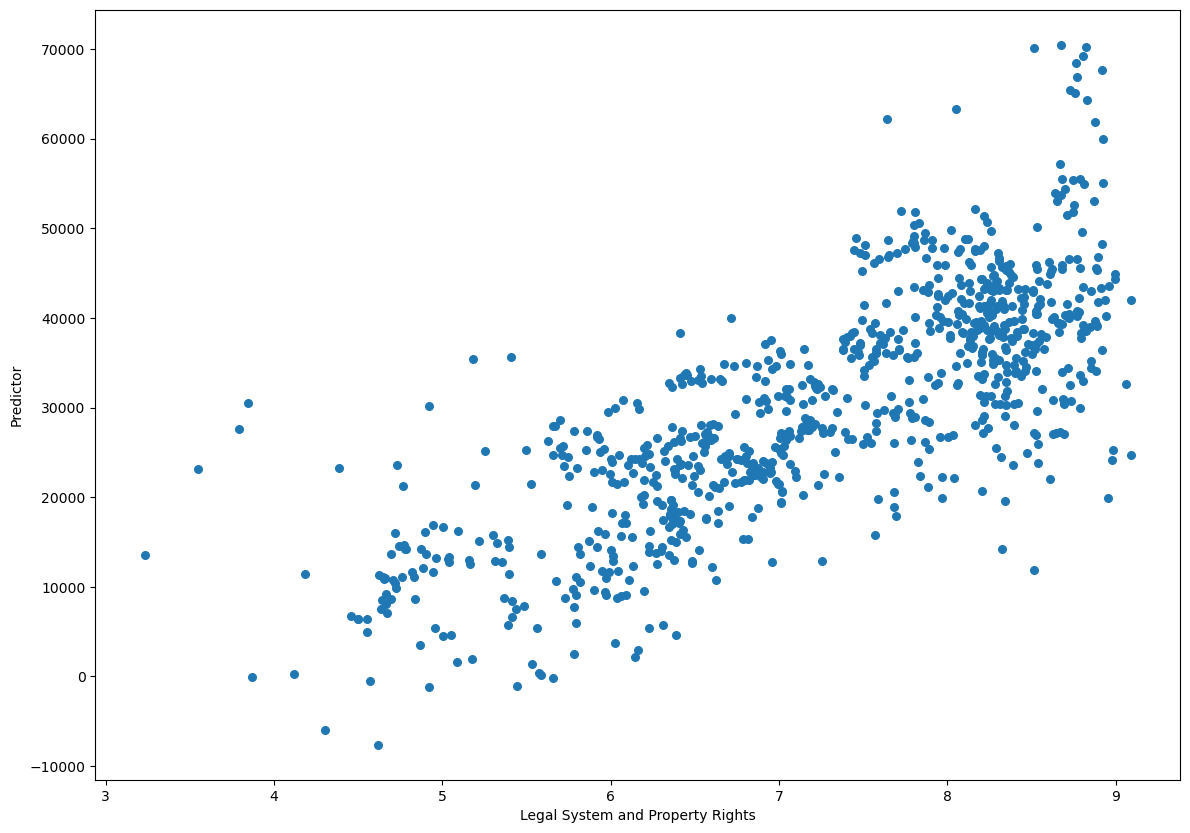

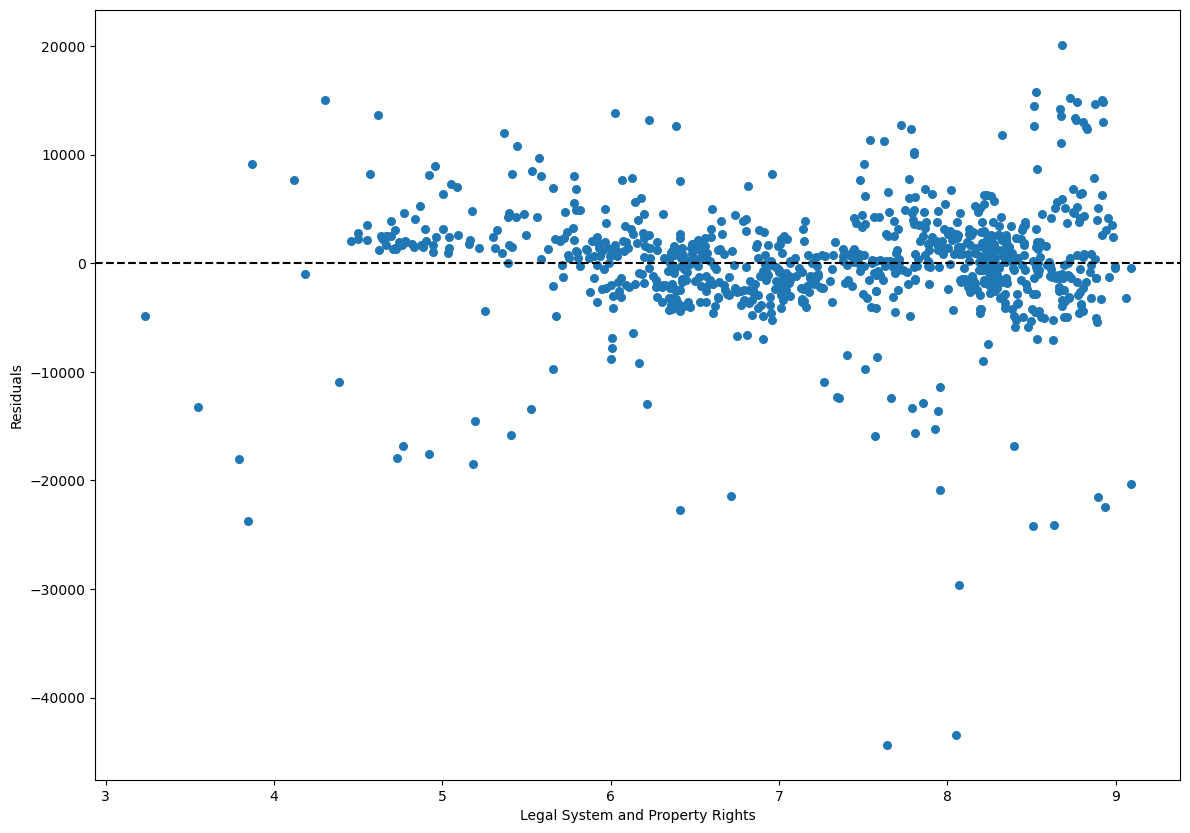

In [38]:
fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = "Legal System and Property Rights",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = 'Legal System and Property Rights',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

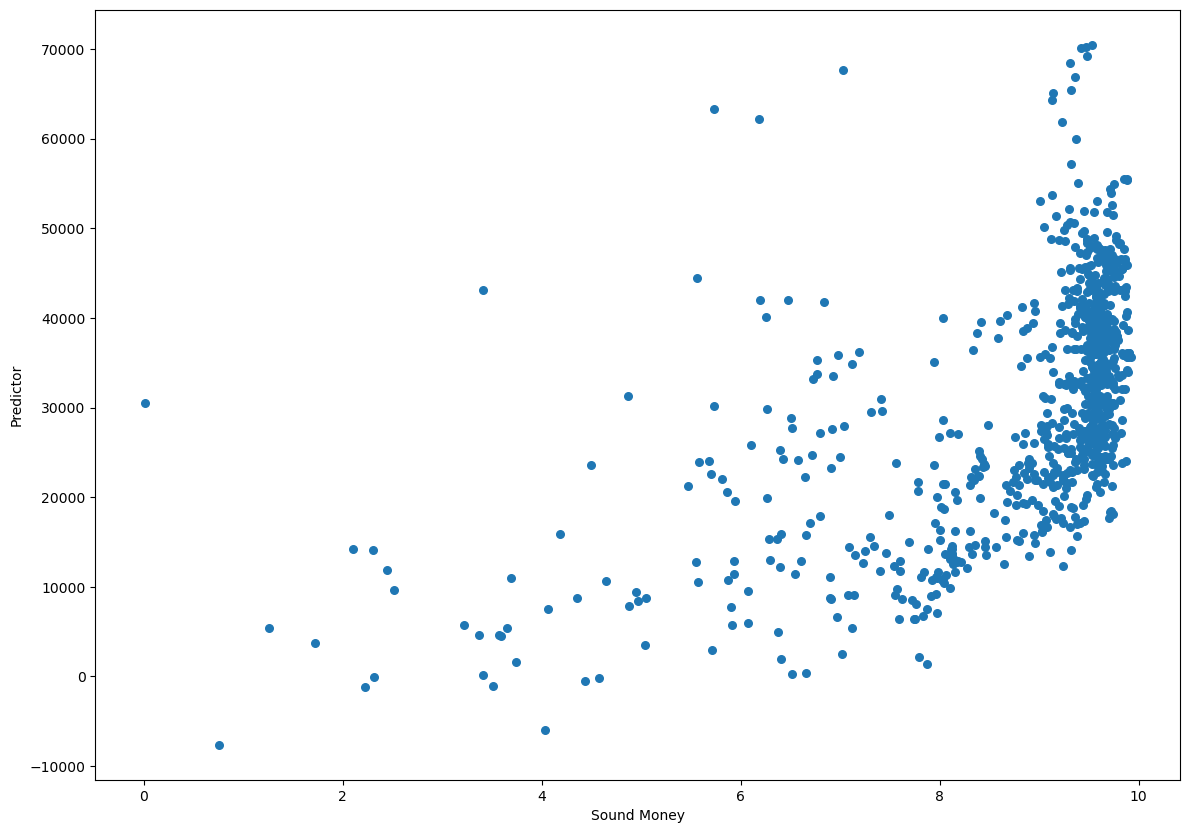

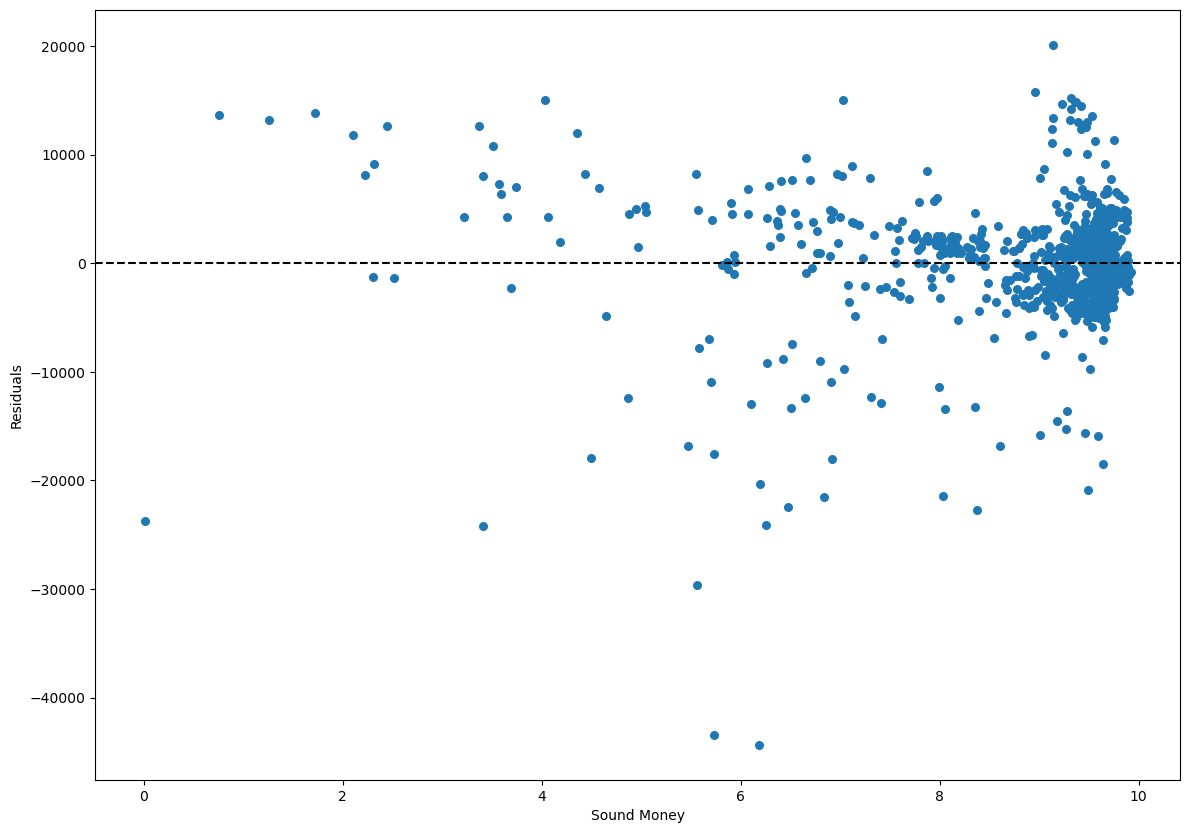

In [39]:
fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = "Sound Money",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x =  'Sound Money',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

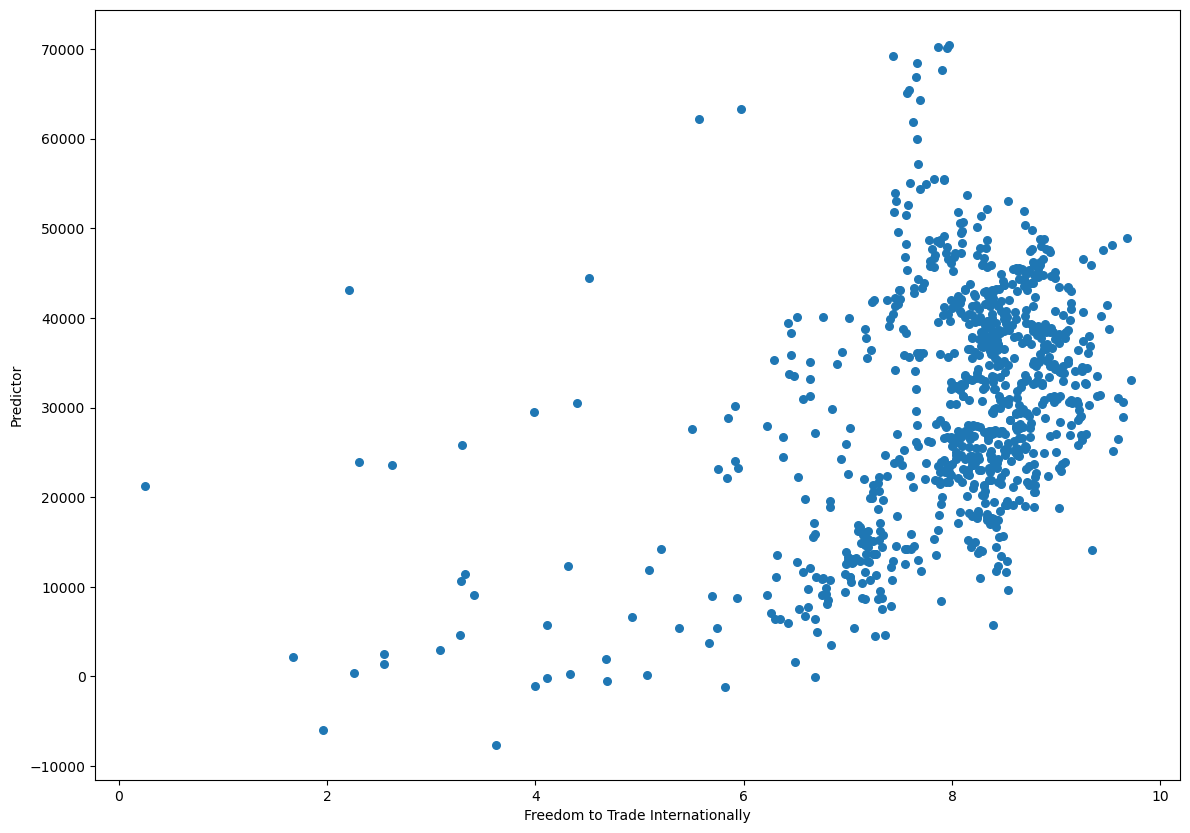

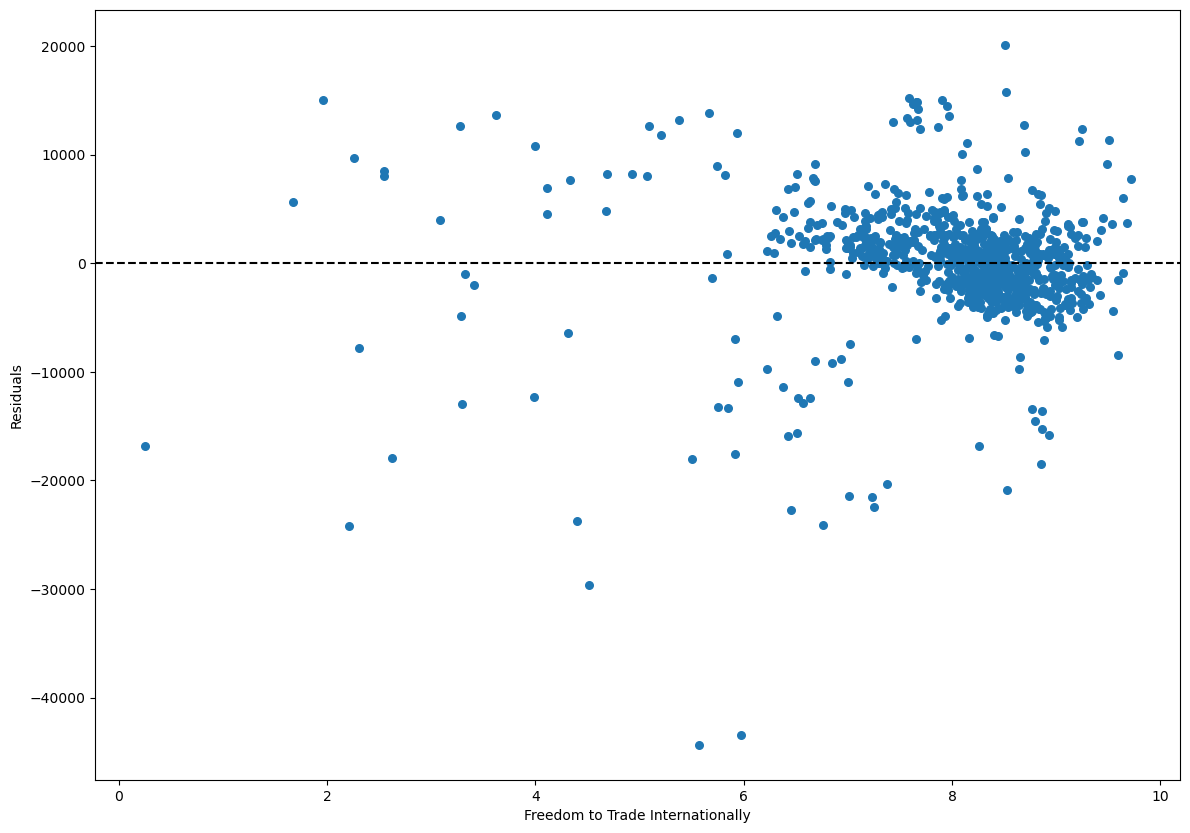

In [40]:
fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = "Freedom to Trade Internationally",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = 'Freedom to Trade Internationally',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

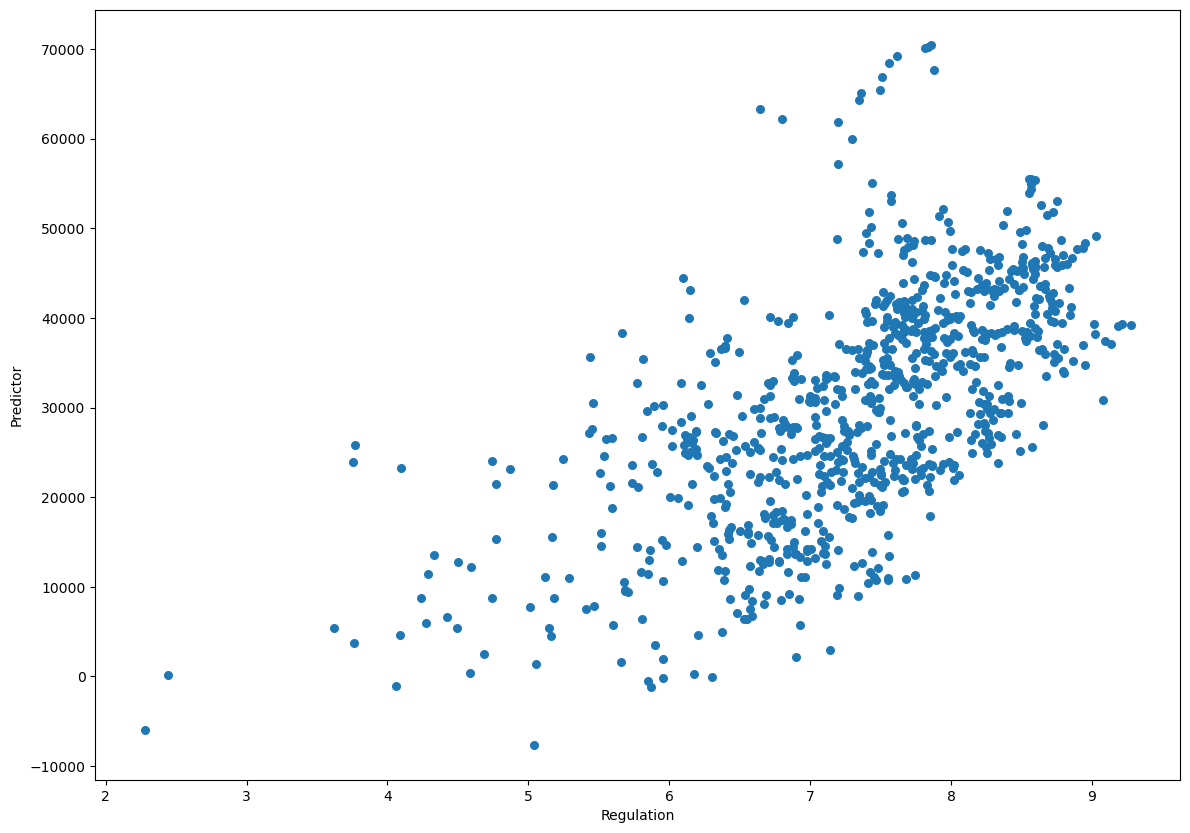

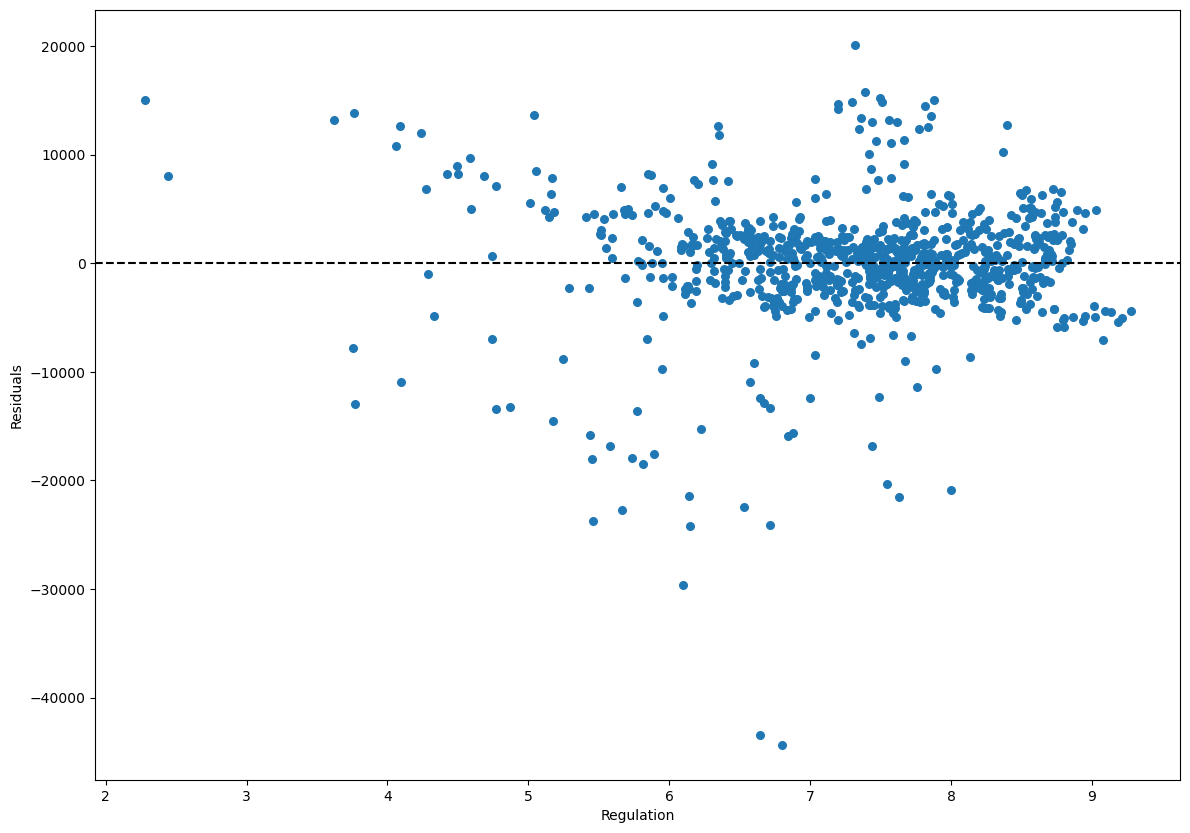

In [41]:
fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = "Regulation",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()


fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = 'Regulation',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

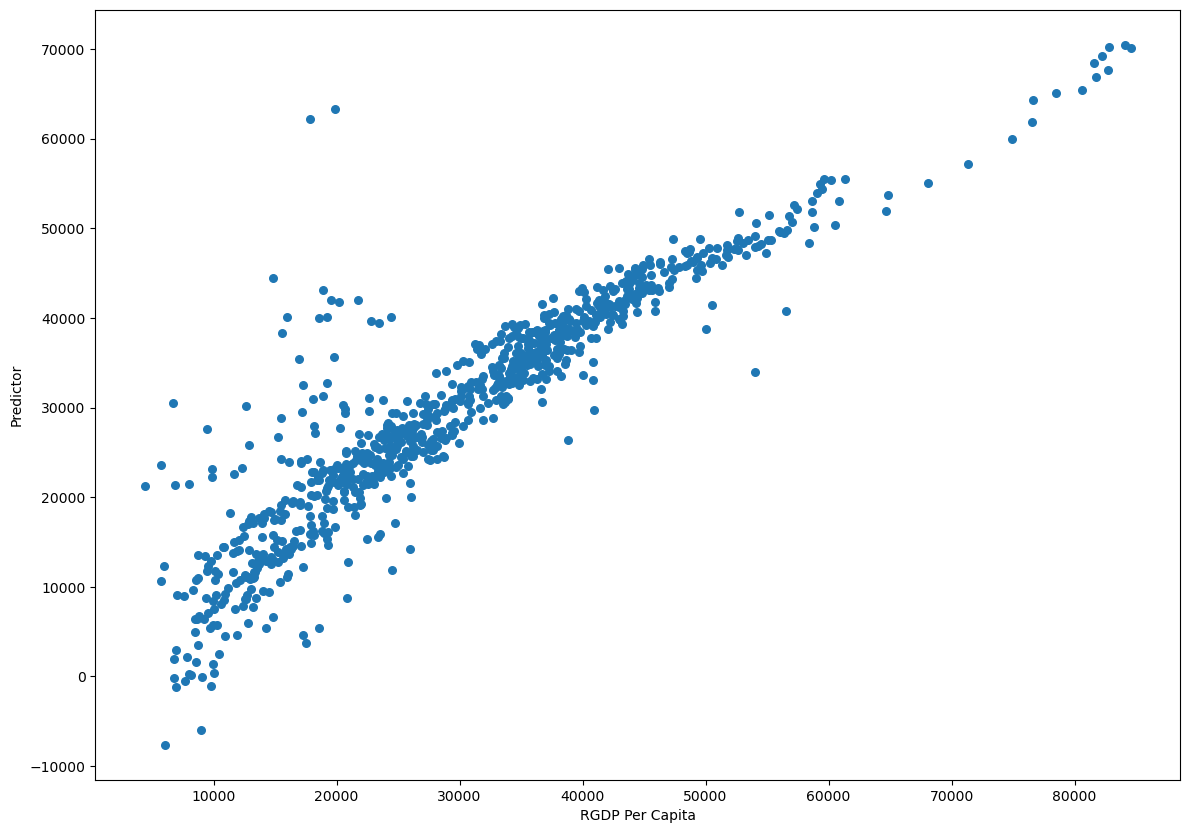

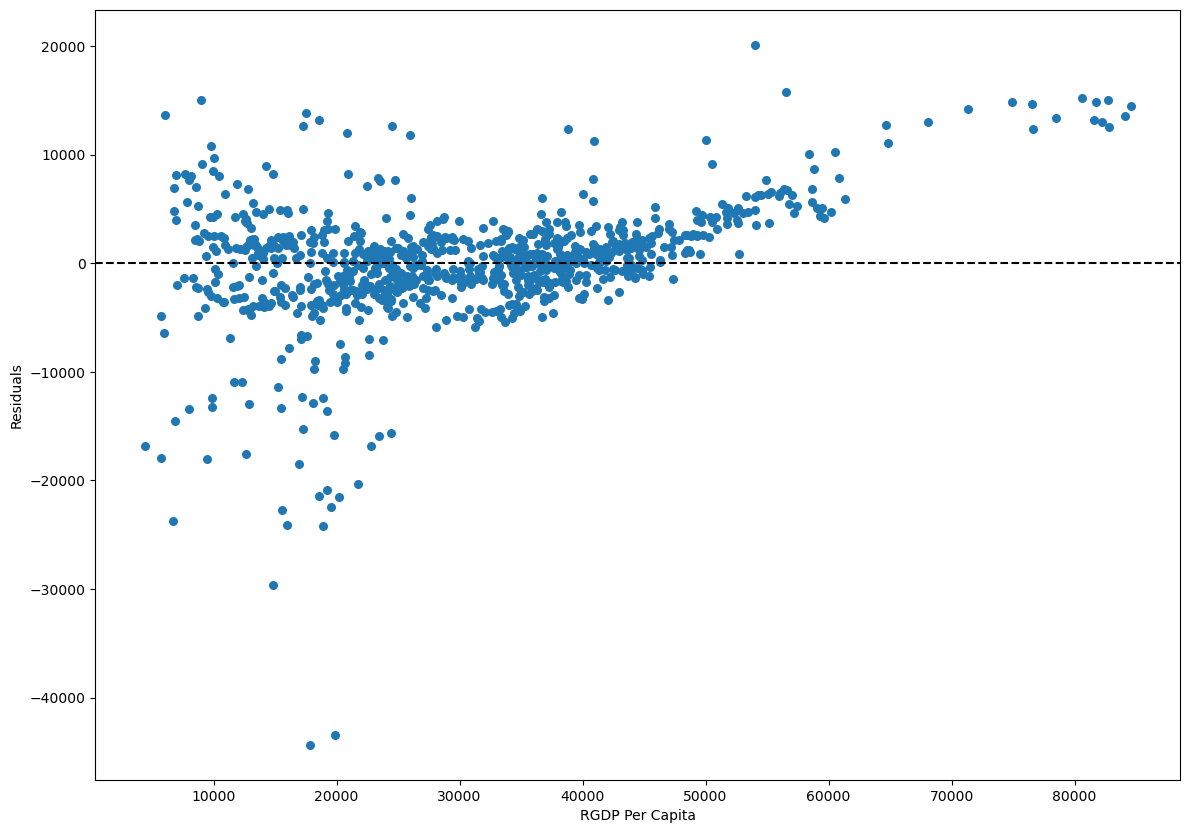

In [42]:
fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = "RGDP Per Capita",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data3.plot.scatter(x = 'RGDP Per Capita',
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.show()
plt.close()

#### 4. Plot the observed and predicted values of RGDP Per Capita for each individual country.

In [43]:
reg_vars4 = list(oecd_data1.keys())
del reg_vars4[4:5]
del reg_vars4[0]
del reg_vars4[1]
del reg_vars4[1]
del reg_vars4[2]

reg_vars4

['Year',
 'Countries',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [44]:
y_var4 = [reg_vars4[-1]]
x_vars4 = reg_vars4[:-1]
reg_data3 = oecd_data1[reg_vars4]
reg_data3.corr().round(2)
reg_data3

Year      Countries  Size of Government  \
245  1970-01-01      Australia            6.863768   
250  1975-01-01      Australia            6.255684   
255  1980-01-01      Australia            6.339449   
260  1985-01-01      Australia            6.259326   
265  1990-01-01      Australia            6.708215   
...         ...            ...                 ...   
7786 2014-01-01  United States            7.239681   
7787 2015-01-01  United States            7.237673   
7788 2016-01-01  United States            7.252009   
7789 2017-01-01  United States            7.354358   
7790 2018-01-01  United States            7.409095   

      Legal System and Property Rights  Sound Money  \
245                           7.775615     9.581113   
250                           8.034445     8.346907   
255                           8.037057     9.085686   
260                           8.540345     9.089736   
265                           8.398730     9.018318   
...                                ...          ...   
7786                          7.652463     9.737154   
7787                          7.745733     9.855788   
7788                          7.793107     9.814703   
7789                          7.802657     9.772320   
7790                          7.646530     9.772494   

      Freedom to Trade Internationally  Regulation  RGDP Per Capita  
245                           5.882101    6.335298       19166.0000  
250                           5.692162    6.761980       20993.0000  
255                           5.841104    7.389934       22972.0000  
260                           6.985368    7.469774       24927.0000  
265                           7.661409    7.750886       27373.0000  
...                                ...         ...              ...  
7786                          7.836022    8.792114       51664.0000  
7787                          7.810632    8.891698       52591.0000  
7788                          7.889129    8.952382       53015.0000  
7789                          7.921225    9.031901       54007.7698  
7790                          7.783384    8.784245       55334.7394  

[900 rows x 8 columns]

In [45]:
reg_data4 = reg_data3.set_index(["Countries", "Year"])
reg_data4

Size of Government  \
Countries     Year                             
Australia     1970-01-01            6.863768   
              1975-01-01            6.255684   
              1980-01-01            6.339449   
              1985-01-01            6.259326   
              1990-01-01            6.708215   
...                                      ...   
United States 2014-01-01            7.239681   
              2015-01-01            7.237673   
              2016-01-01            7.252009   
              2017-01-01            7.354358   
              2018-01-01            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia     1970-01-01                          7.775615     9.581113   
              1975-01-01                          8.034445     8.346907   
              1980-01-01                          8.037057     9.085686   
              1985-01-01                          8.540345     9.089736   
              1990-01-01                          8.398730     9.018318   
...                                                    ...          ...   
United States 2014-01-01                          7.652463     9.737154   
              2015-01-01                          7.745733     9.855788   
              2016-01-01                          7.793107     9.814703   
              2017-01-01                          7.802657     9.772320   
              2018-01-01                          7.646530     9.772494   

                          Freedom to Trade Internationally  Regulation  \
Countries     Year                                                       
Australia     1970-01-01                          5.882101    6.335298   
              1975-01-01                          5.692162    6.761980   
              1980-01-01                          5.841104    7.389934   
              1985-01-01                          6.985368    7.469774   
              1990-01-01                          7.661409    7.750886   
...                                                    ...         ...   
United States 2014-01-01                          7.836022    8.792114   
              2015-01-01                          7.810632    8.891698   
              2016-01-01                          7.889129    8.952382   
              2017-01-01                          7.921225    9.031901   
              2018-01-01                          7.783384    8.784245   

                          RGDP Per Capita  
Countries     Year                         
Australia     1970-01-01       19166.0000  
              1975-01-01       20993.0000  
              1980-01-01       22972.0000  
              1985-01-01       24927.0000  
              1990-01-01       27373.0000  
...                                   ...  
United States 2014-01-01       51664.0000  
              2015-01-01       52591.0000  
              2016-01-01       53015.0000  
              2017-01-01       54007.7698  
              2018-01-01       55334.7394  

[900 rows x 6 columns]

In [46]:
r_df3 = reg_data3.dropna(axis = 0, how = "any")
y = r_df3["RGDP Per Capita"]
X = r_df3[x_vars[0:5]]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df3["Predictor"] = results.predict()

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/3939723704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/3939723704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df3["Predictor"] = results.predict()


In [47]:
r_df4 = r_df3.set_index(["Countries", "Year"])
r_df4

Size of Government  \
Countries     Year                             
Australia     1970-01-01            6.863768   
              1975-01-01            6.255684   
              1980-01-01            6.339449   
              1985-01-01            6.259326   
              1990-01-01            6.708215   
...                                      ...   
United States 2014-01-01            7.239681   
              2015-01-01            7.237673   
              2016-01-01            7.252009   
              2017-01-01            7.354358   
              2018-01-01            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia     1970-01-01                          7.775615     9.581113   
              1975-01-01                          8.034445     8.346907   
              1980-01-01                          8.037057     9.085686   
              1985-01-01                          8.540345     9.089736   
              1990-01-01                          8.398730     9.018318   
...                                                    ...          ...   
United States 2014-01-01                          7.652463     9.737154   
              2015-01-01                          7.745733     9.855788   
              2016-01-01                          7.793107     9.814703   
              2017-01-01                          7.802657     9.772320   
              2018-01-01                          7.646530     9.772494   

                          Freedom to Trade Internationally  Regulation  \
Countries     Year                                                       
Australia     1970-01-01                          5.882101    6.335298   
              1975-01-01                          5.692162    6.761980   
              1980-01-01                          5.841104    7.389934   
              1985-01-01                          6.985368    7.469774   
              1990-01-01                          7.661409    7.750886   
...                                                    ...         ...   
United States 2014-01-01                          7.836022    8.792114   
              2015-01-01                          7.810632    8.891698   
              2016-01-01                          7.889129    8.952382   
              2017-01-01                          7.921225    9.031901   
              2018-01-01                          7.783384    8.784245   

                          RGDP Per Capita     Predictor  
Countries     Year                                       
Australia     1970-01-01       19166.0000  33944.825400  
              1975-01-01       20993.0000  34376.323308  
              1980-01-01       22972.0000  37311.653449  
              1985-01-01       24927.0000  39734.632681  
              1990-01-01       27373.0000  38452.056695  
...                                   ...           ...  
United States 2014-01-01       51664.0000  37335.064068  
              2015-01-01       52591.0000  38421.861297  
              2016-01-01       53015.0000  38683.999293  
              2017-01-01       54007.7698  38720.254260  
              2018-01-01       55334.7394  37263.031399  

[869 rows x 7 columns]

In [48]:
countries = r_df4.groupby("Countries").mean().index
plot_data4 = r_df4[y_var4 + ["Predictor"]]
for key in plot_data4:
    plot_data4[key] = plot_data4[key] + 1

plot_data4

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_39356/1304611091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data4[key] = plot_data4[key] + 1


RGDP Per Capita     Predictor
Countries     Year                                     
Australia     1970-01-01       19167.0000  33945.825400
              1975-01-01       20994.0000  34377.323308
              1980-01-01       22973.0000  37312.653449
              1985-01-01       24928.0000  39735.632681
              1990-01-01       27374.0000  38453.056695
...                                   ...           ...
United States 2014-01-01       51665.0000  37336.064068
              2015-01-01       52592.0000  38422.861297
              2016-01-01       53016.0000  38684.999293
              2017-01-01       54008.7698  38721.254260
              2018-01-01       55335.7394  37264.031399

[869 rows x 2 columns]

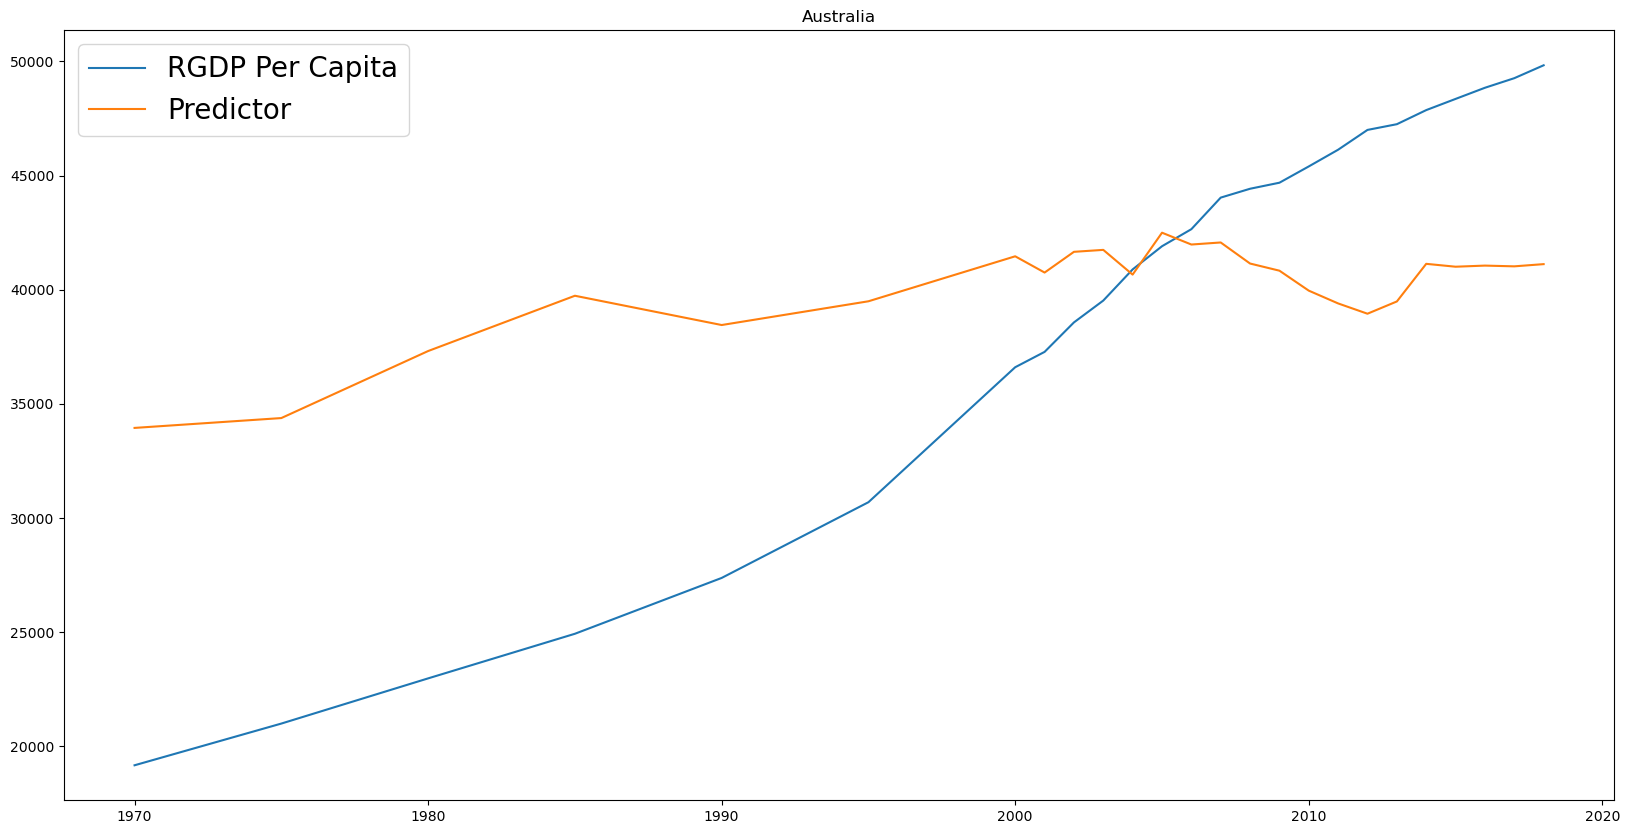

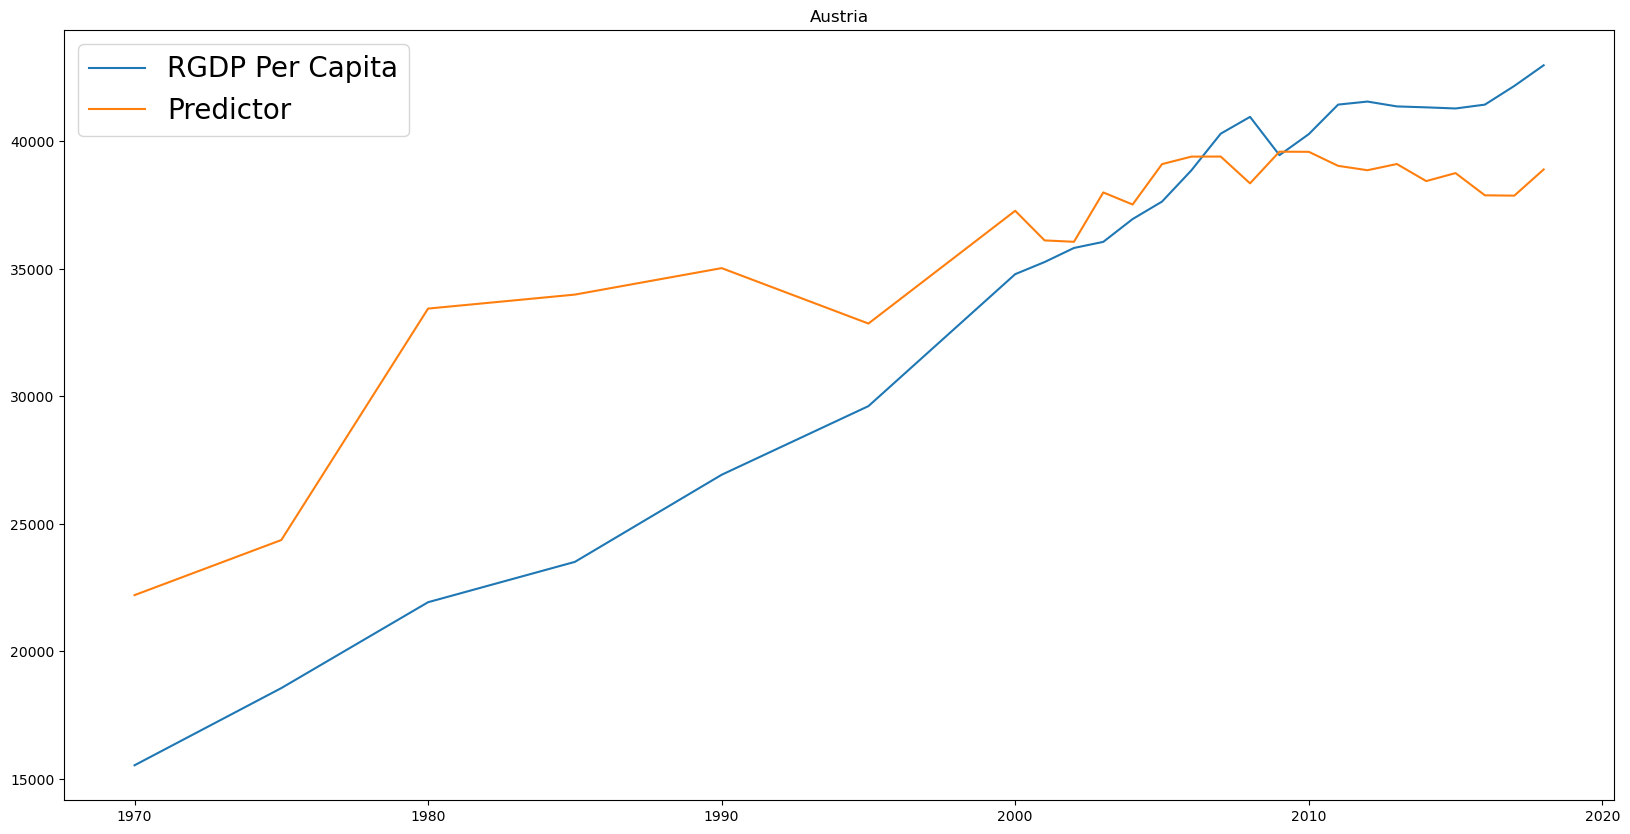

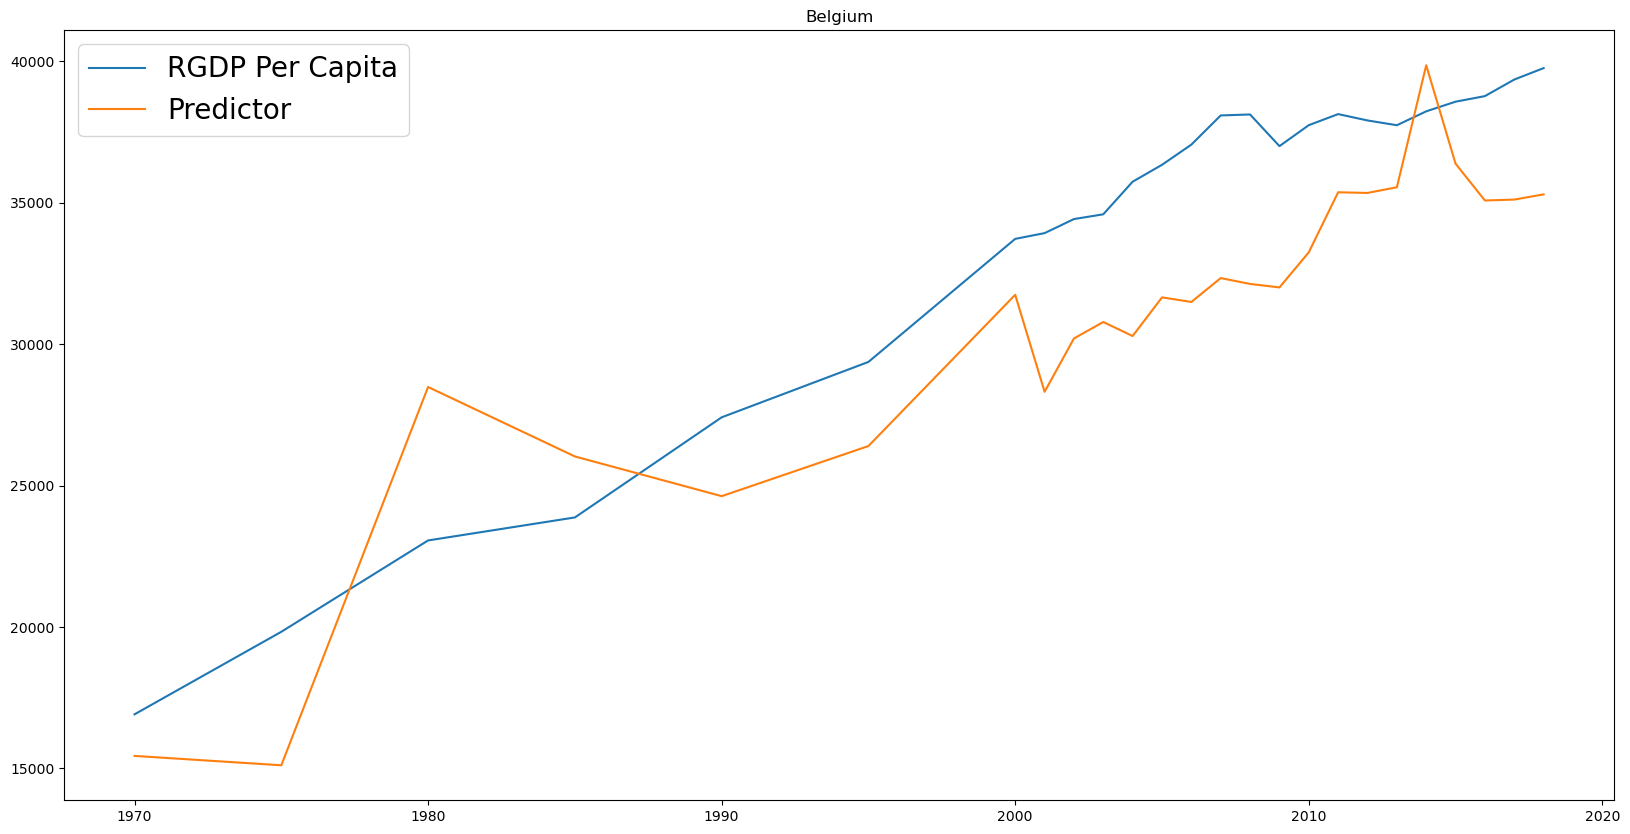

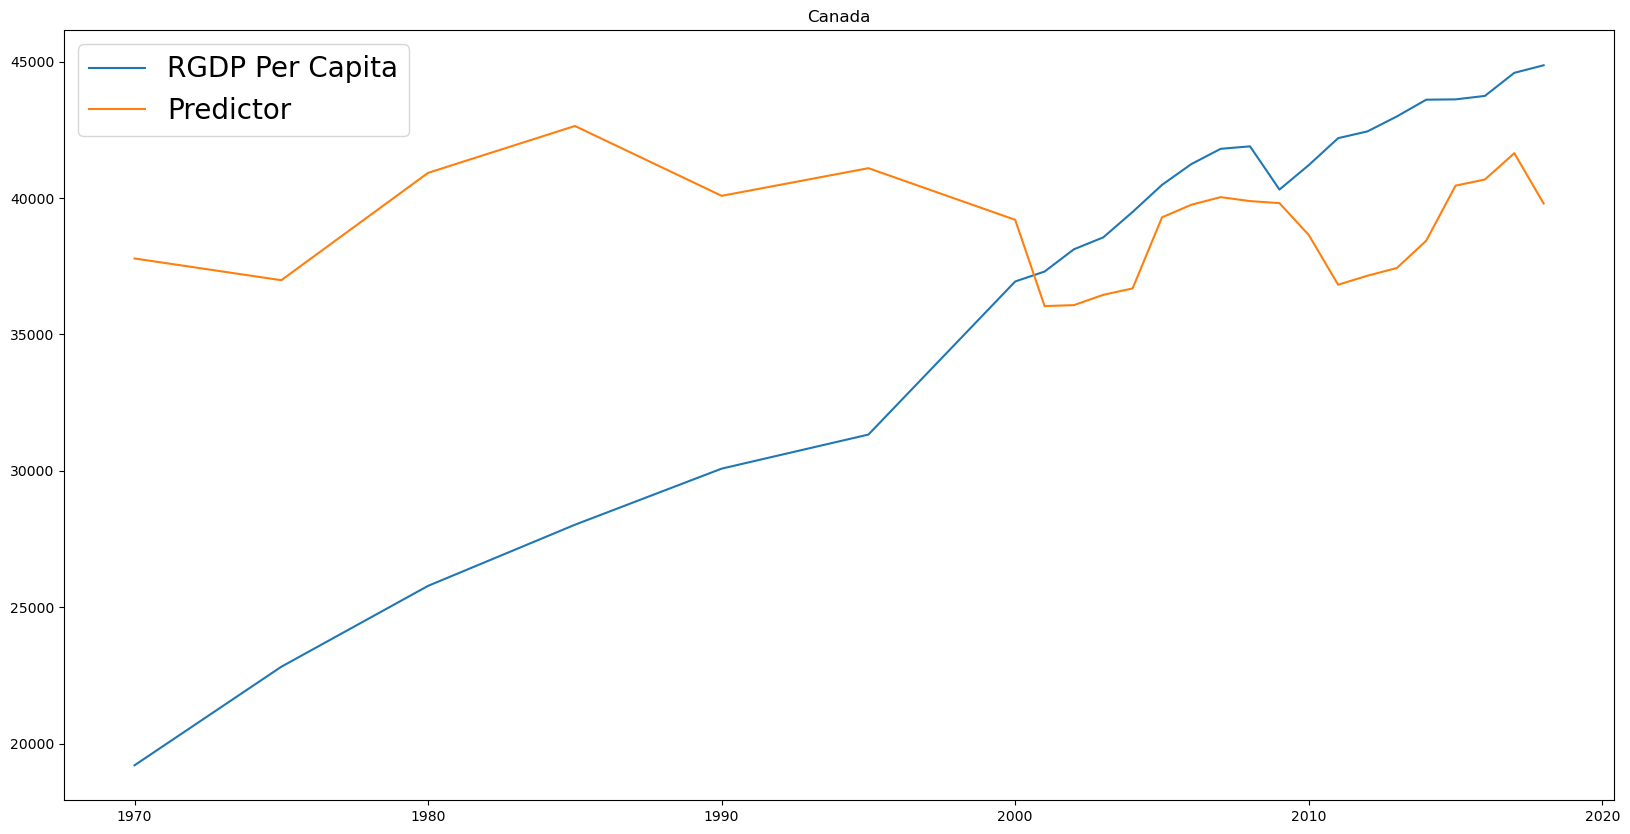

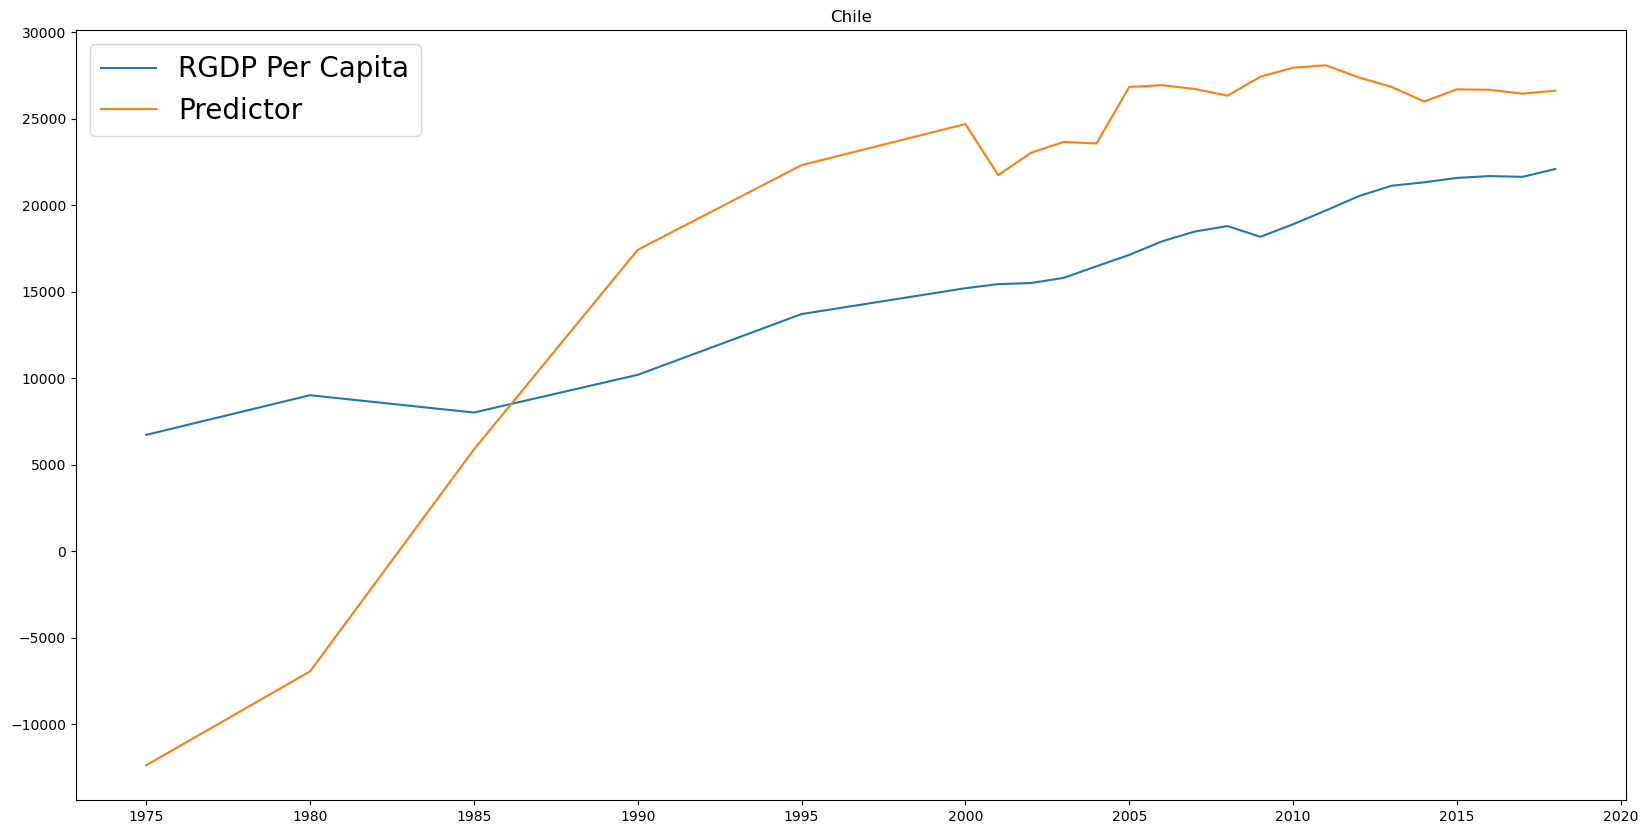

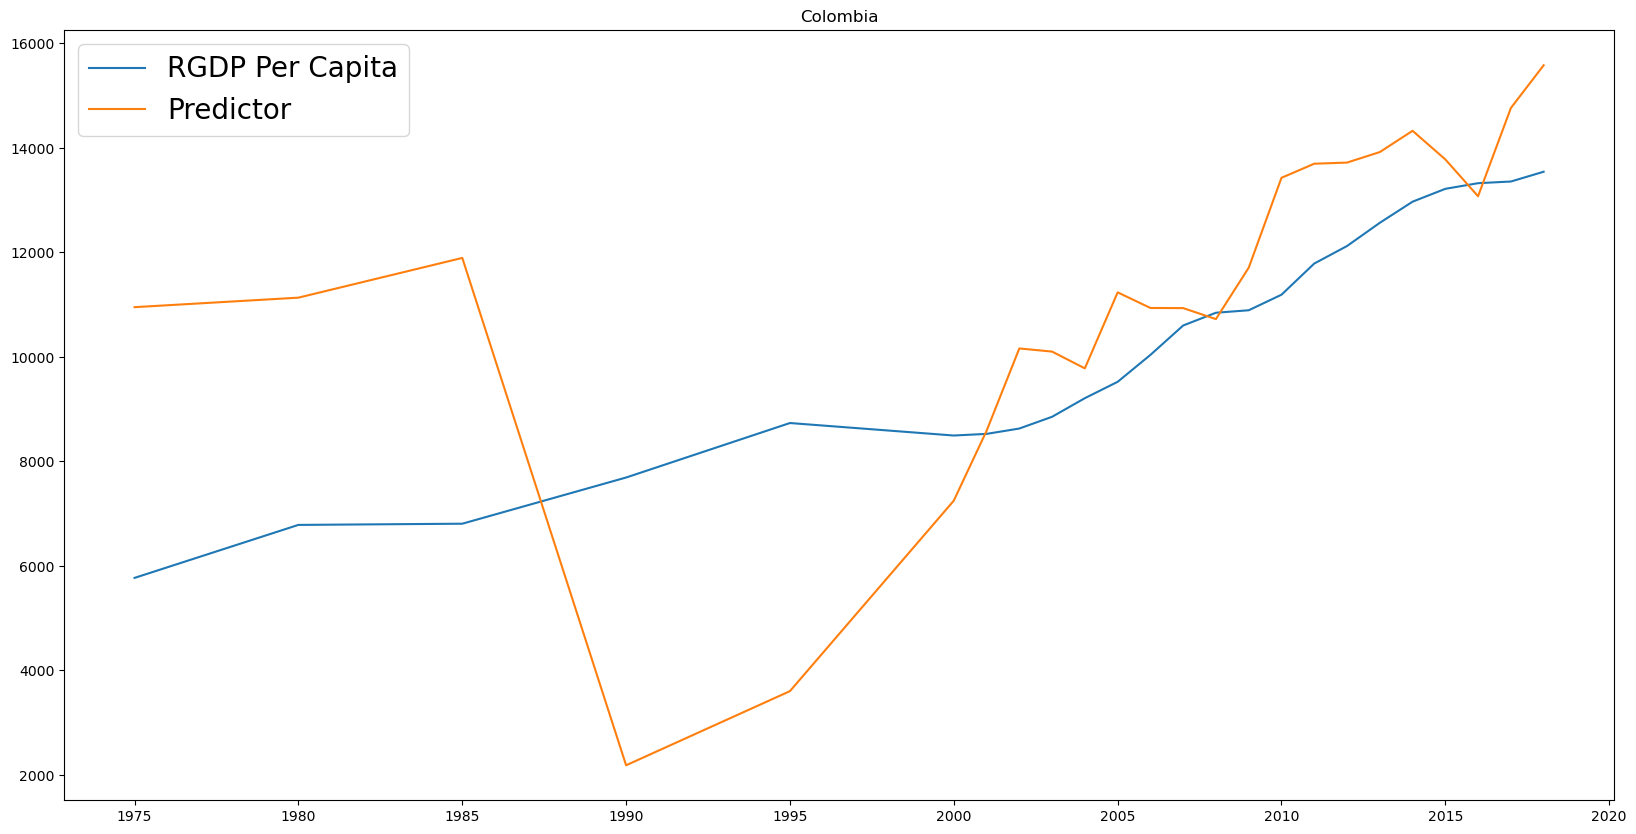

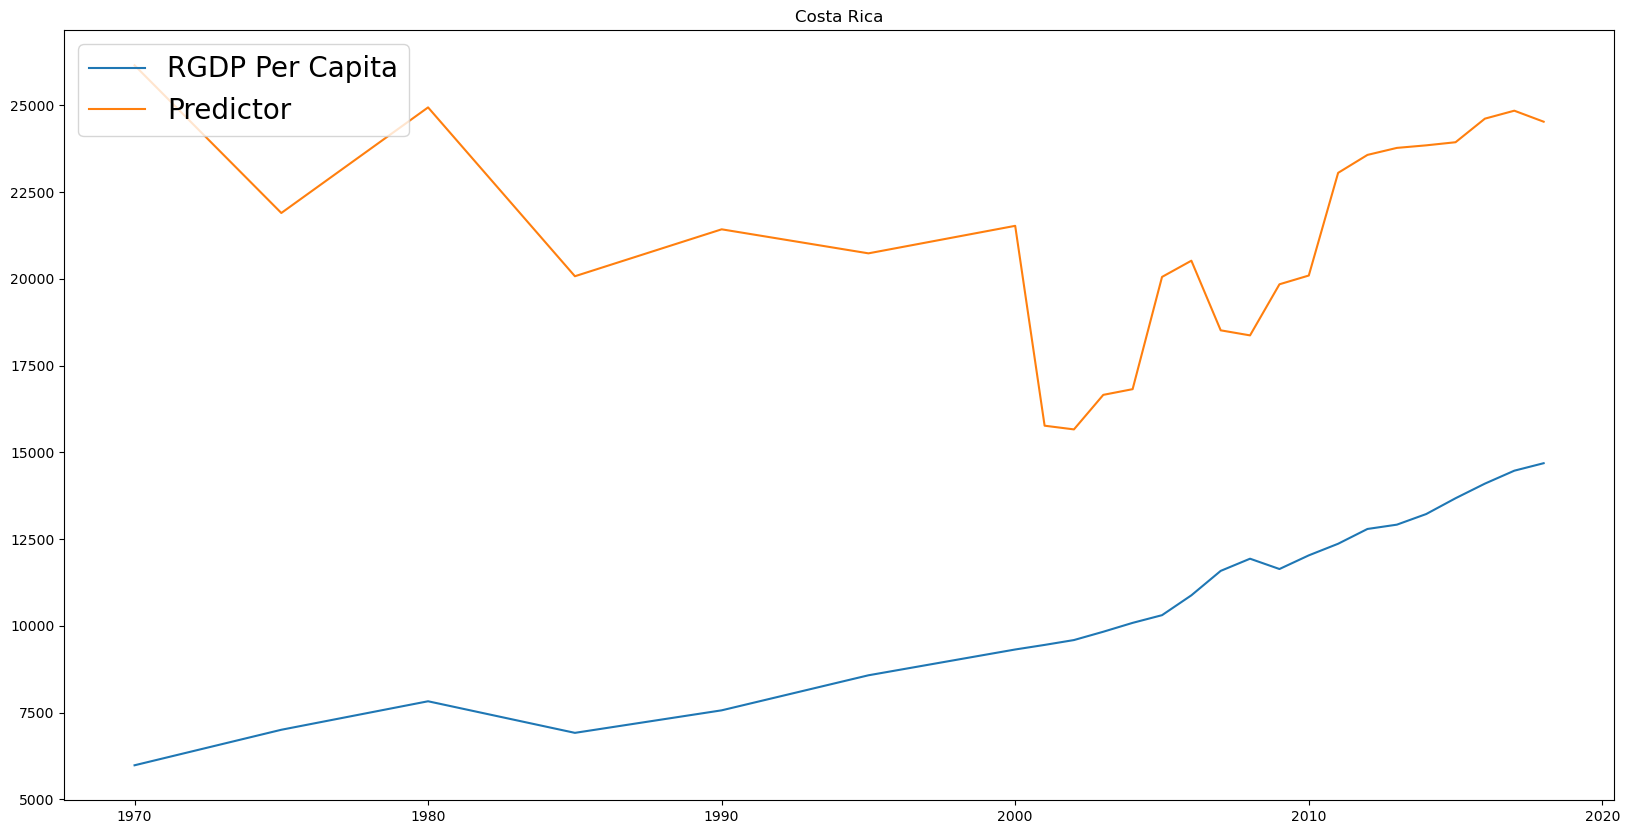

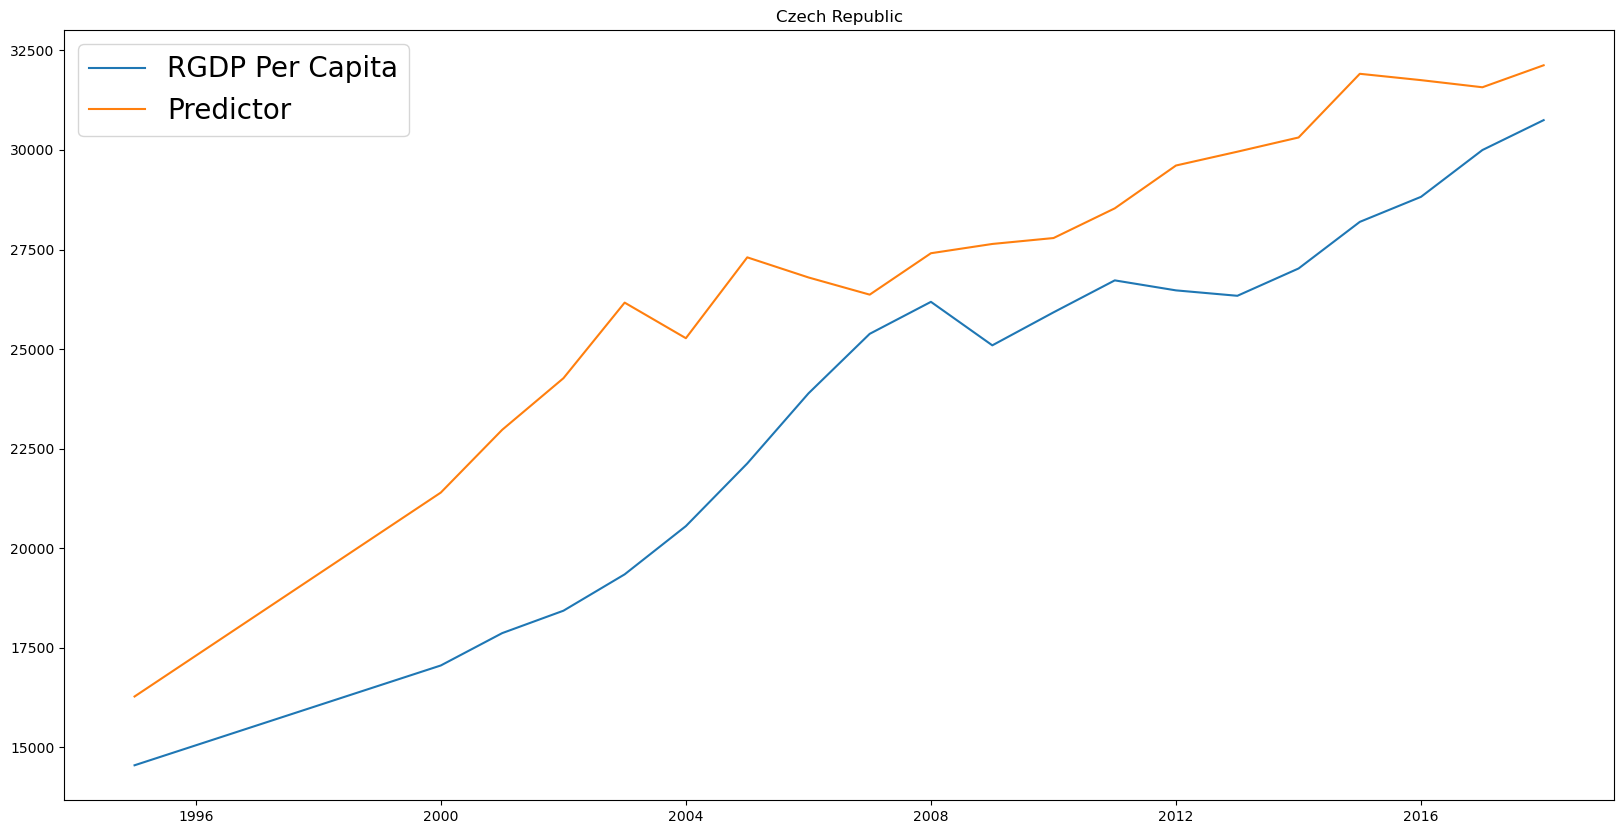

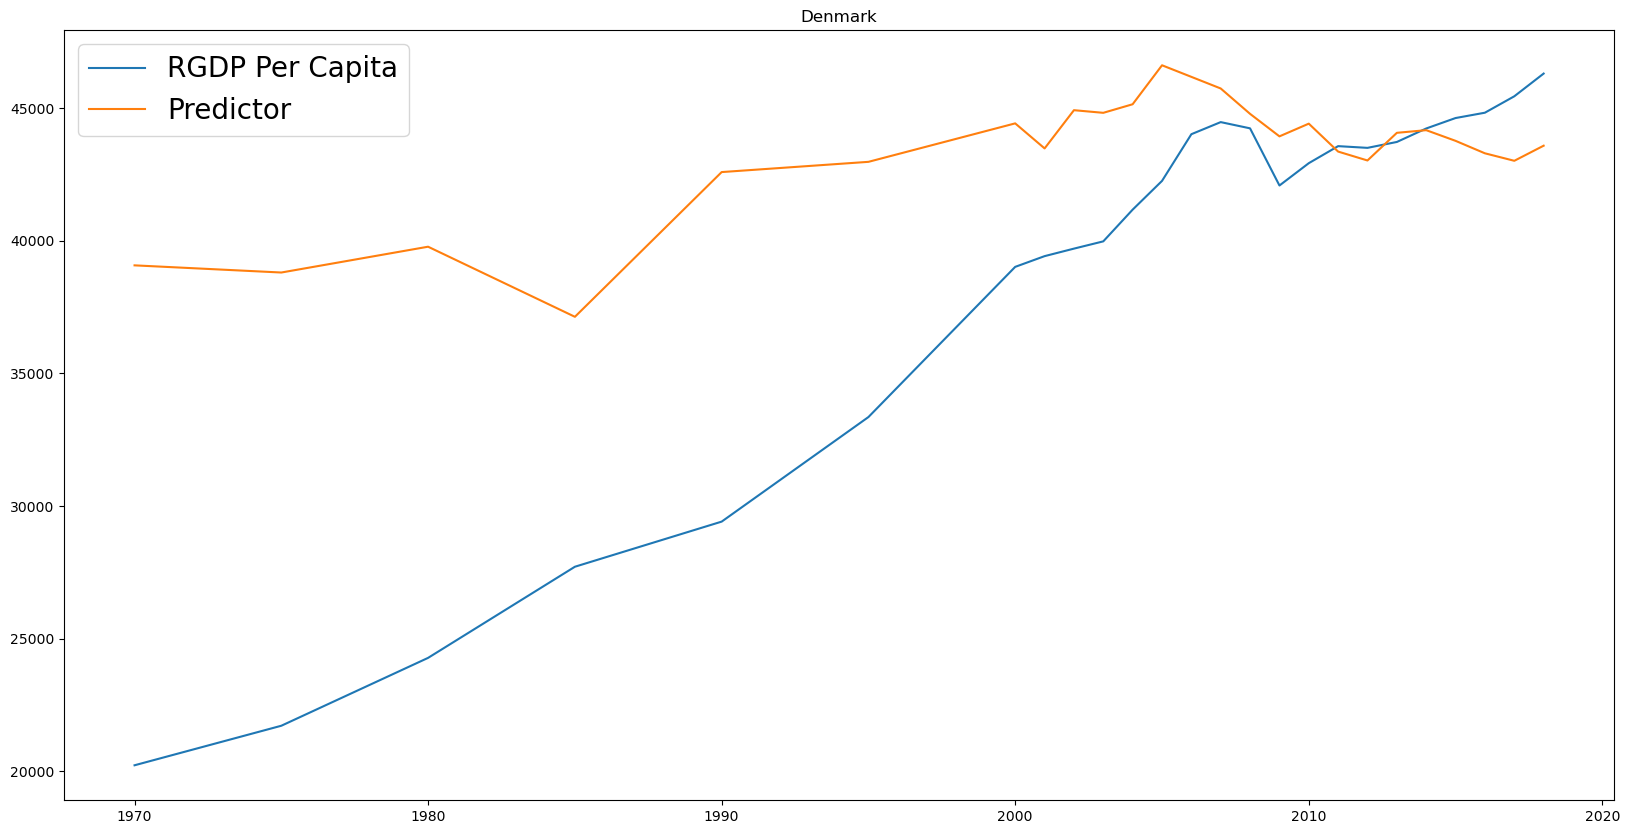

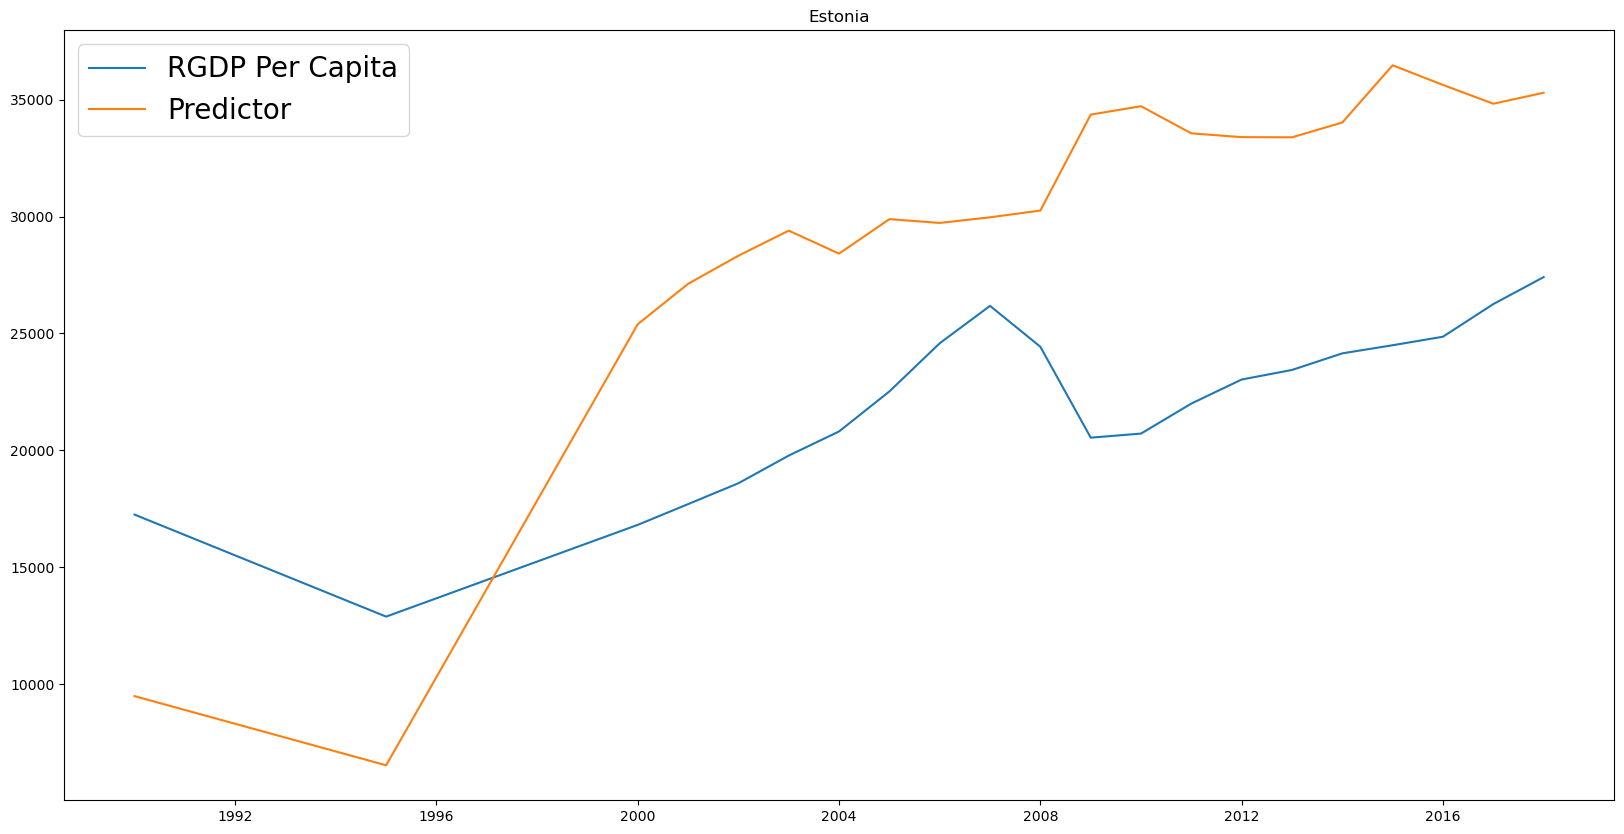

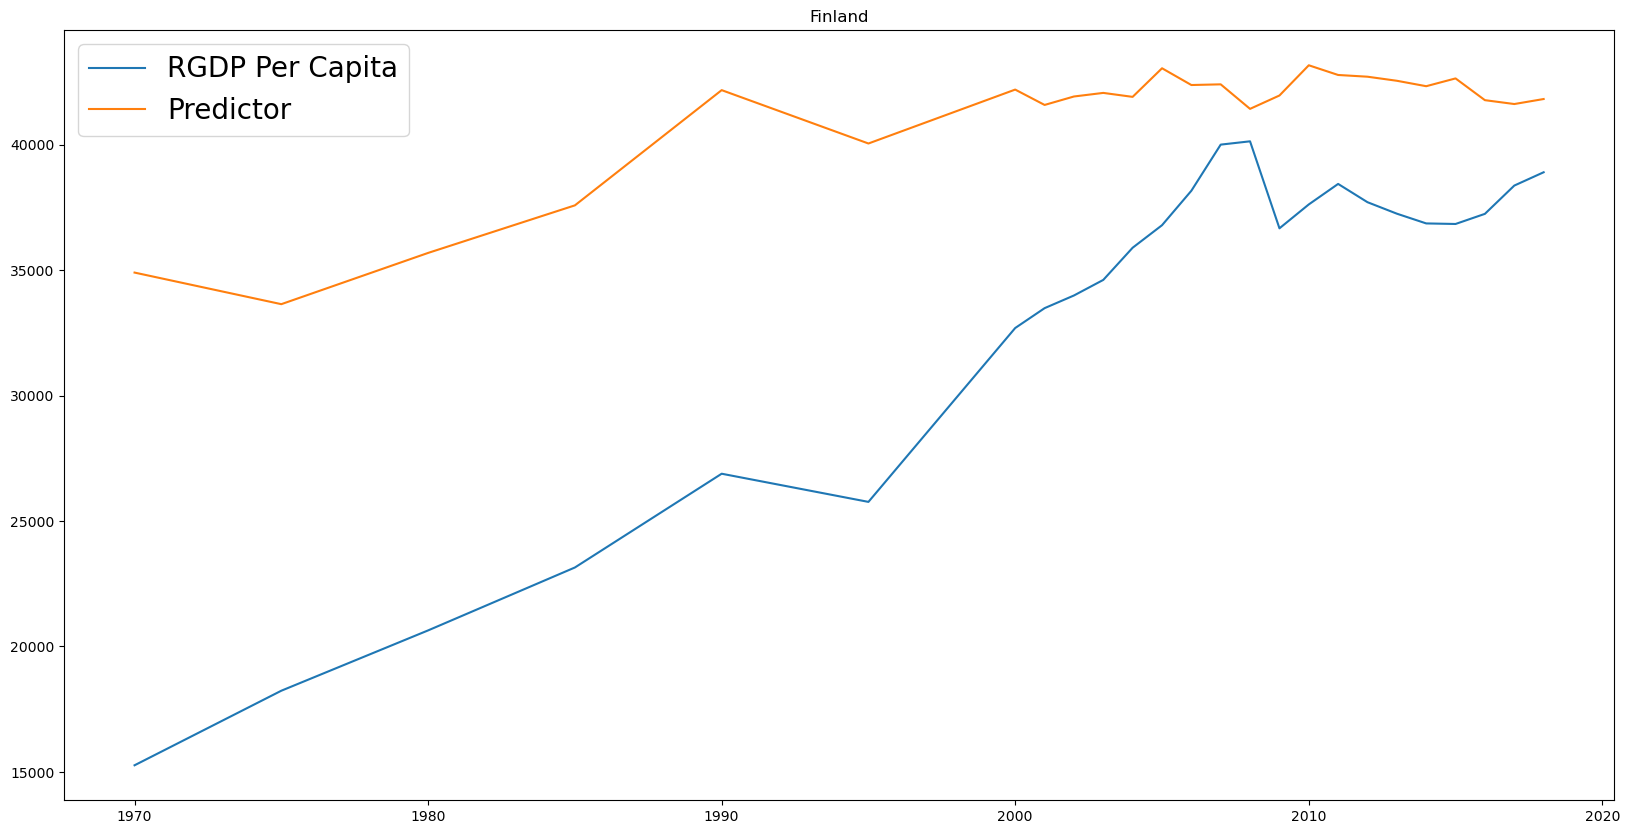

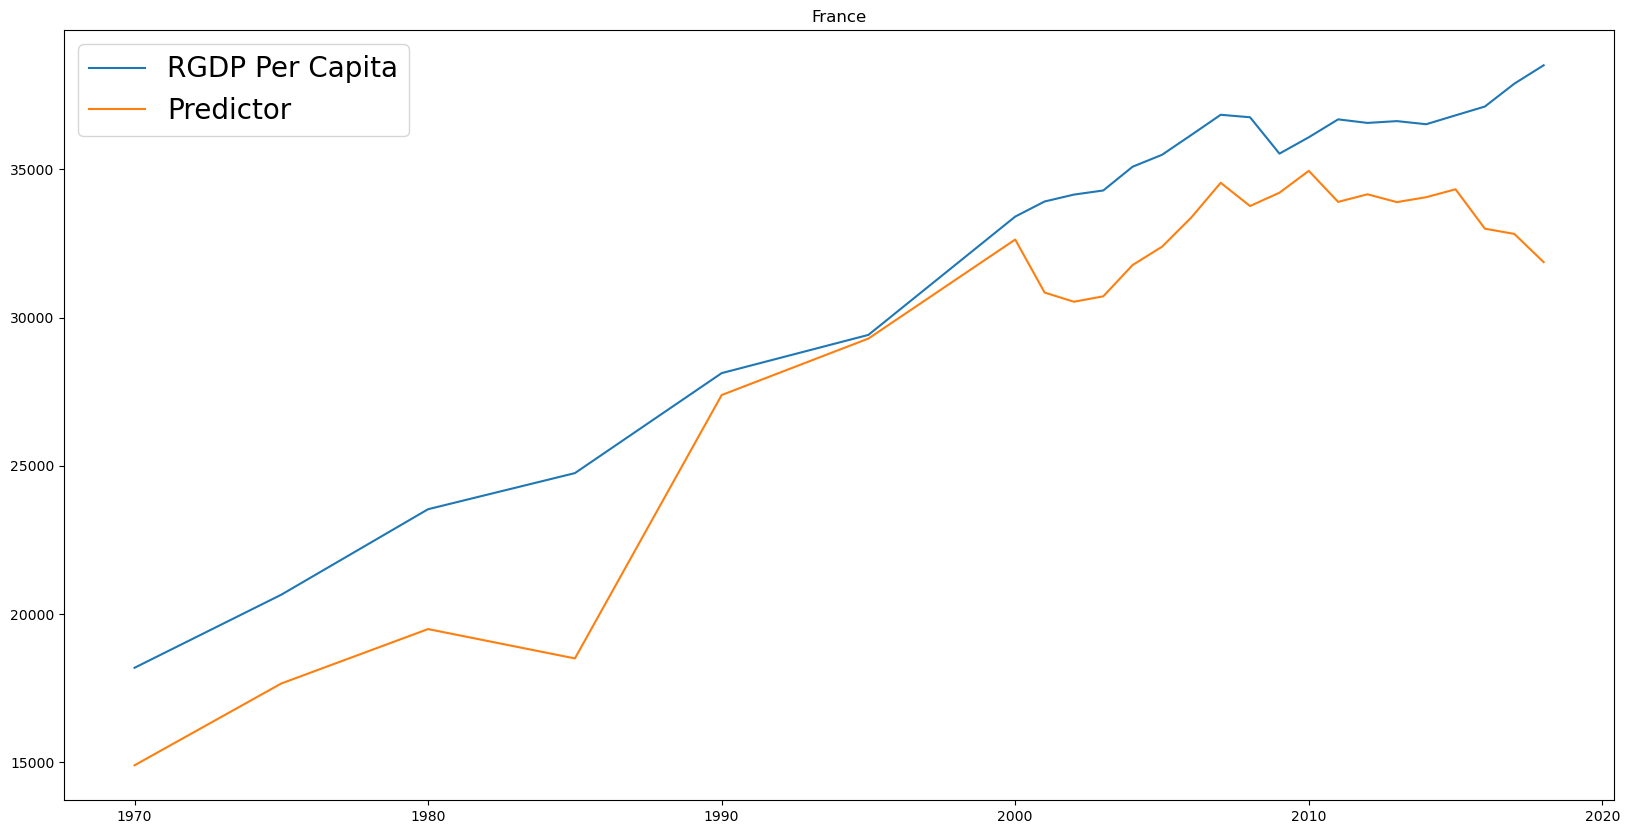

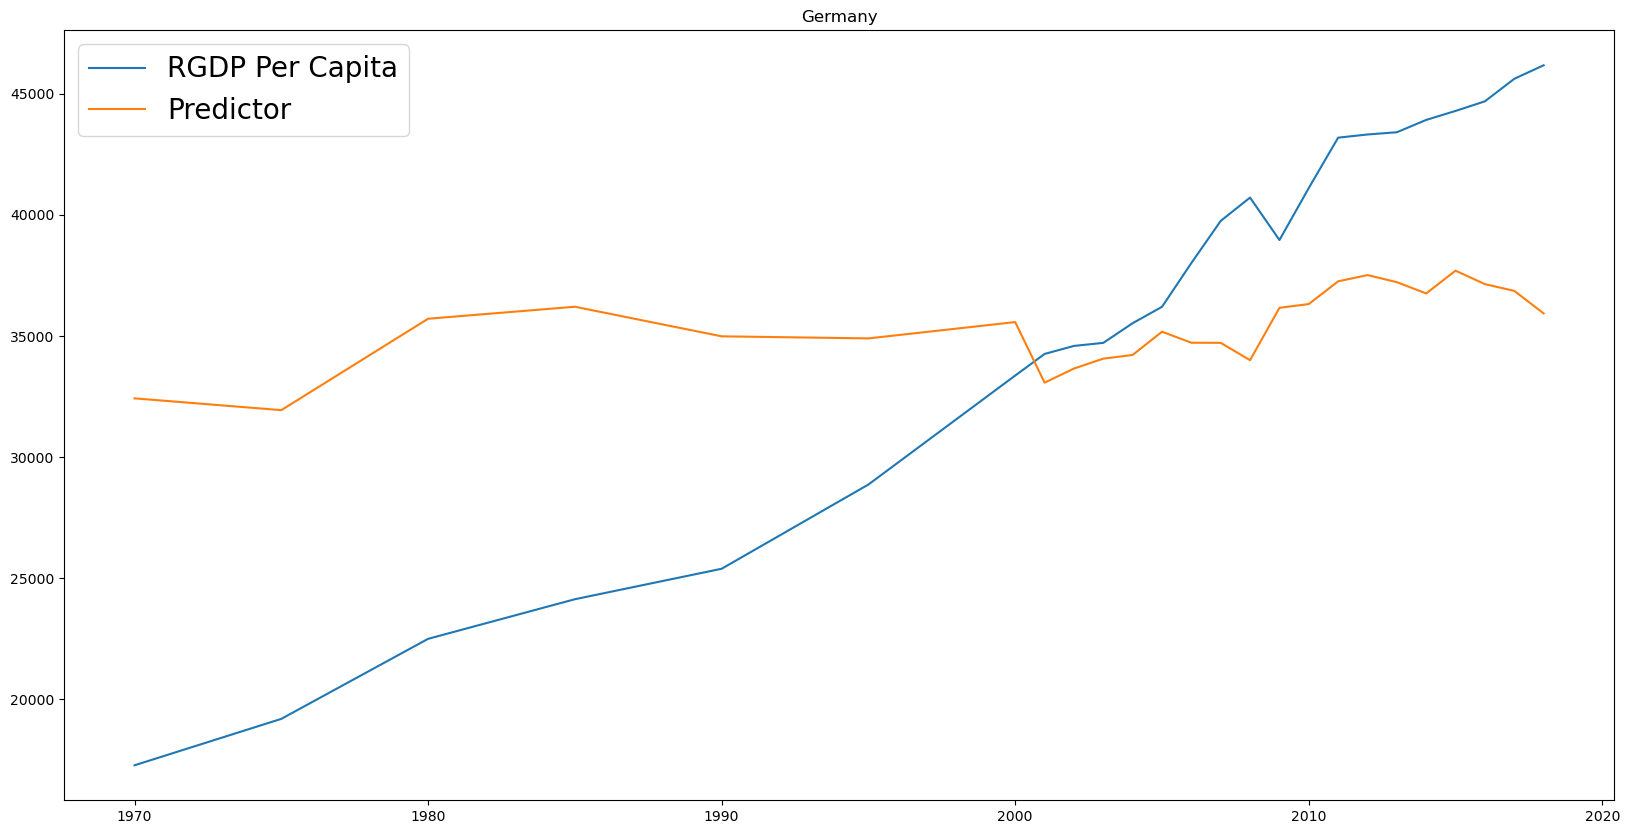

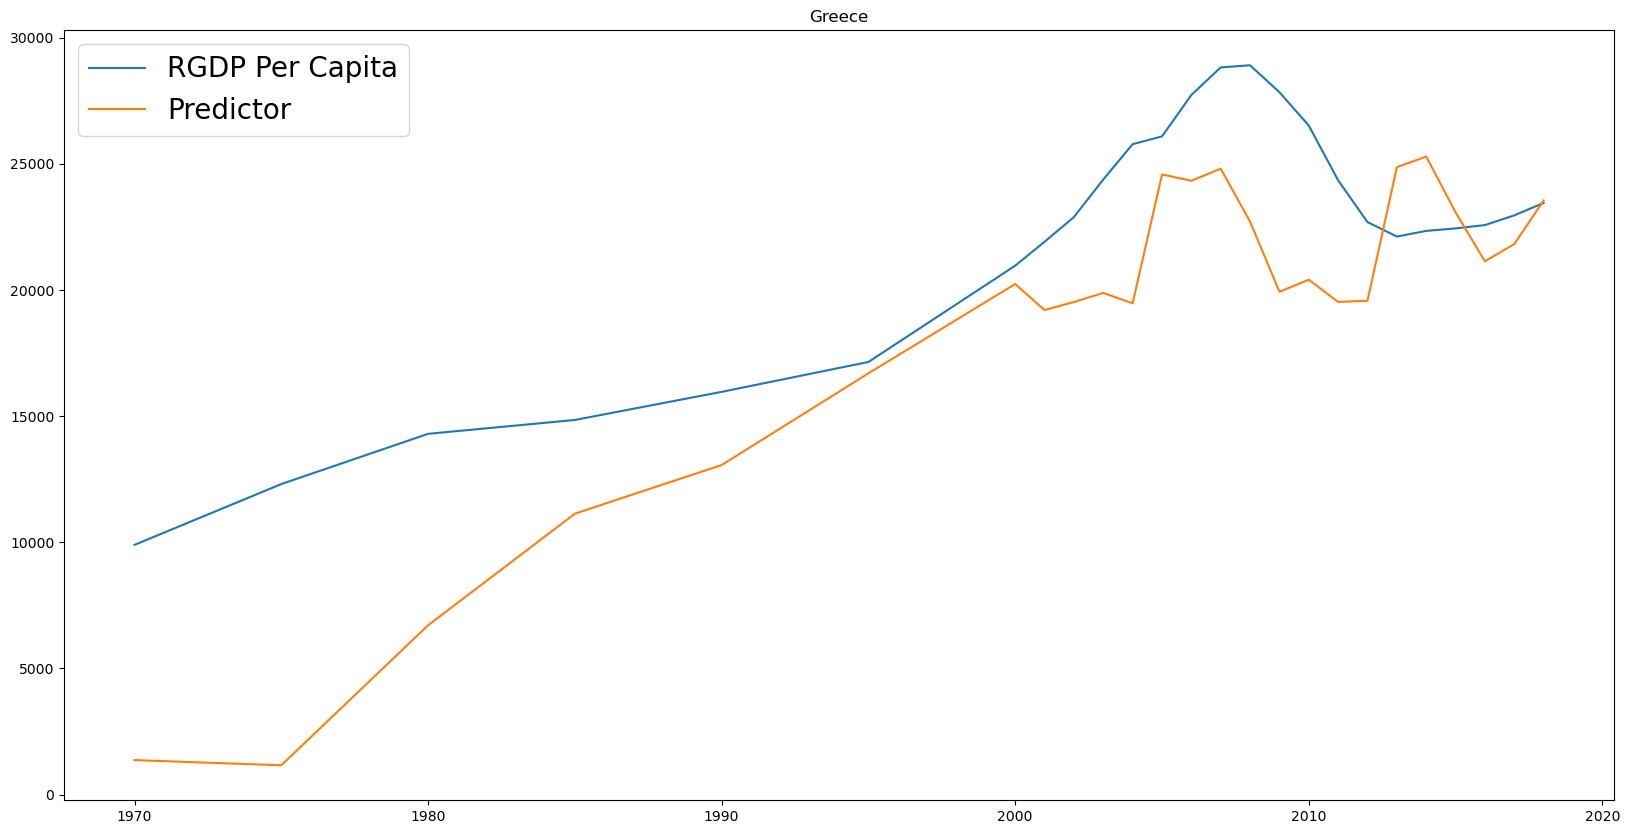

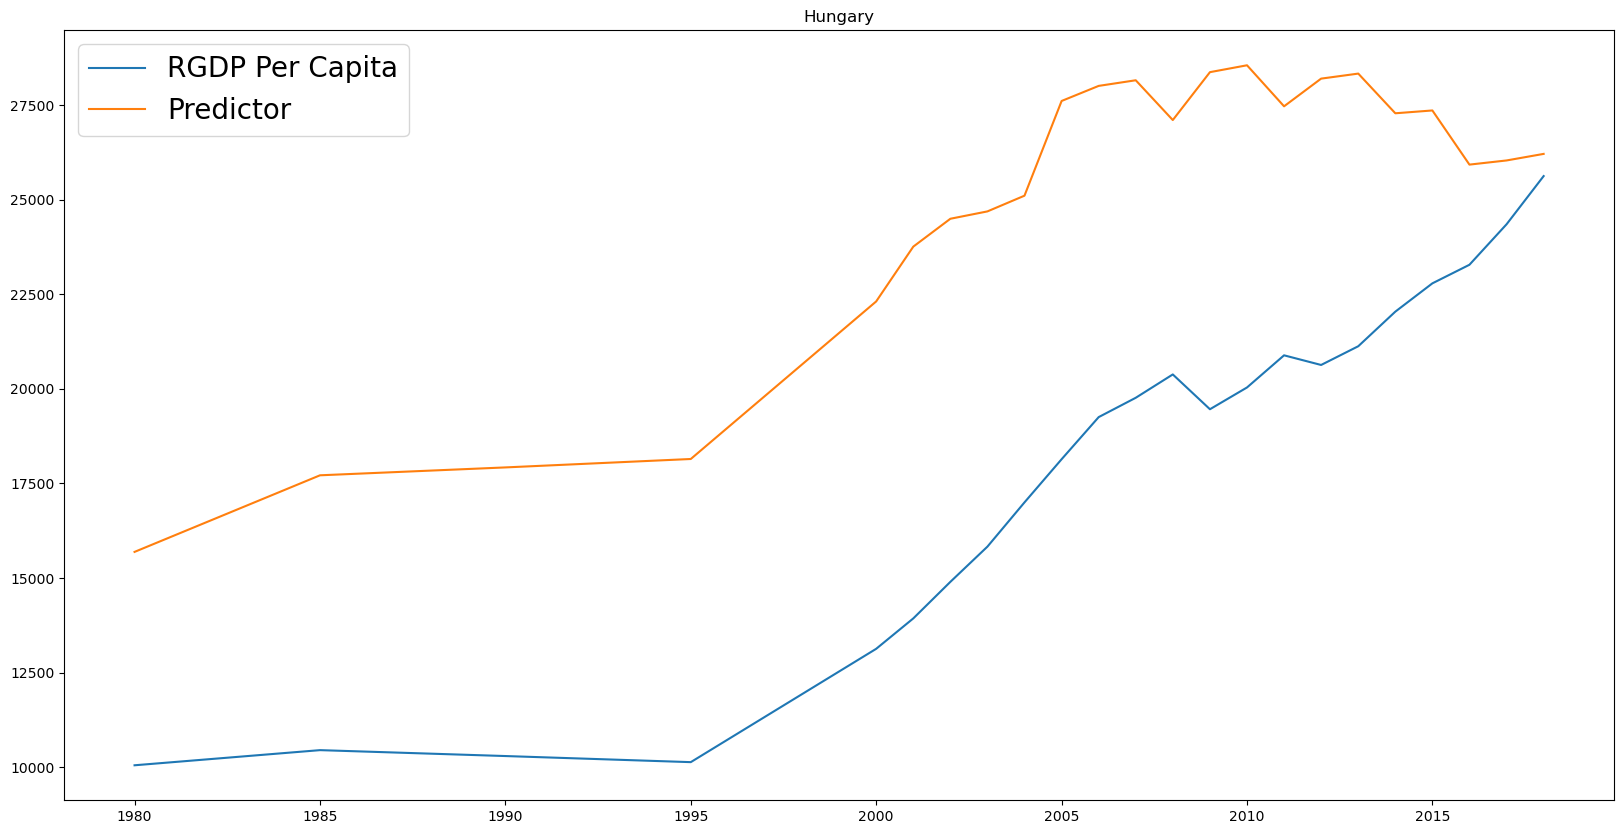

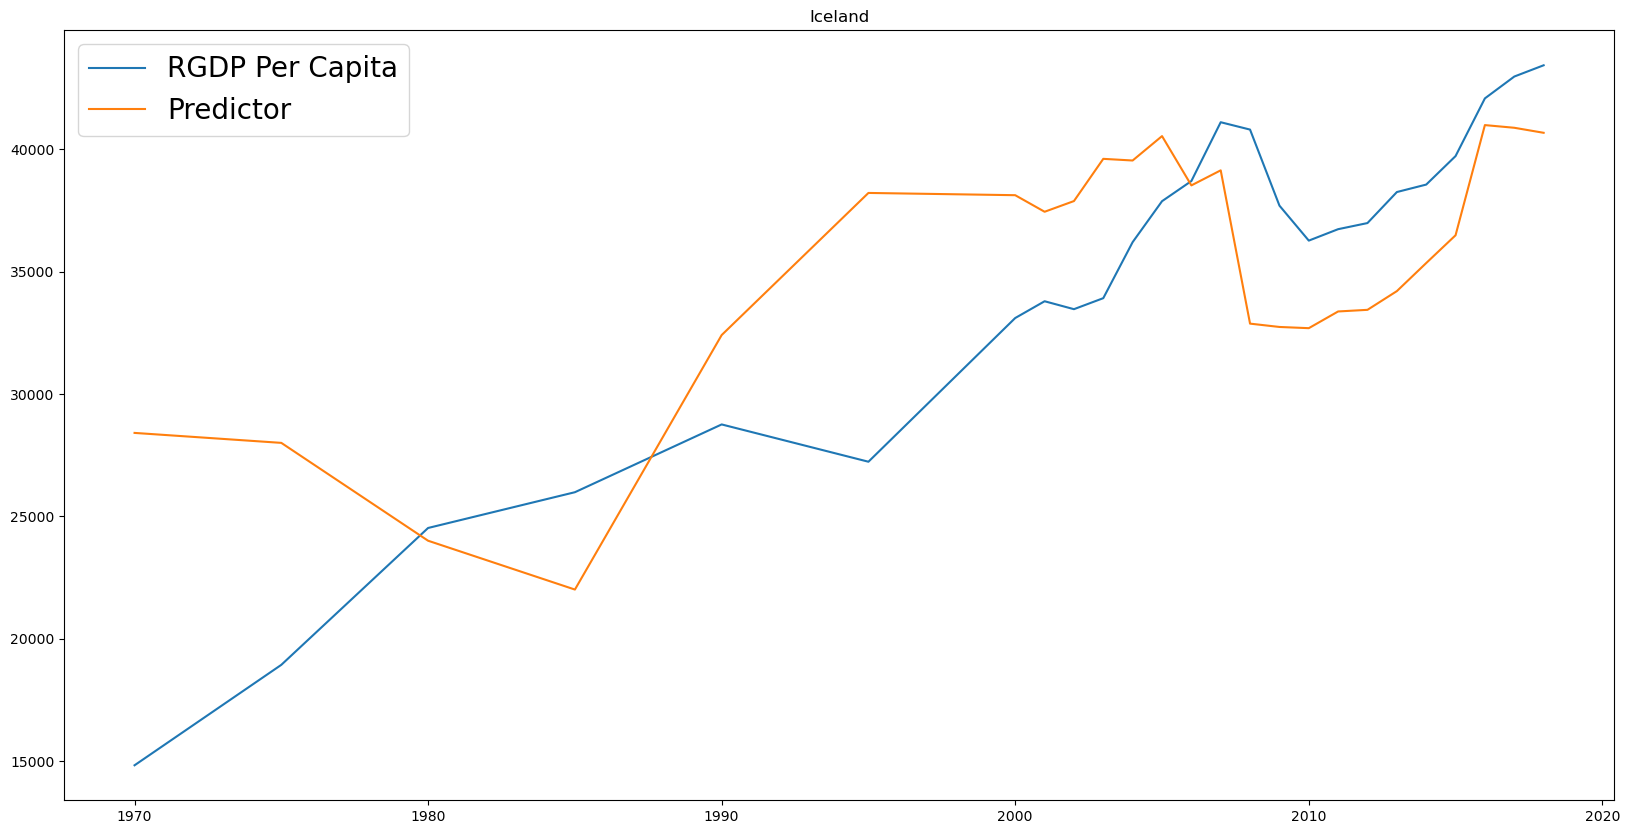

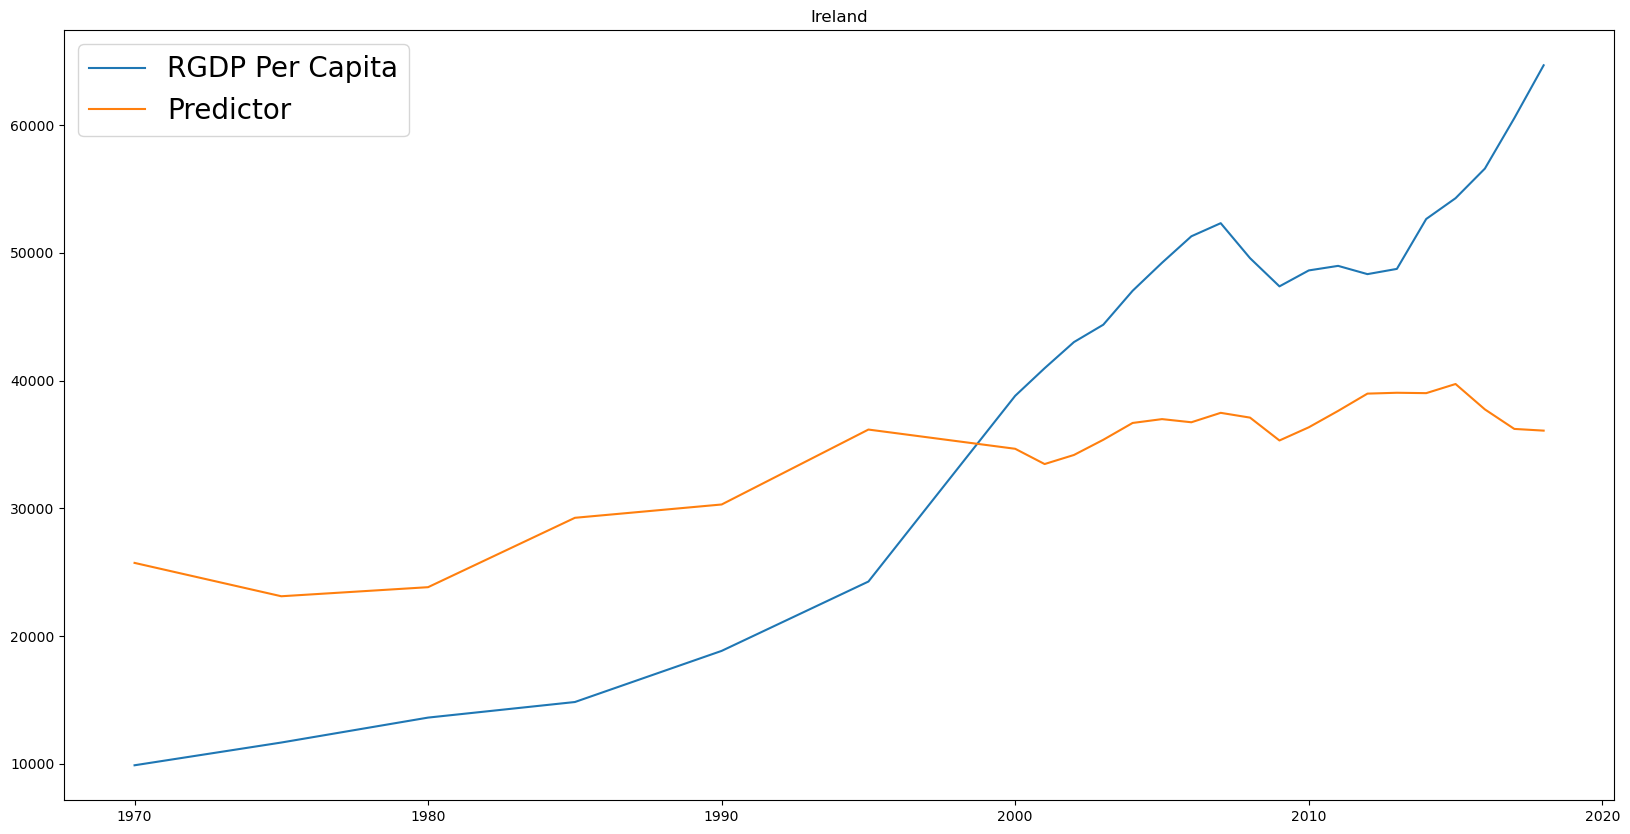

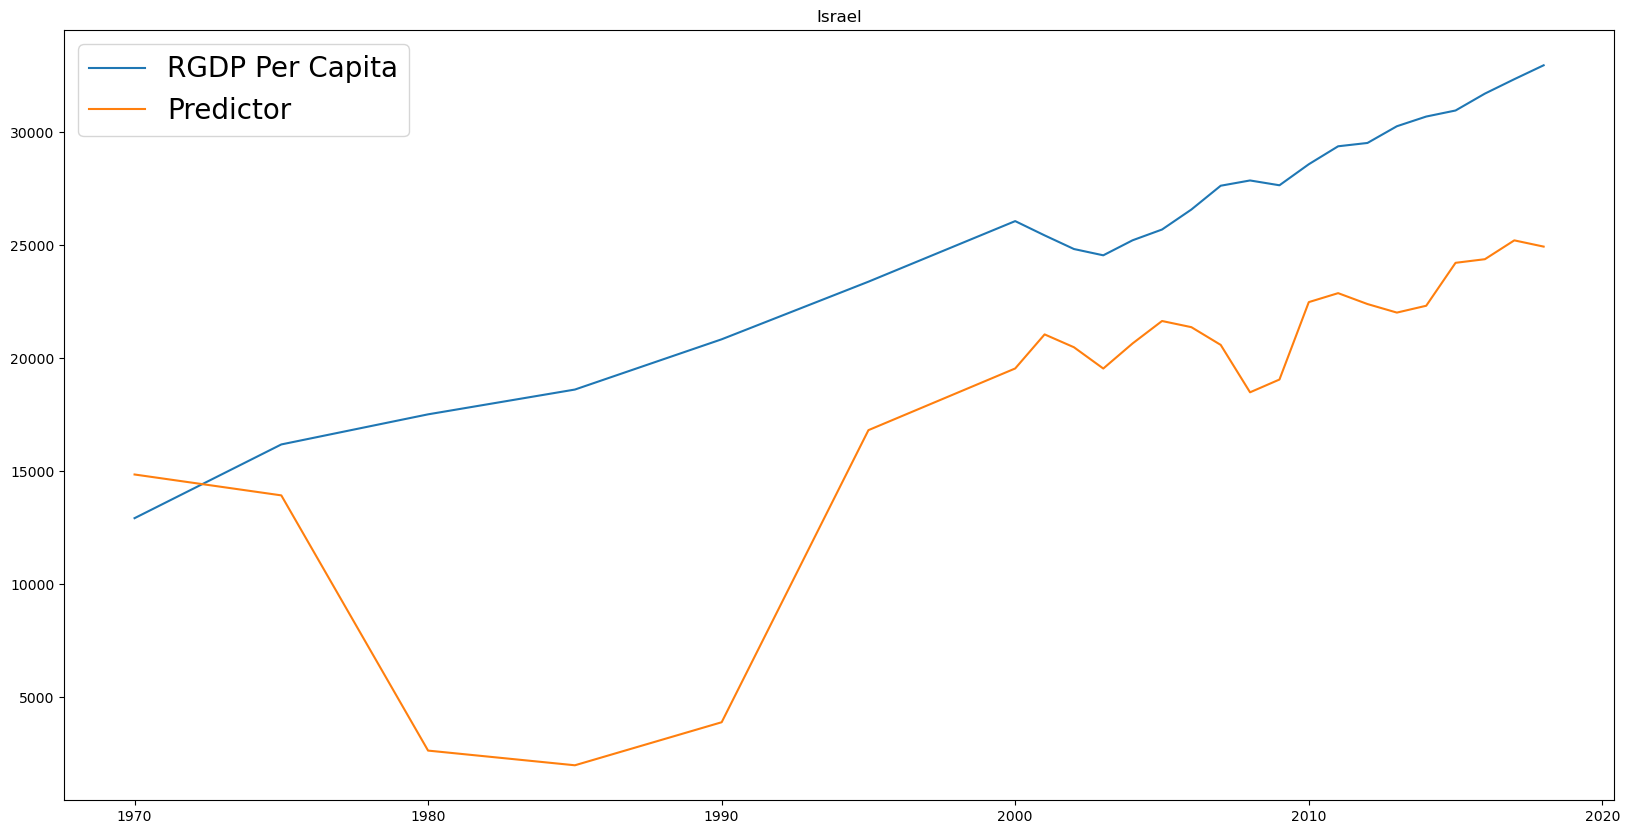

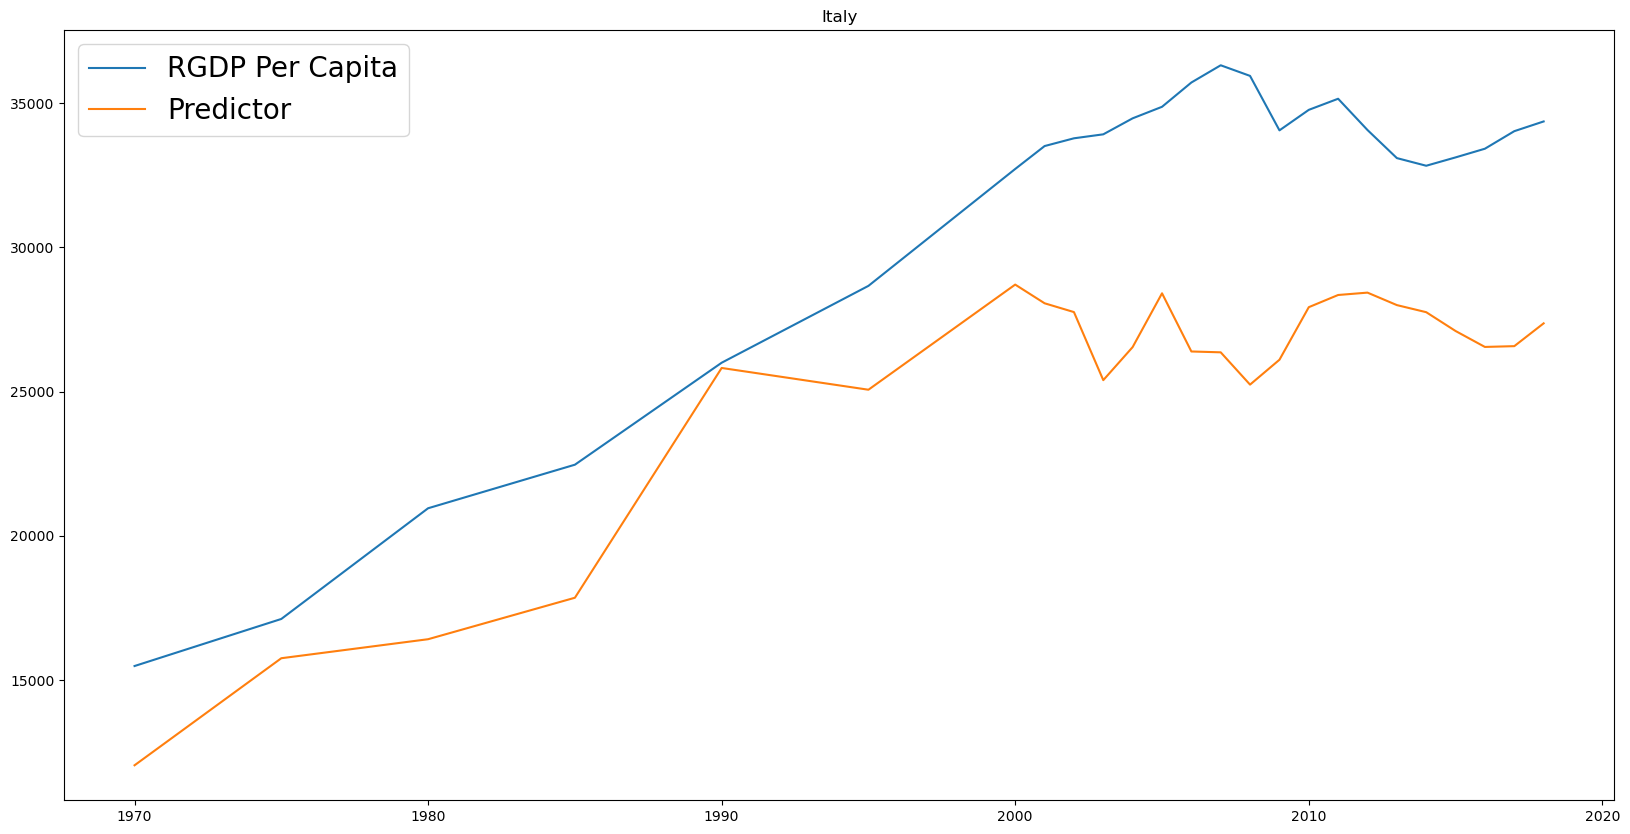

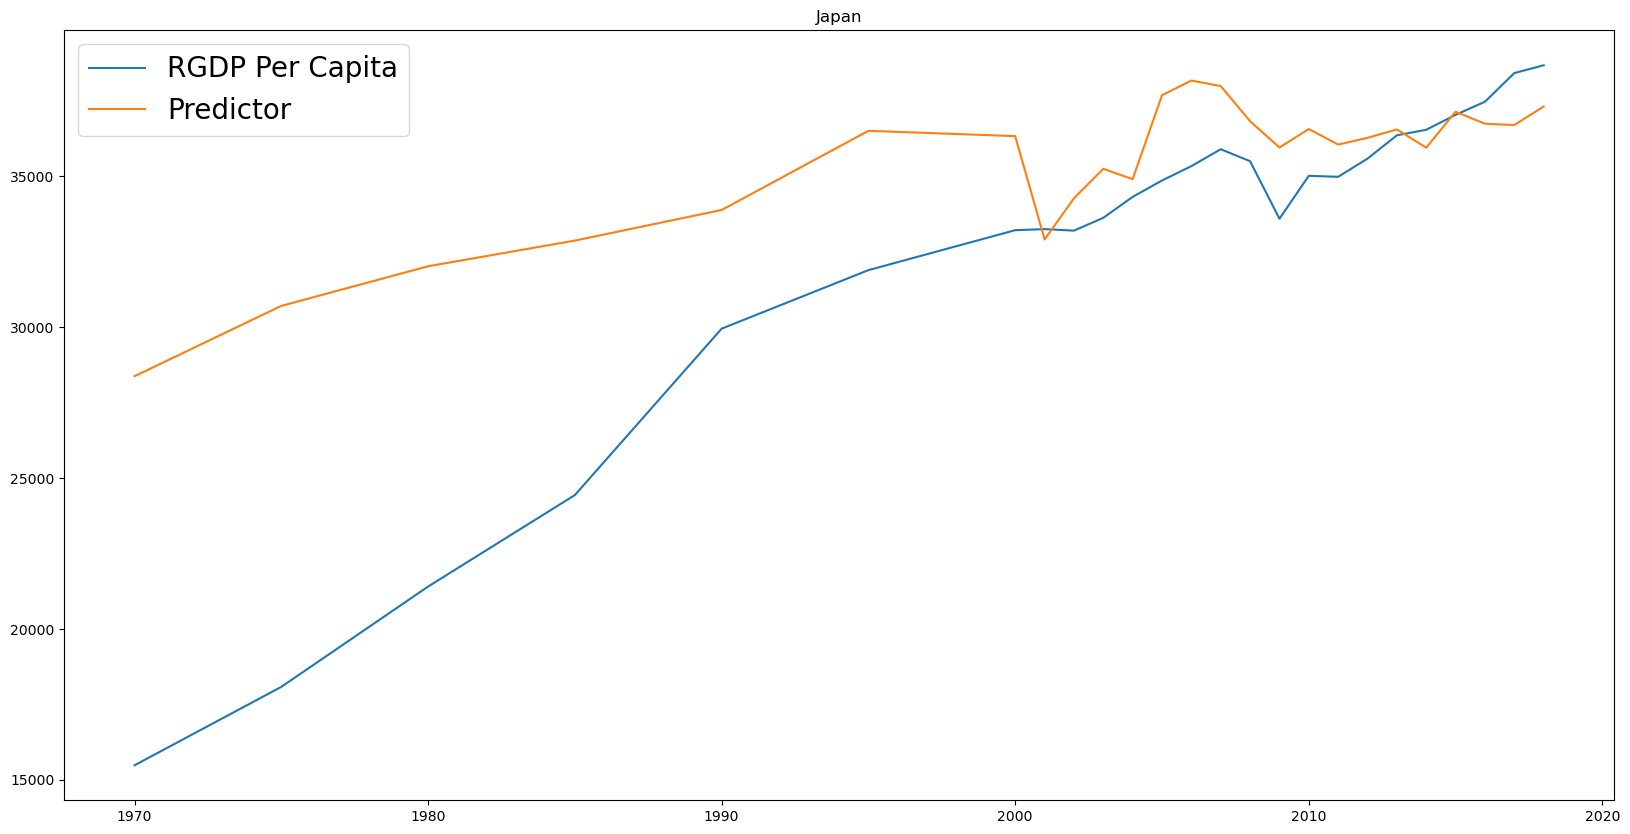

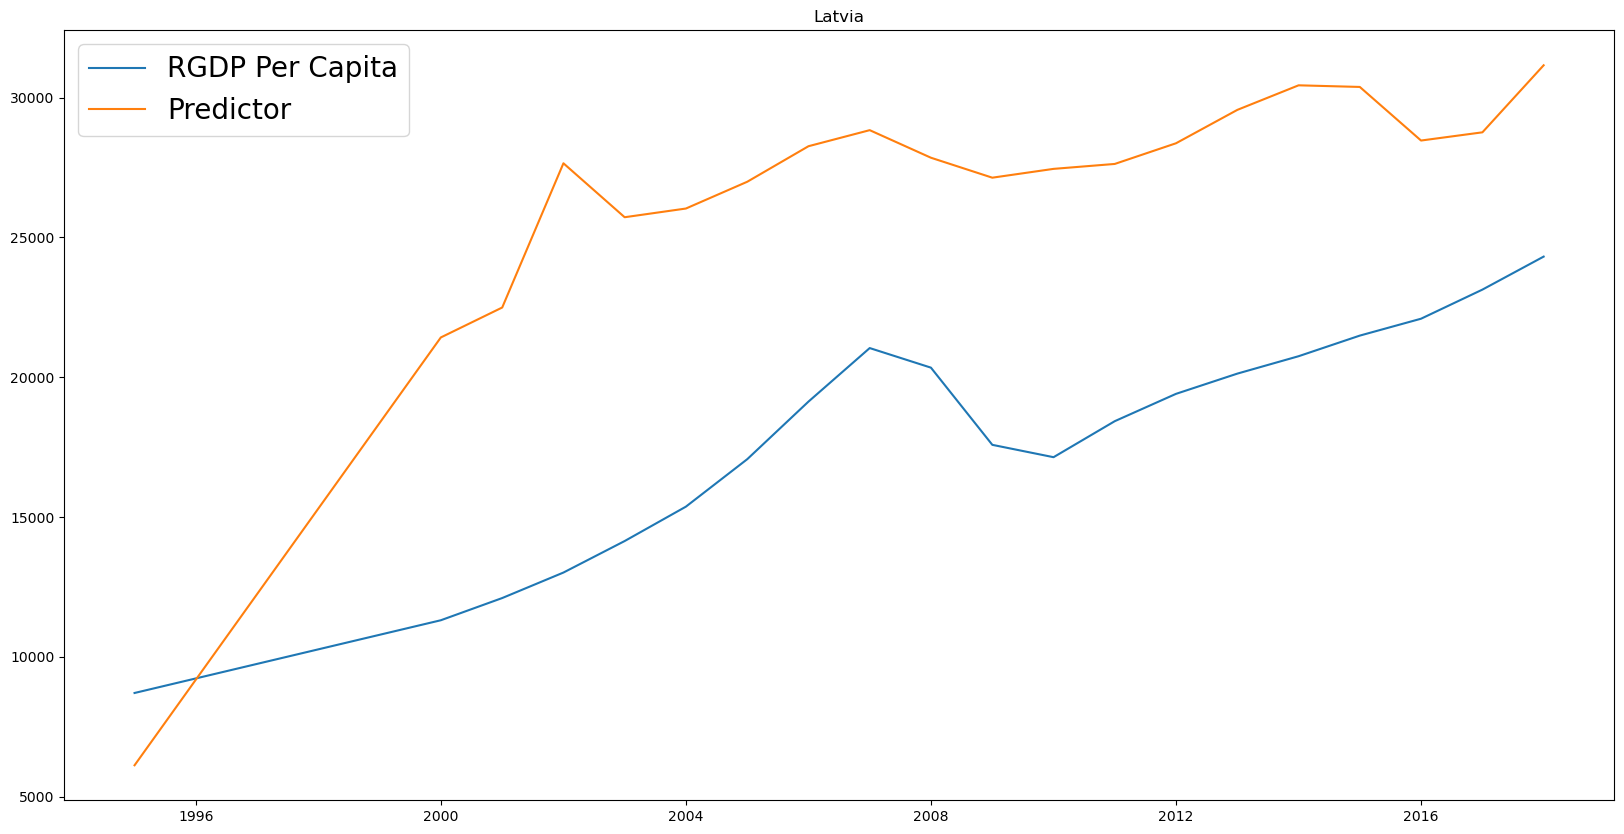

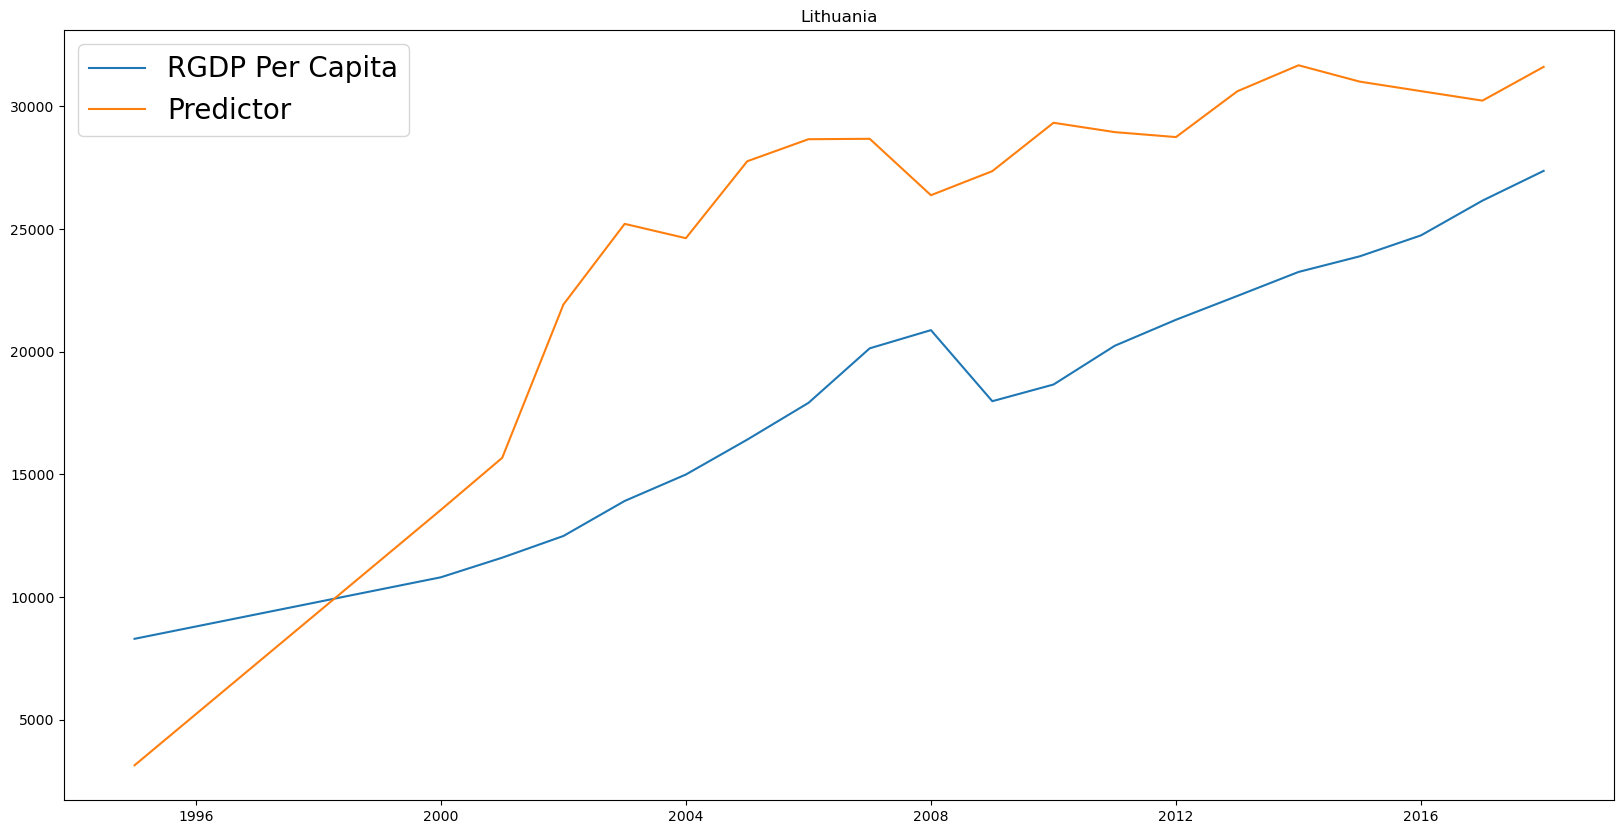

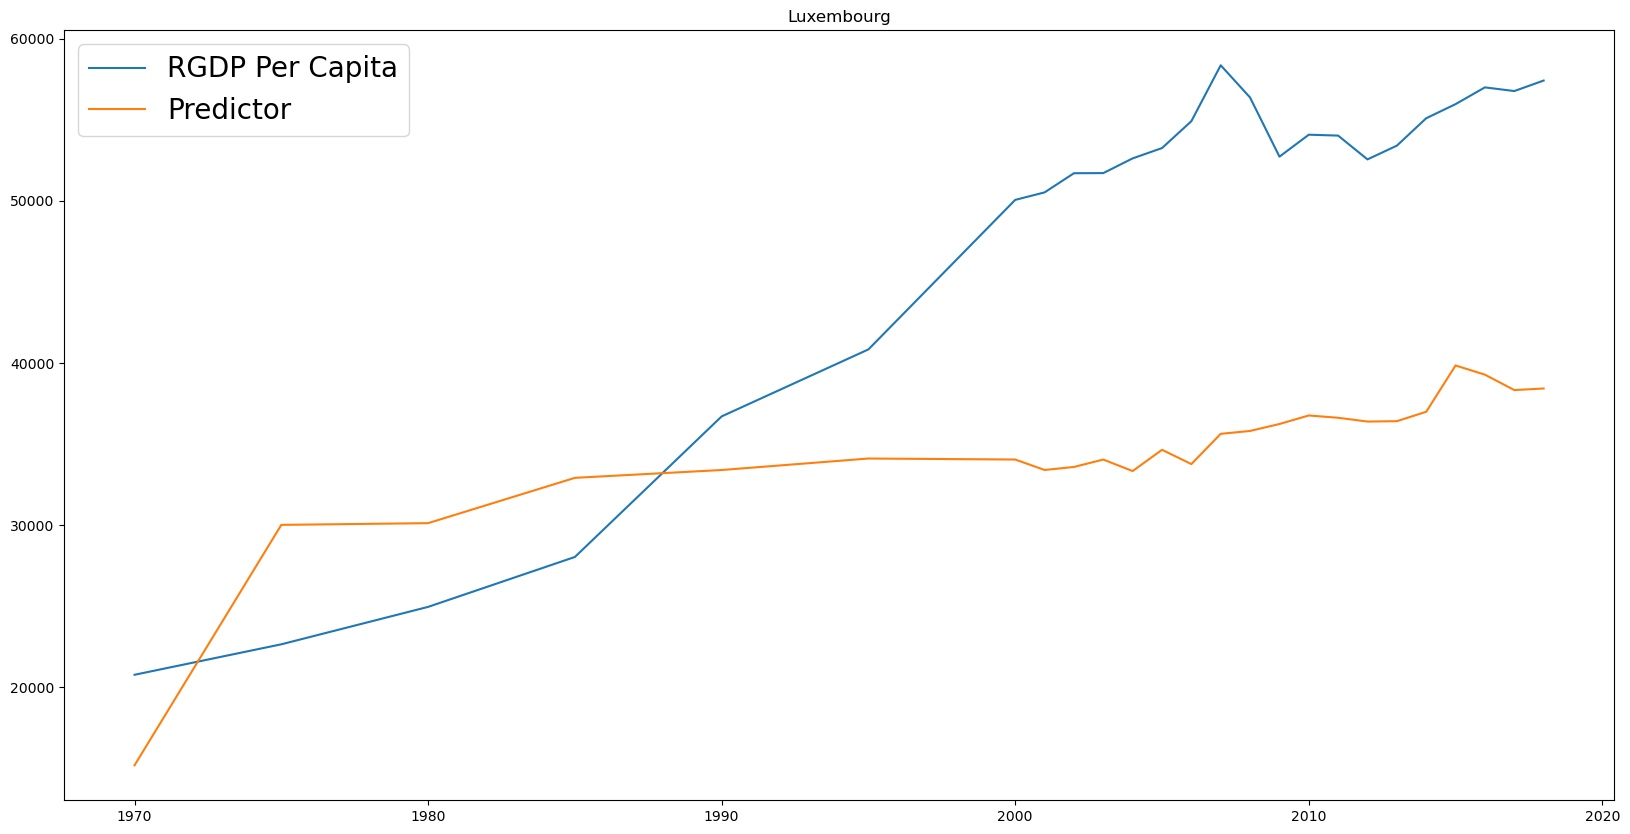

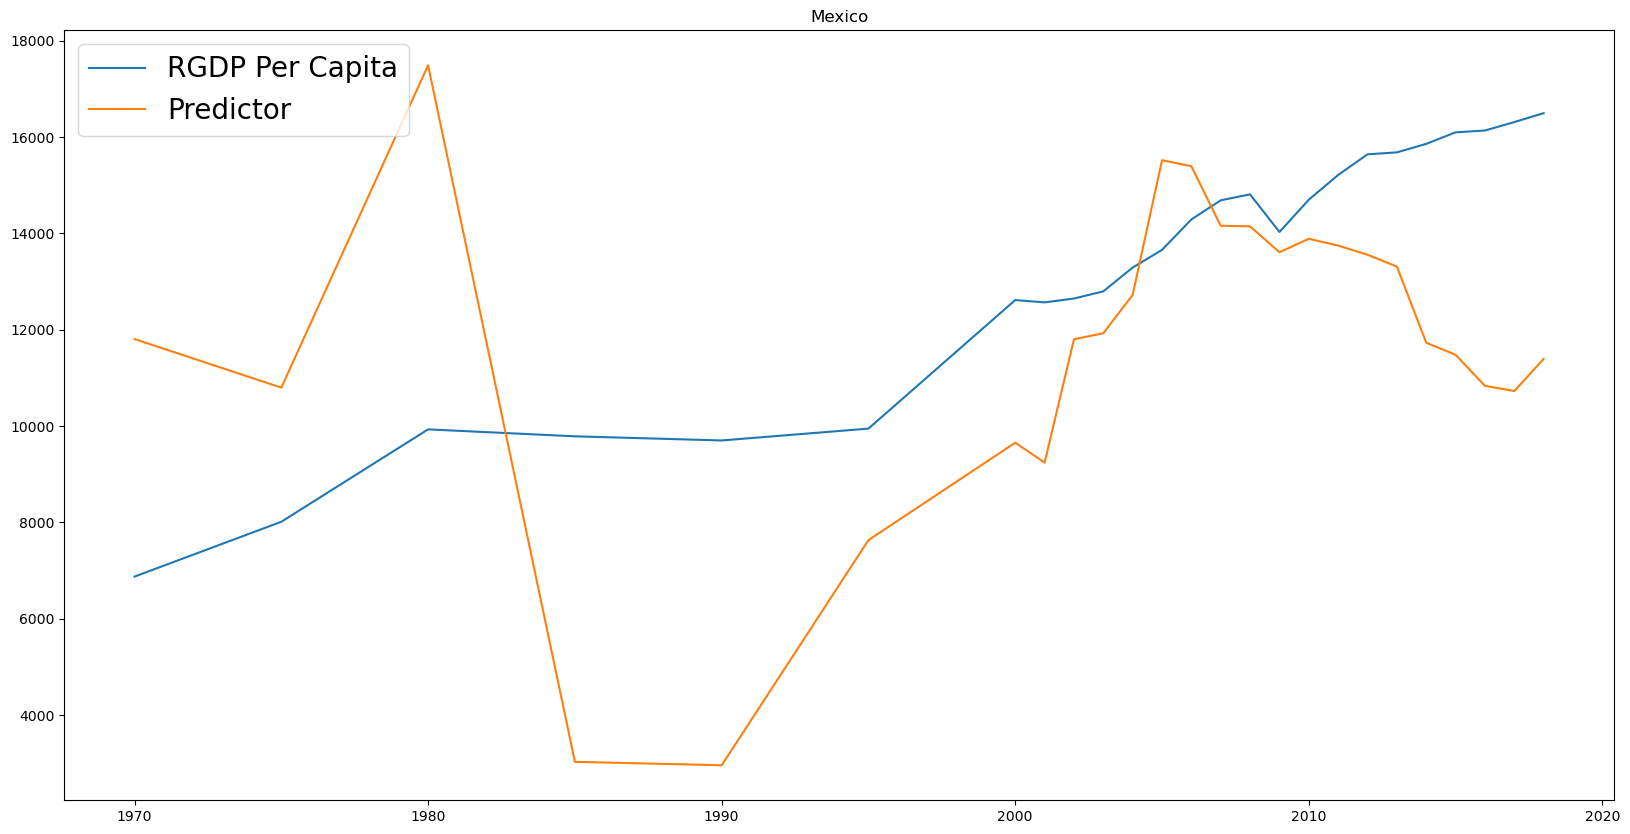

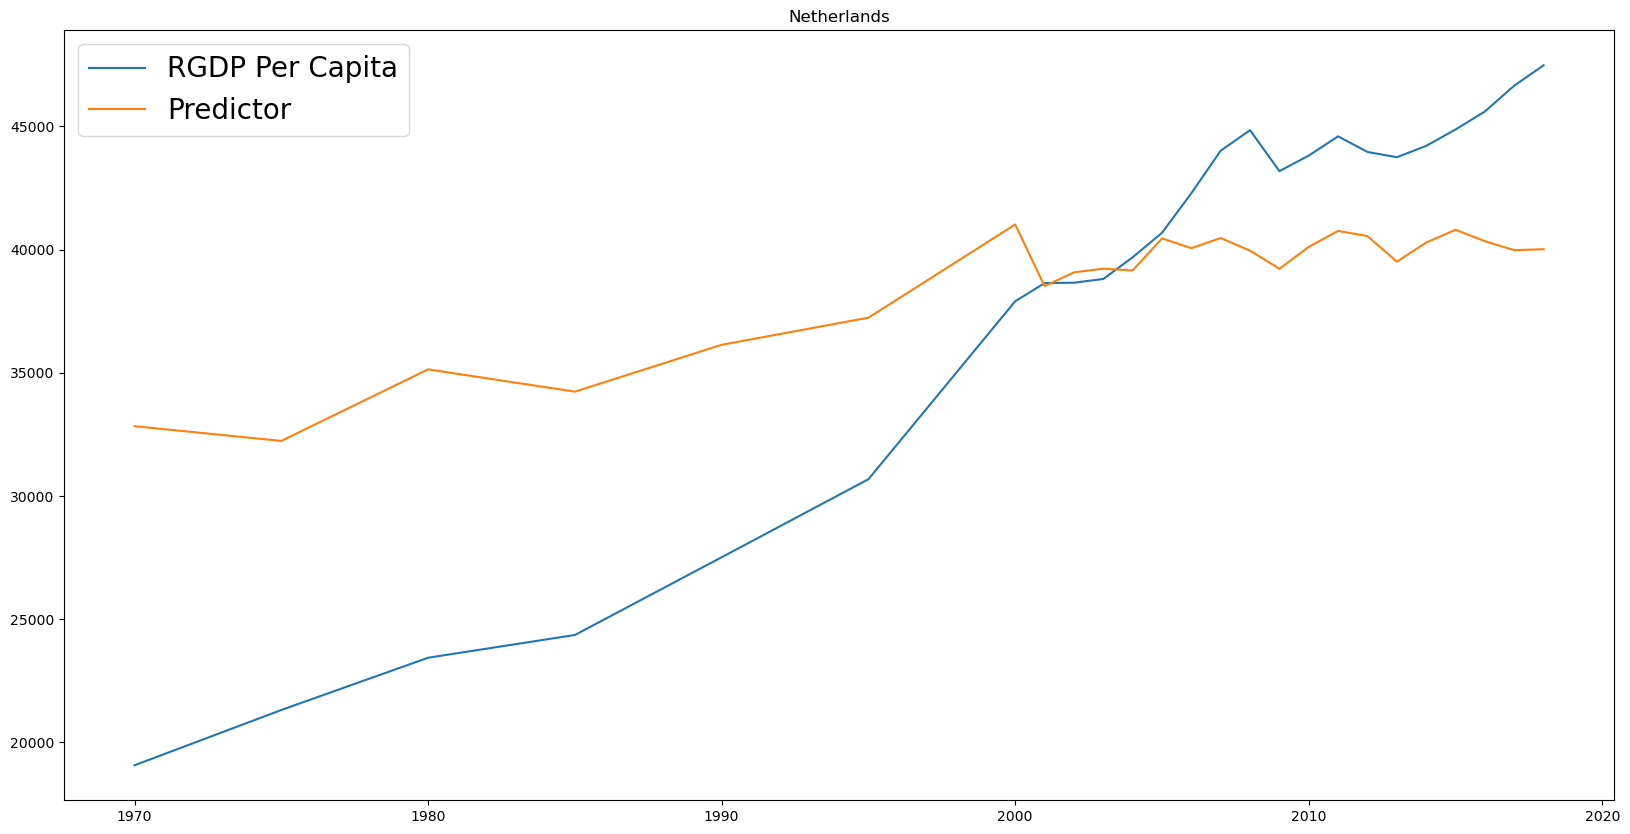

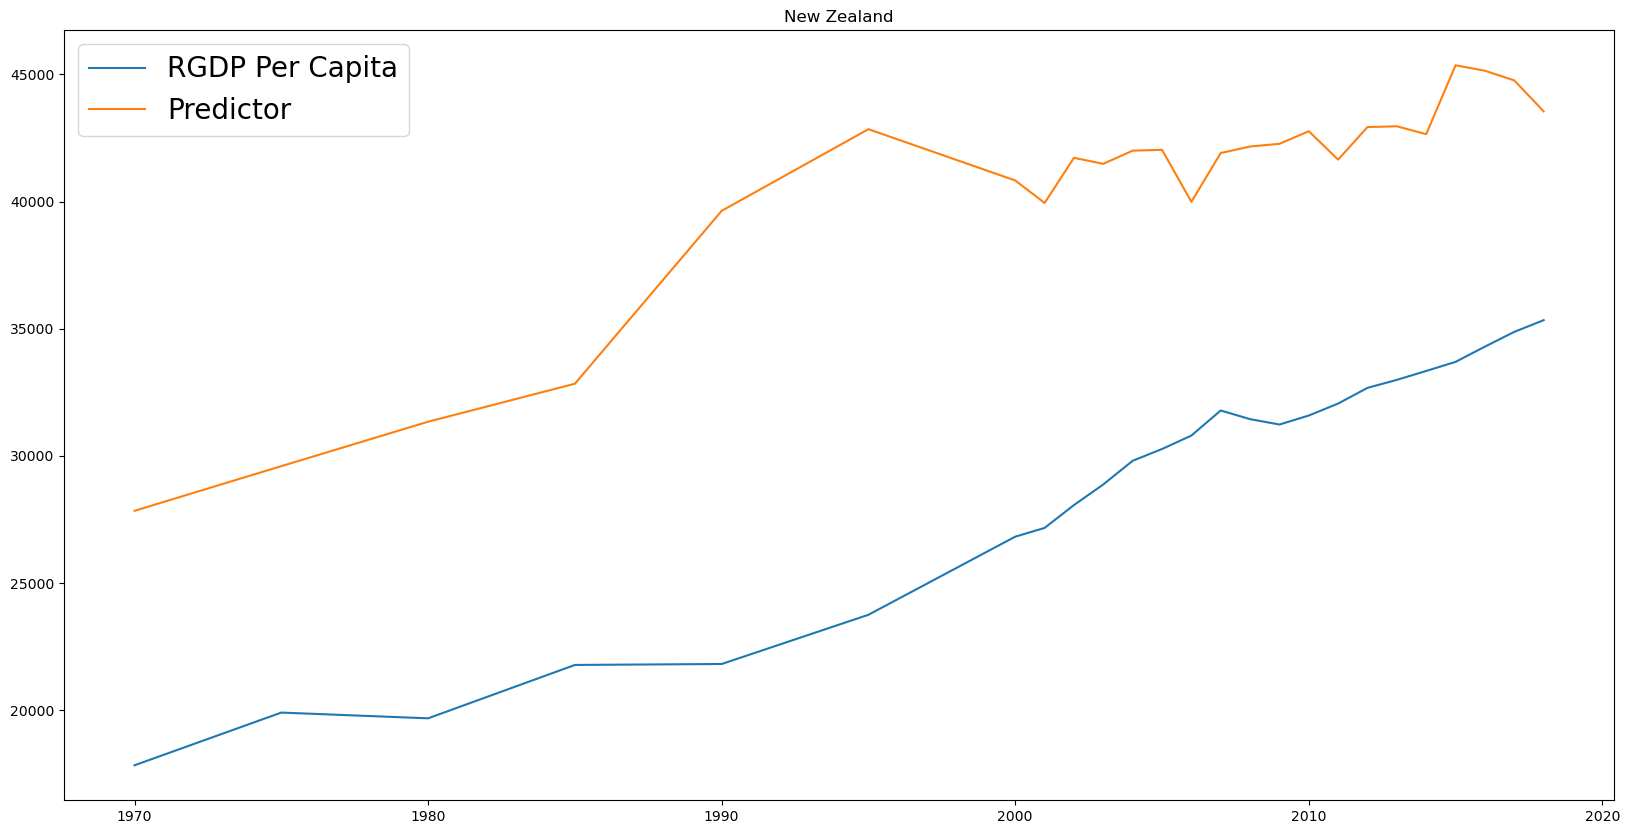

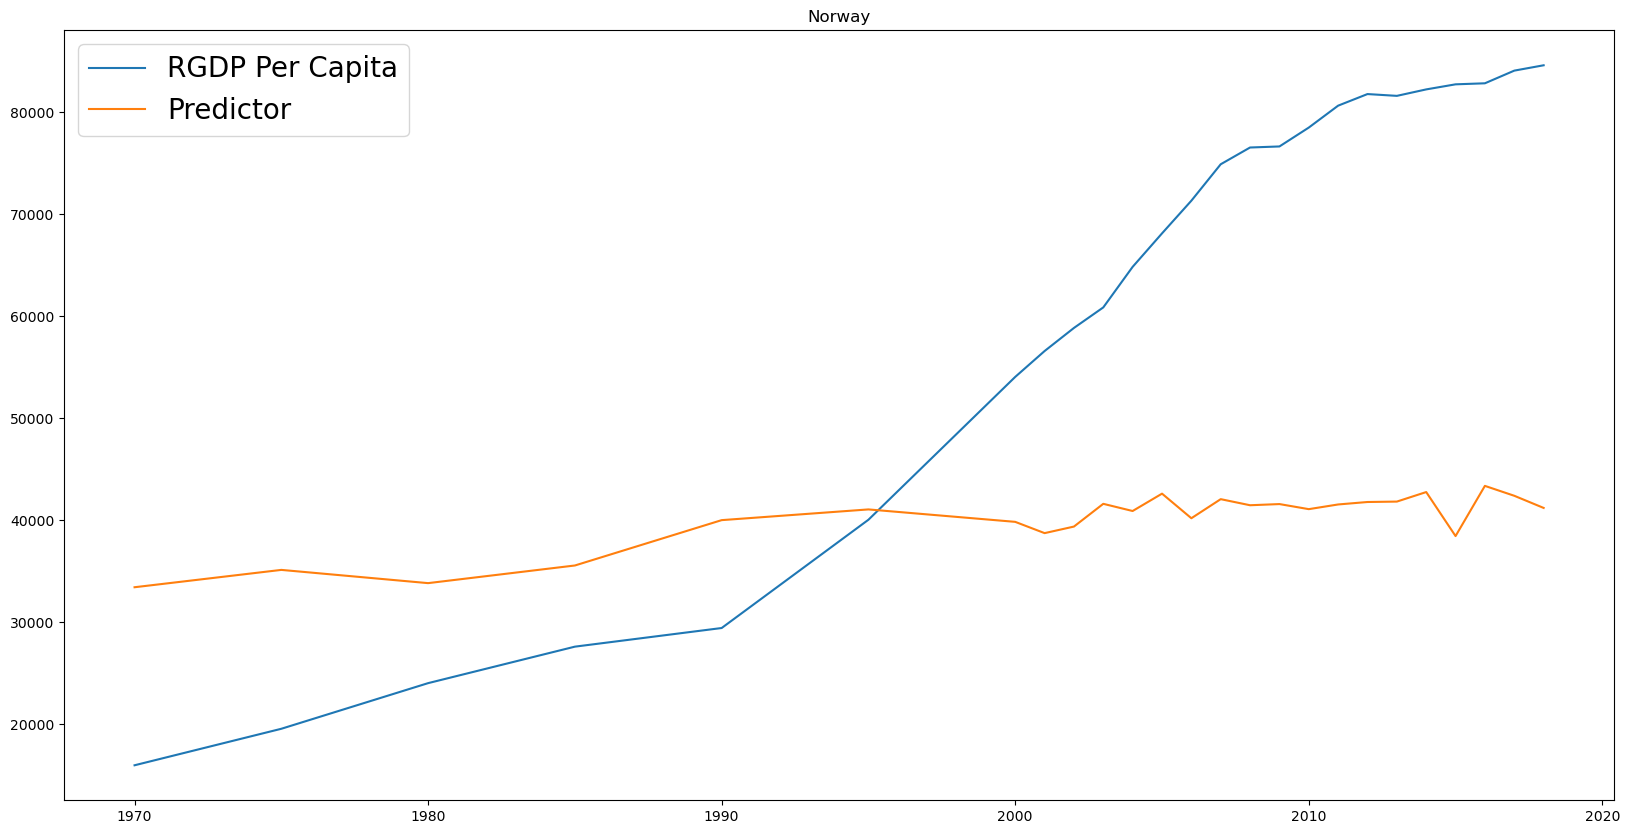

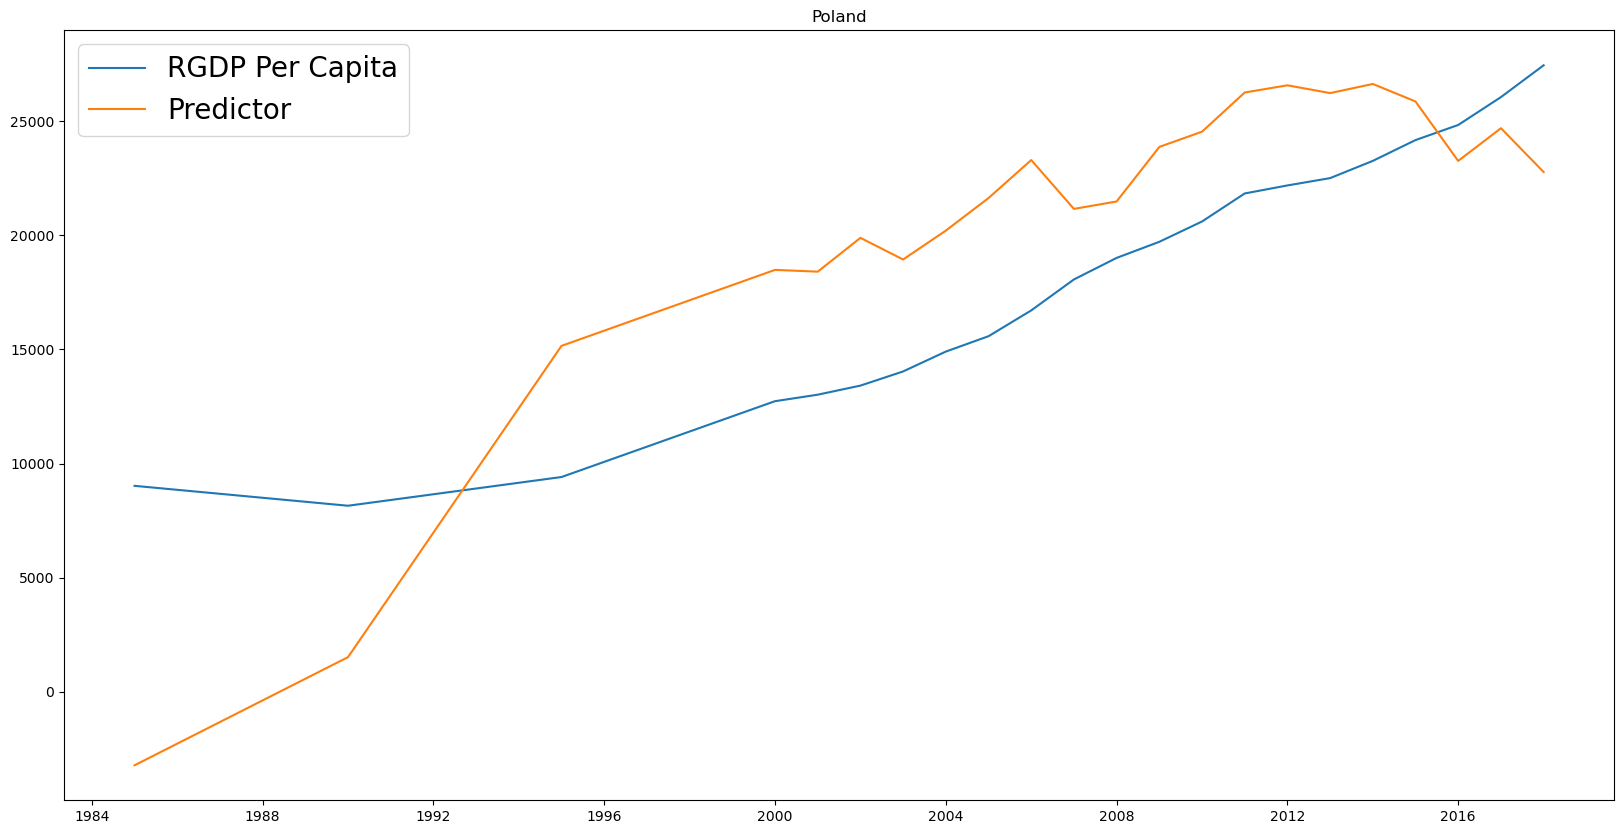

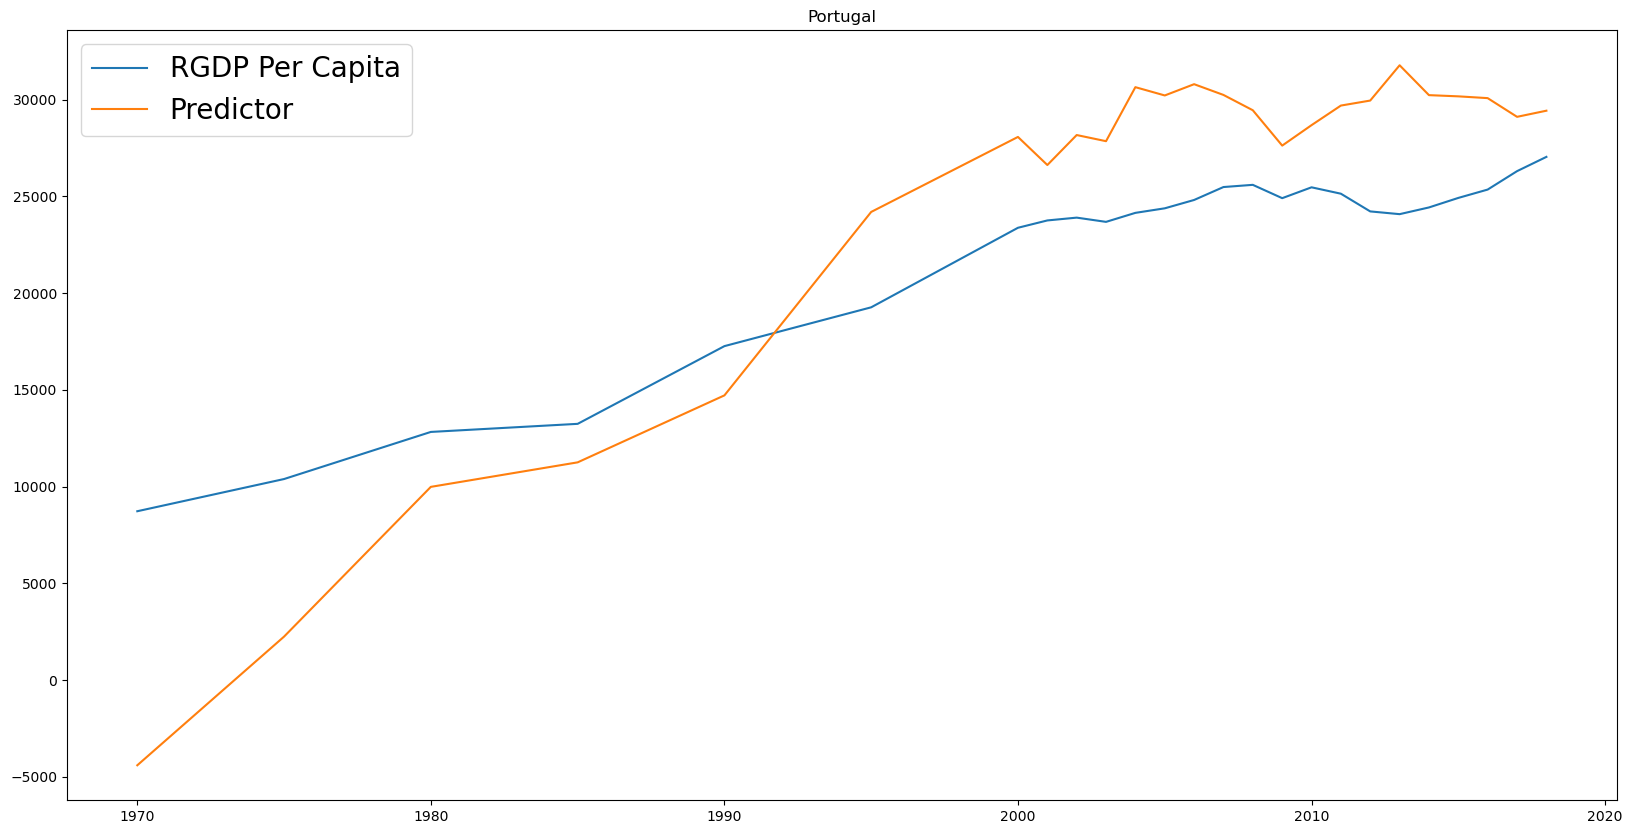

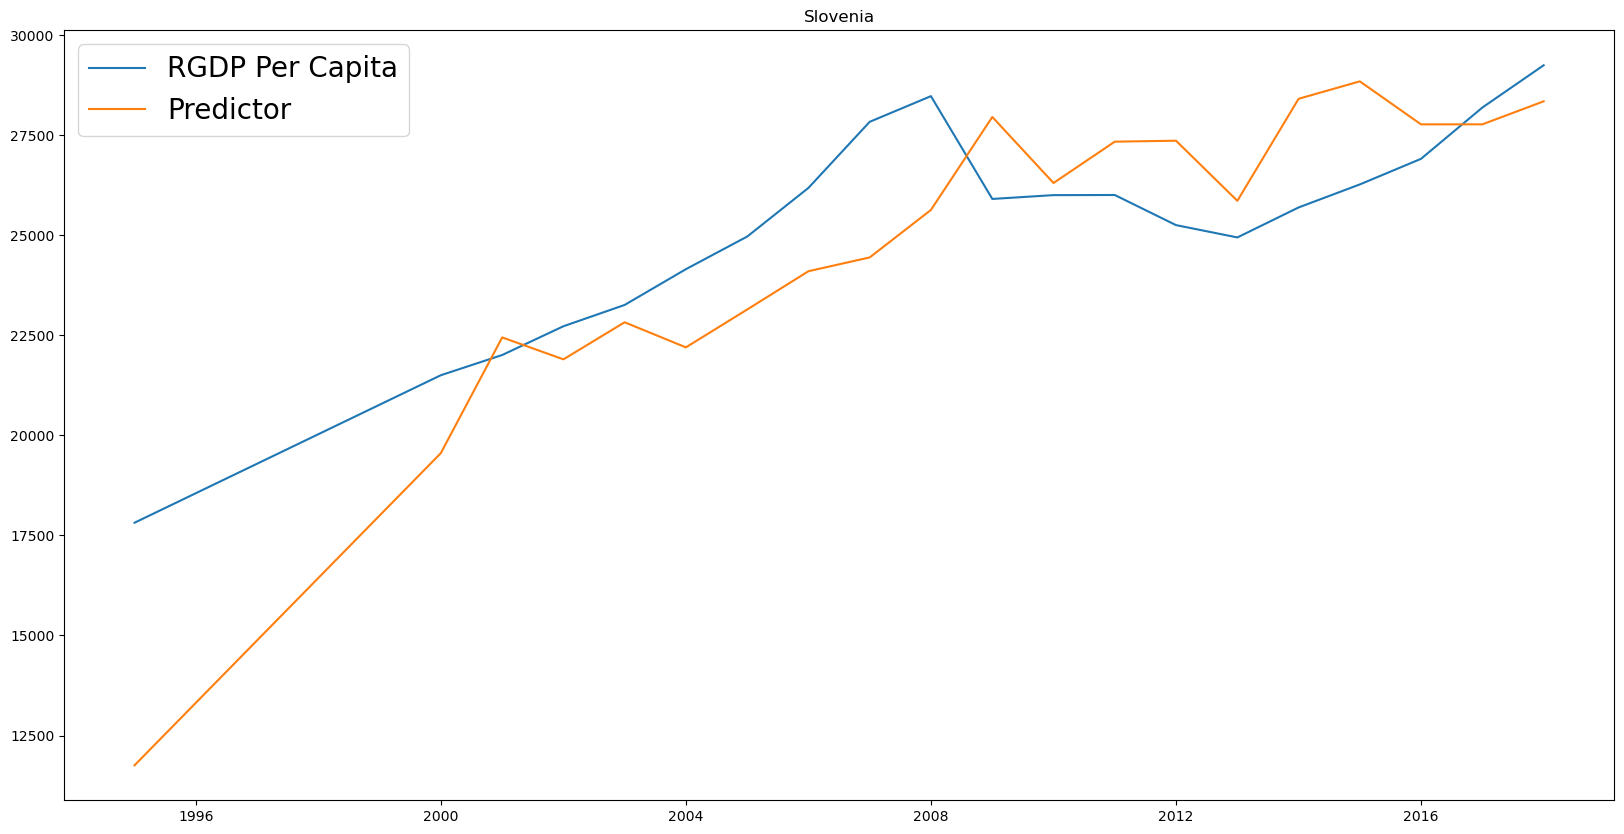

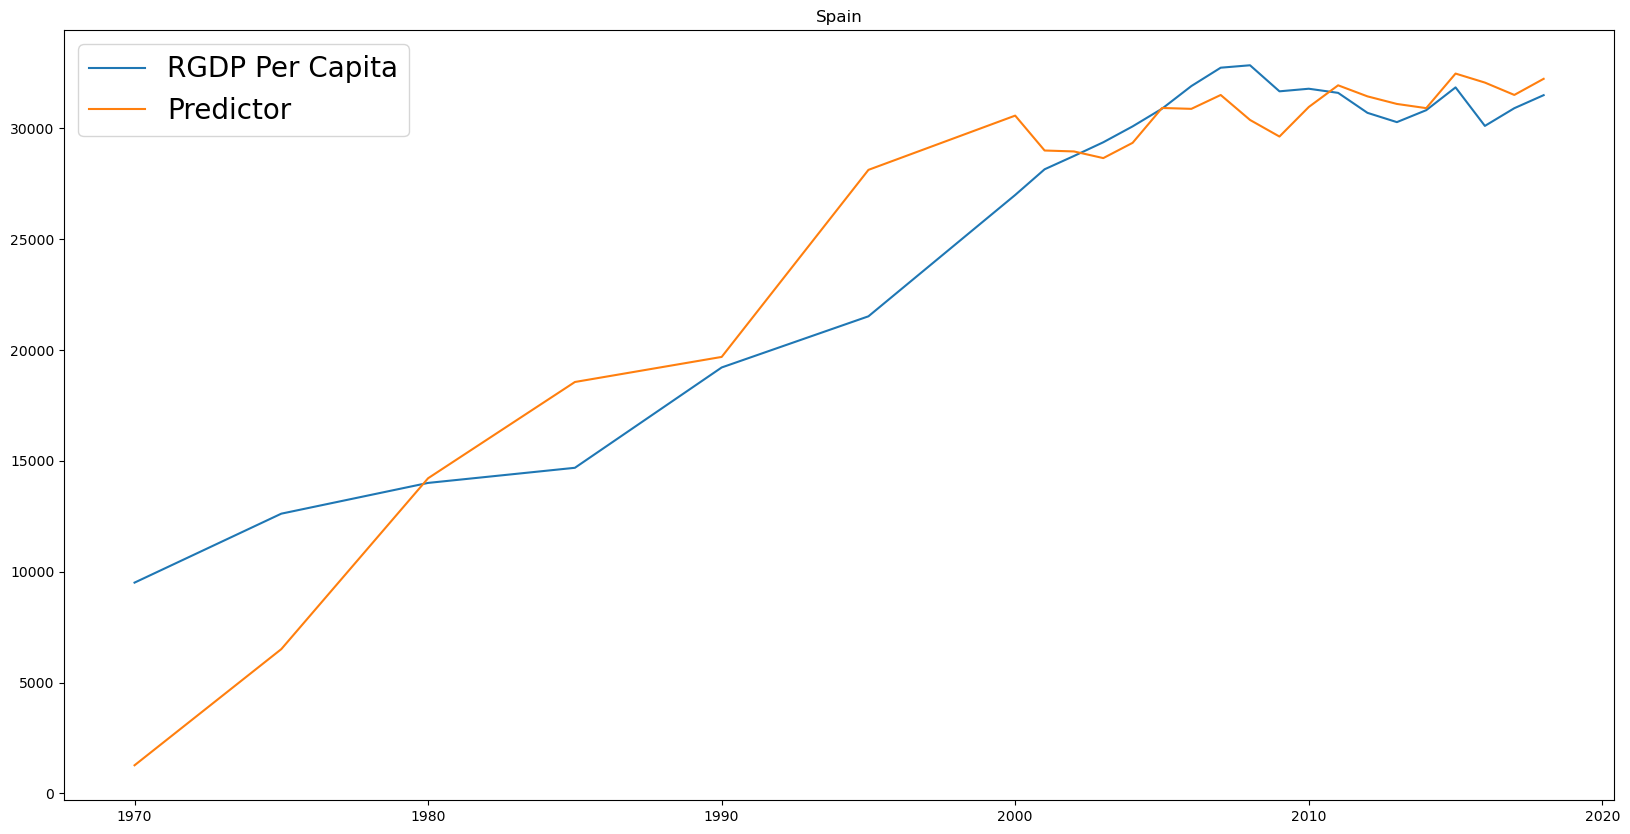

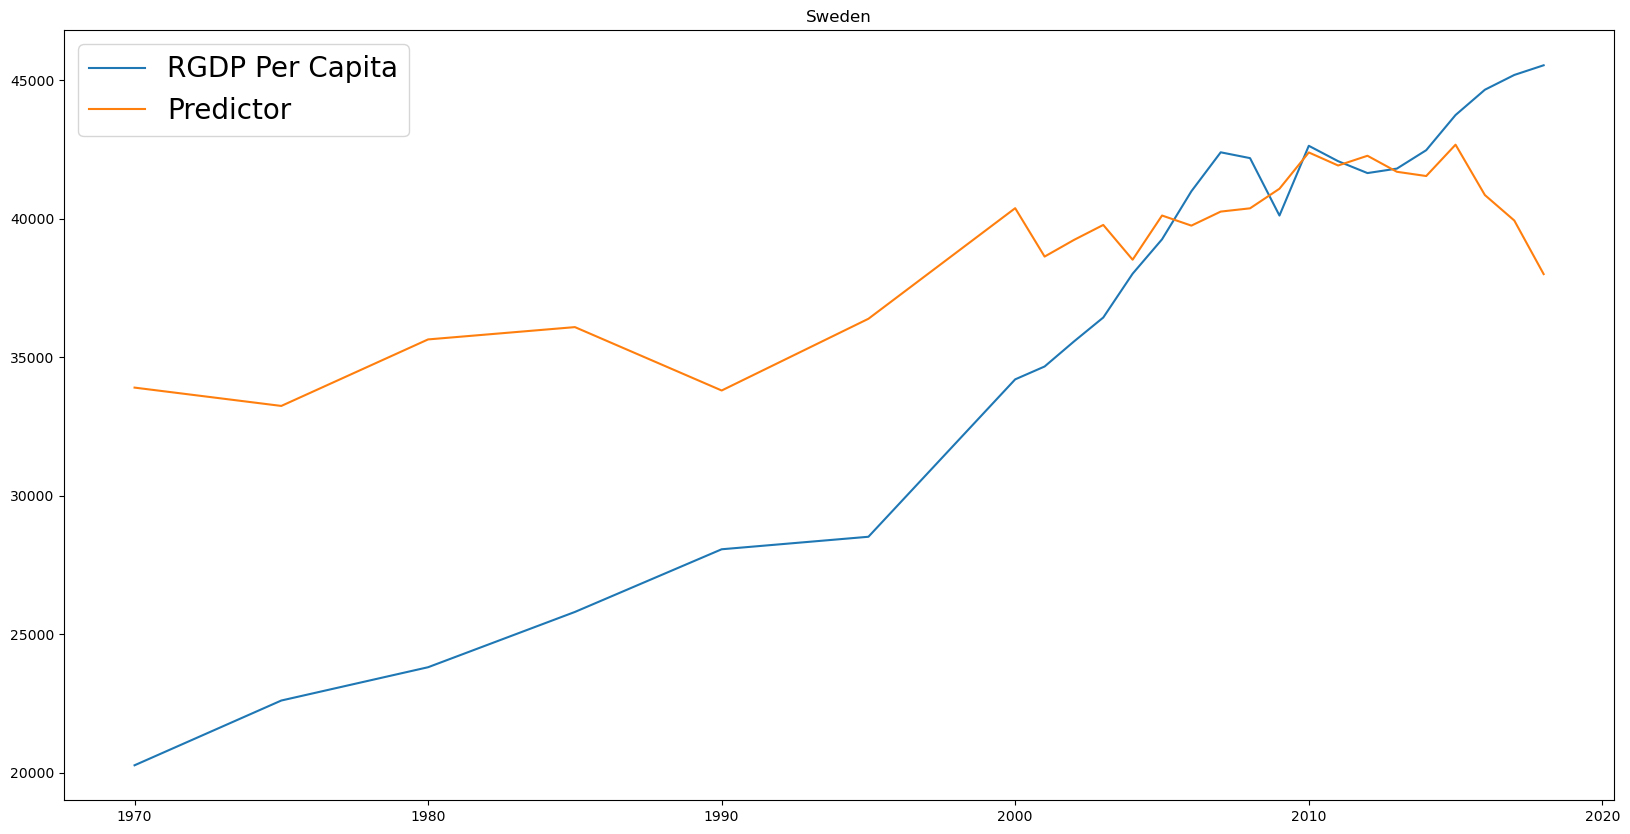

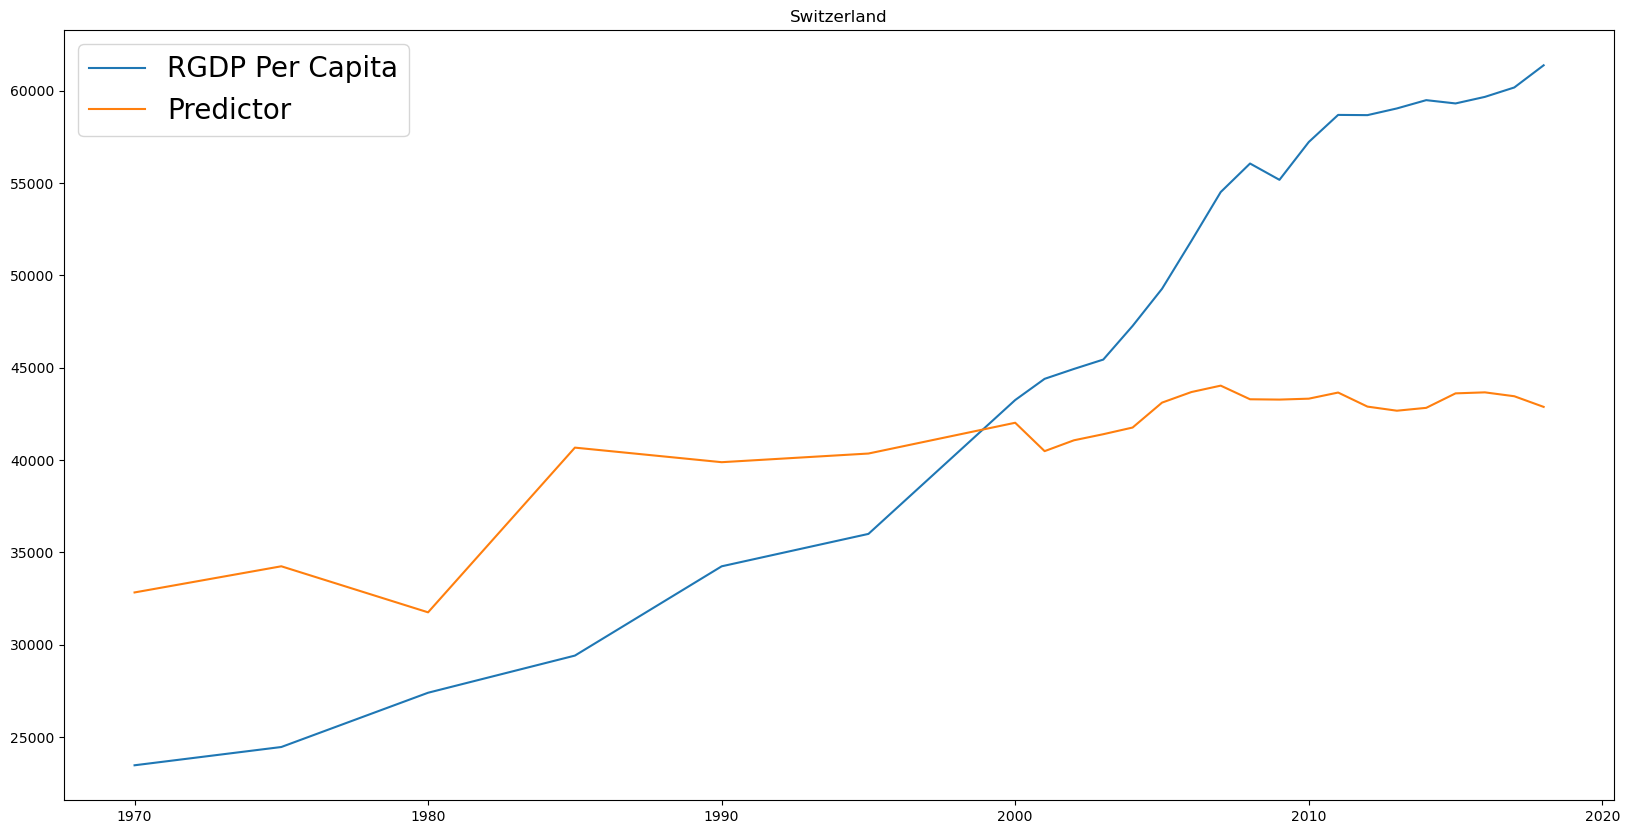

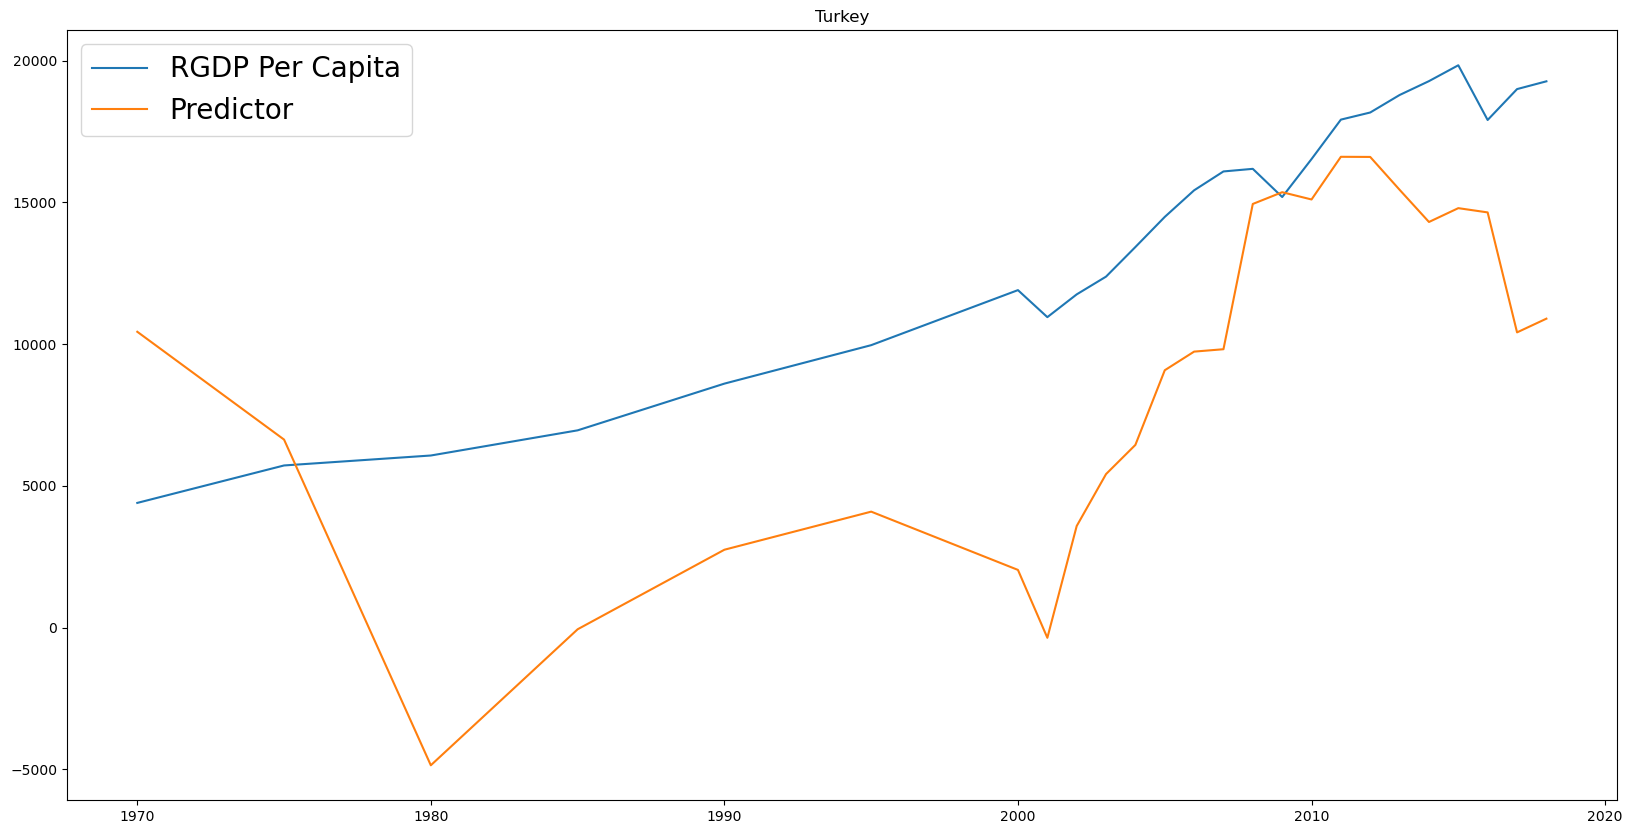

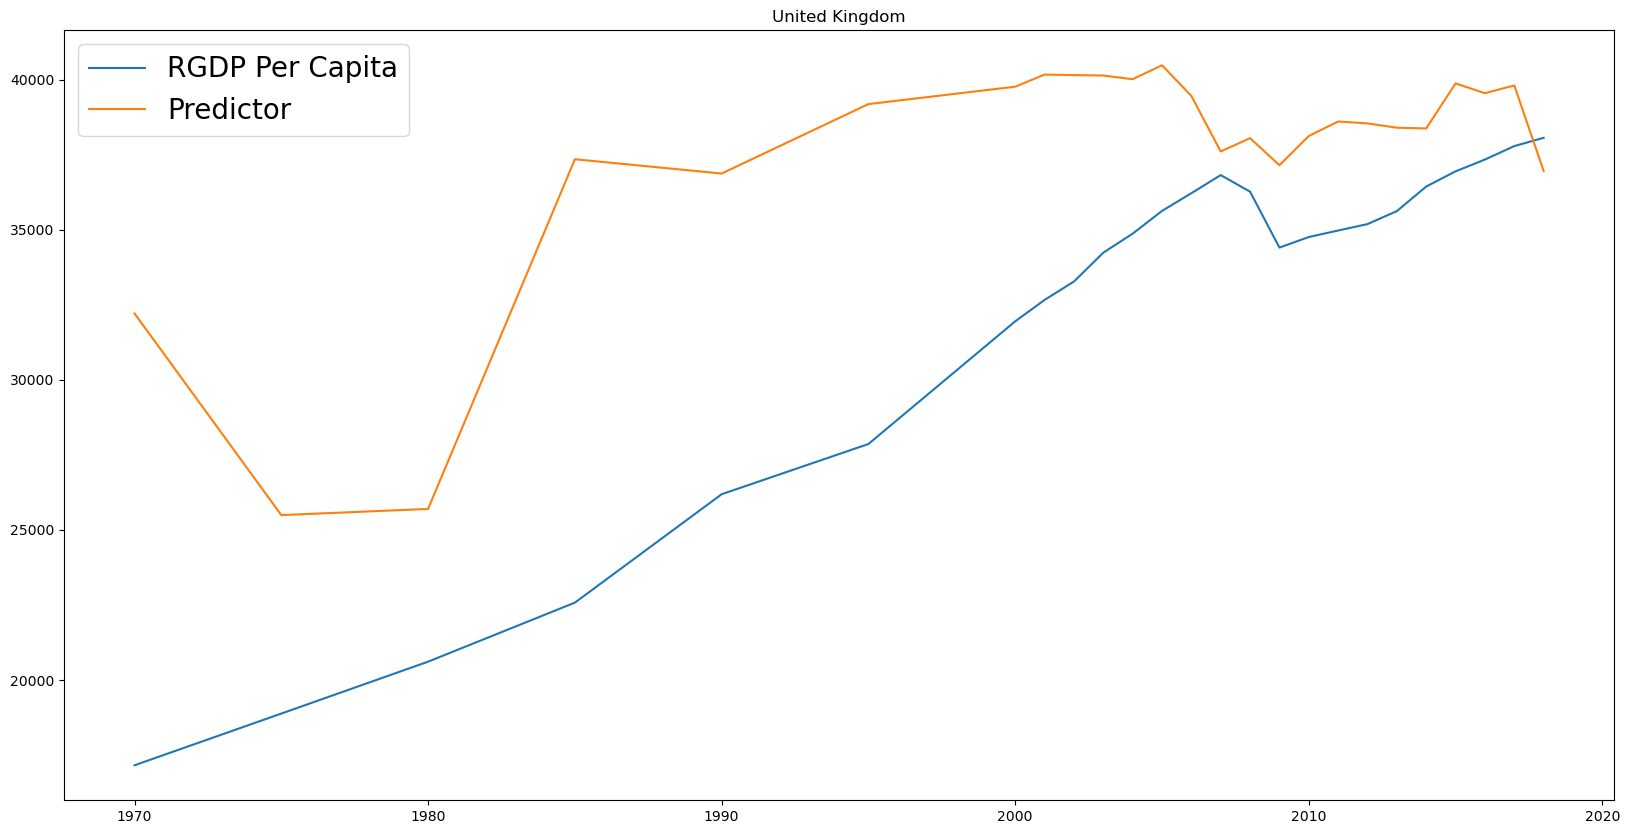

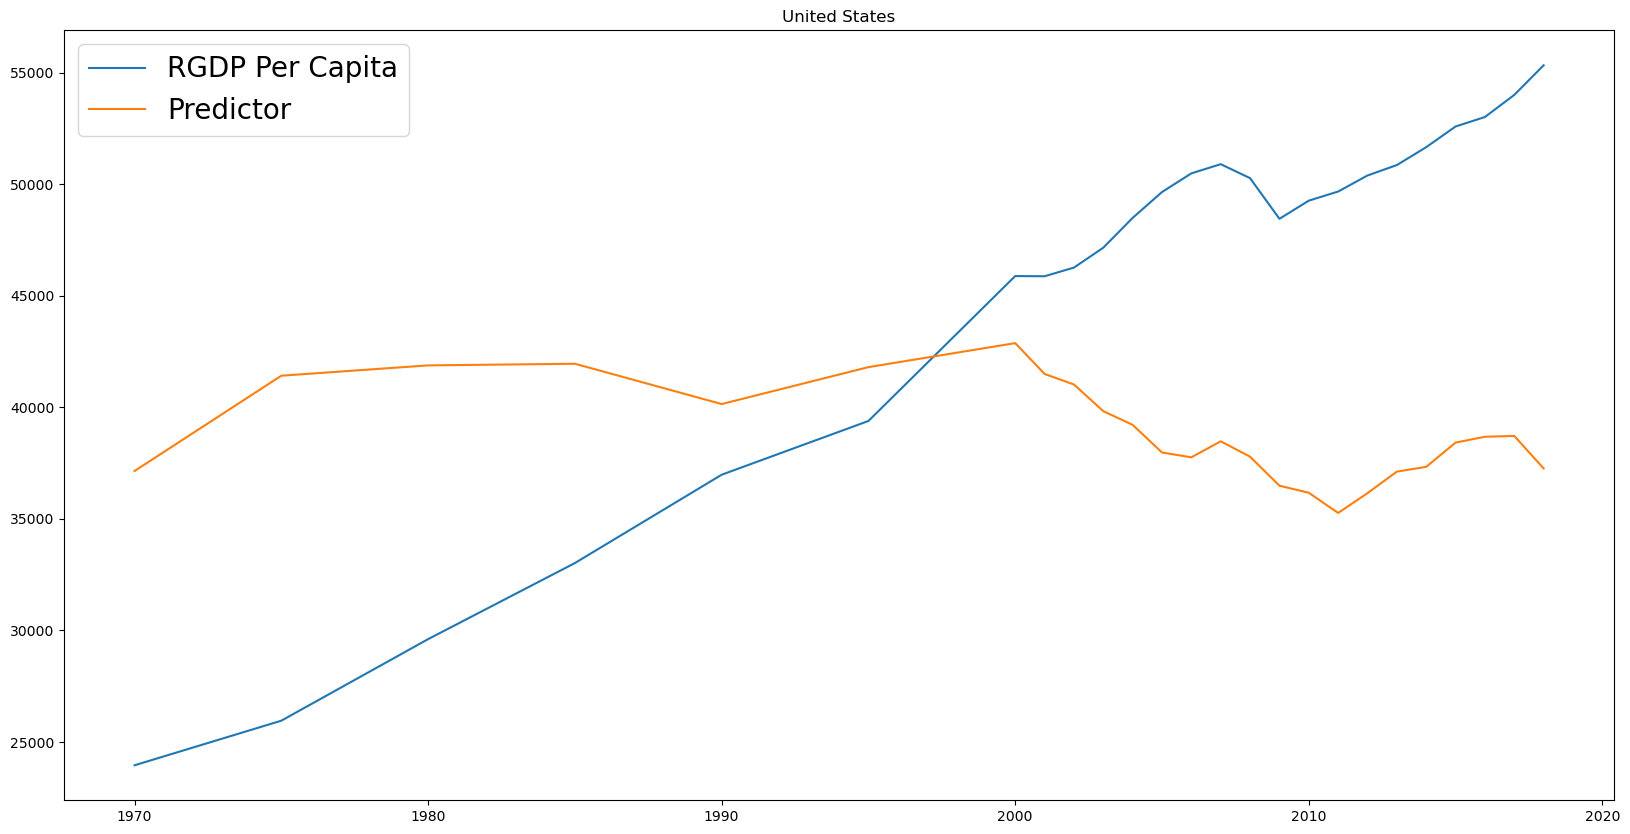

In [49]:
for country in countries:
    plot_data4 = r_df4.loc[country]
    fig, ax = plt.subplots(figsize = (20,10))
    y1 = plot_data4["RGDP Per Capita"]
    y2 = plot_data4["Predictor"]
    ax.plot(y1, label = "RGDP Per Capita")
    ax.plot(y2, label = "Predictor")
    ax.set_title(country)
    ax.legend(loc='upper left', fontsize = 20)
    plt.show()